In [2]:
# import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer


### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [5]:
# to treat missing values

def treat_null_values(df, method):
    """Treats the missing values in the dataframe.
    
    This function accepts a dataframe and the method to treat the missing value.
    Depending on the method passed, impute/drop the missing values.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to treat the missing values
    method -- method to treat the missing values
    """
    
    

In [6]:

# to seperate the numerical and categorical columns

def num_and_cat_columns(df):
    """Return seperate list of numerical & categorical columns.
    
    This function accepts a dataframe and returns two lists,
    one containing the names of numerical columns(num_cols) and the other categorical columns(cat_cols).
        
    Keyword arguments:
    df -- pandas dataframe for which we want the list of columns
    
    Returns:
    num_cols -- list of numerical columns
    cat_cols -- list of categorical columns
    """
    
    
    

In [7]:
# to encode the categorical column so as to convert them to numeric.
    
def encode_category(df, enc, col, method):
    """Encodes the categorical columns of the dataframe.
    
    This function accepts a dataframe and columns to be encoded along with the method to be used for encoding.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns -- this dataframe would be transformed
    enc -- the encoder - fitted on the train data
    col -- list of columns that is to be encoded
    method -- method to be used while encoding
    
    Returns:
    df1 -- the encoded dataframe
    """
    
    

In [8]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df, col):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    
    


In [9]:
# to visualize distributions of the column(s) by plotting them.
    
def plot_distribution(kind_, df, *col):
    """Plot distribution of the column(s).
    
    This function will plot a chart of the passed column as the 'kind' specified in kind_.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    knid_ -- 'kind' of chart that will be plotted
    df -- pandas dataframe which has the data
    *col -- list of all the features for which we want to plot the distribution
    """
    
    

In [10]:
# to apply transformation to any column

def transform_column(df, col, transformation):
    """Apply transformation to the column(s).
    
    This function will apply the passed transformation to the given dataframe & columns.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- list of all the features for which we want to apply the transformation
    transformation -- the transformation we want to apply
    """
    
    
    

In [11]:
# to check outliers using box plot

def check_outliers(df, col, cat):
    """Check outliers through boxplot.
    
    This function plots and displays the boxplot of the feature col vs all the categories defined. 
    Check for any outlier present.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- the feature for which we want to plot the boxplot
    cat -- the list of features (categorical) by which we want to check the outliers (for each category in each feature)
    """
    
    

In [12]:
# to fit the model & return the score

def fit_model(X_train, X_test, y_train, y_test, model):
    """Fit the model & return the score of the fitted model.
    
    This function accepts the test & train data and fits the given model to it and returns the score of the model.
    
    Keyword arguments:
    X_train -- Train feature
    X_test -- Test/Validation feature
    y_train -- Train target
    y_test -- Tets/Validation target
    model -- the model to be fitted
    
    Returns:
    r2 -- R-Square of the fitted model    
    """
        
    

### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


In [10]:
# Code starts here

train = pd.read_csv('train.csv')
data_dic = pd.read_excel('Data Dictionary.xlsx')

# Code ends here

In [193]:
#data_dic.set_index('Feature',inplace = True)


In [194]:
train.shape

(567103, 9)

In [196]:
train.isna().sum()

Year                       0
Organization Group         0
Department            295065
Union                    345
Job Family                 0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Compensation         0
dtype: int64

In [8]:
train.head()

Id Year Type  Year                       Organization Group  \
0   0  Calendar  2018                         Community Health   
1   1  Calendar  2014  Public Works, Transportation & Commerce   
2   2    Fiscal  2018            General City Responsibilities   
3   3    Fiscal  2015                         Community Health   
4   4    Fiscal  2014                         Community Health   

                      Department                             Union  \
0                            NaN         Prof & Tech Eng, Local 21   
1  MTA Municipal Transprtn Agncy  SEIU - Miscellaneous, Local 1021   
2                            NaN            SEIU, Local 1021, Misc   
3              DPH Public Health  SEIU - Miscellaneous, Local 1021   
4              DPH Public Health  SEIU - Miscellaneous, Local 1021   

                      Job Family                            Job  \
0            Information Systems  IS Business Analyst-Principal   
1            Public Service Aide     Publ Svc Aide-Asst To Prof   
2  Payroll, Billing & Accounting           Senior Account Clerk   
3      Purchasing & Storekeeping   Sr Materials & Supplies Sprv   
4        Hospital Administration     Medical Records Technician   

   Employee Identifier Retirement Health and Dental Other Benefits  \
0              8594384       $0.0         $13527.66           $0.0   
1                22142       $0.0          $3995.56        $875.27   
2              8512172       $0.0              $0.0           $0.0   
3                47593  $11671.59         $10680.55       $4400.24   
4                47549  $14617.66         $12464.61       $5562.09   

   Total Compensation  
0                0.00  
1            16176.35  
2              248.30  
3            80020.86  
4           101207.38

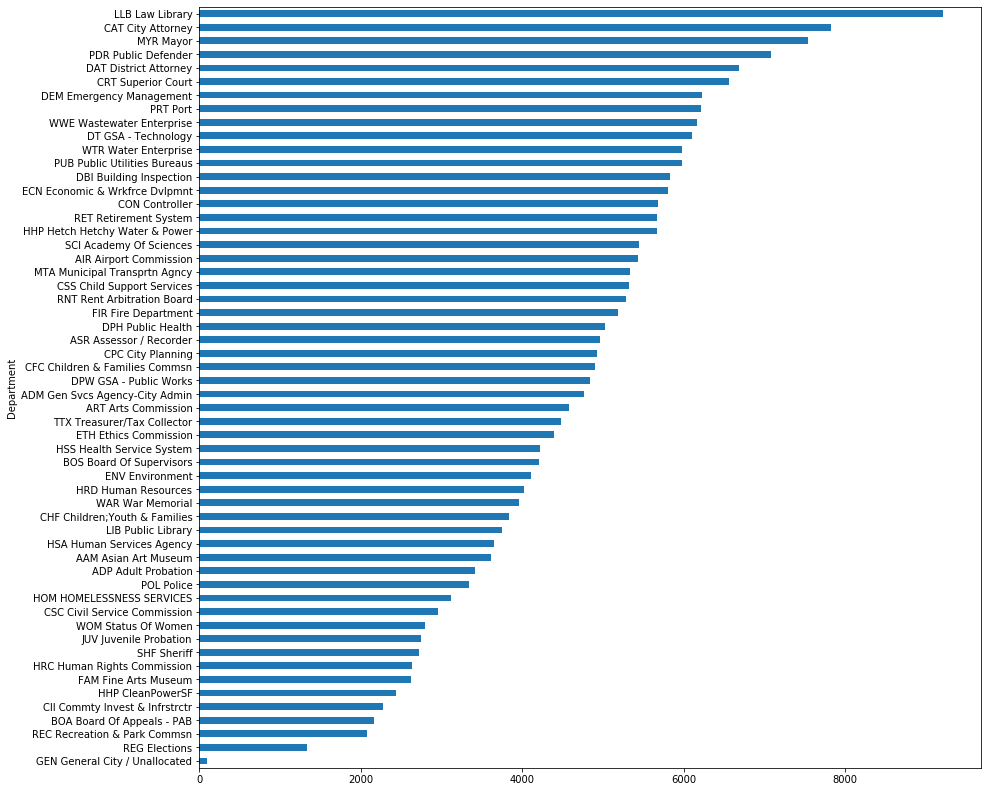

In [292]:
train.groupby('Department')['Other Benefits'].mean().sort_values(ascending = True).plot.barh(figsize = (14,14))

# DATA VISUALISATION

## Department vs Total Compensation Mean

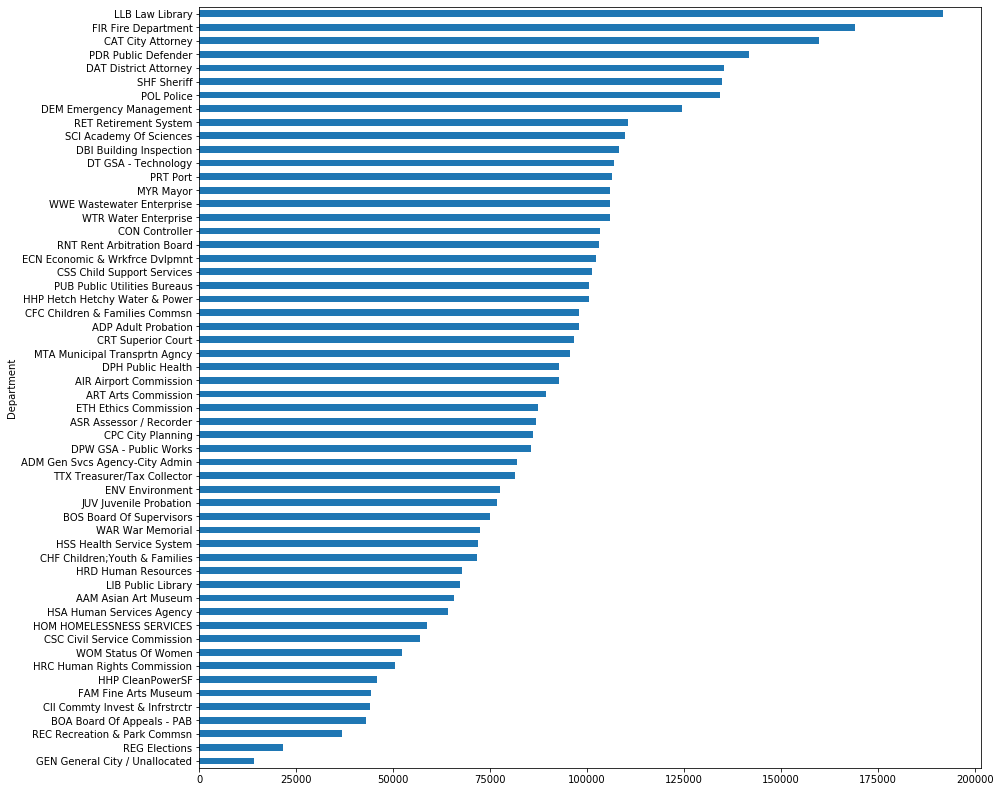

In [25]:
train.groupby('Department')['Total Compensation'].mean().sort_values(ascending = True).plot.barh(figsize = (14,14))

## Union vs Total Compensation Mean

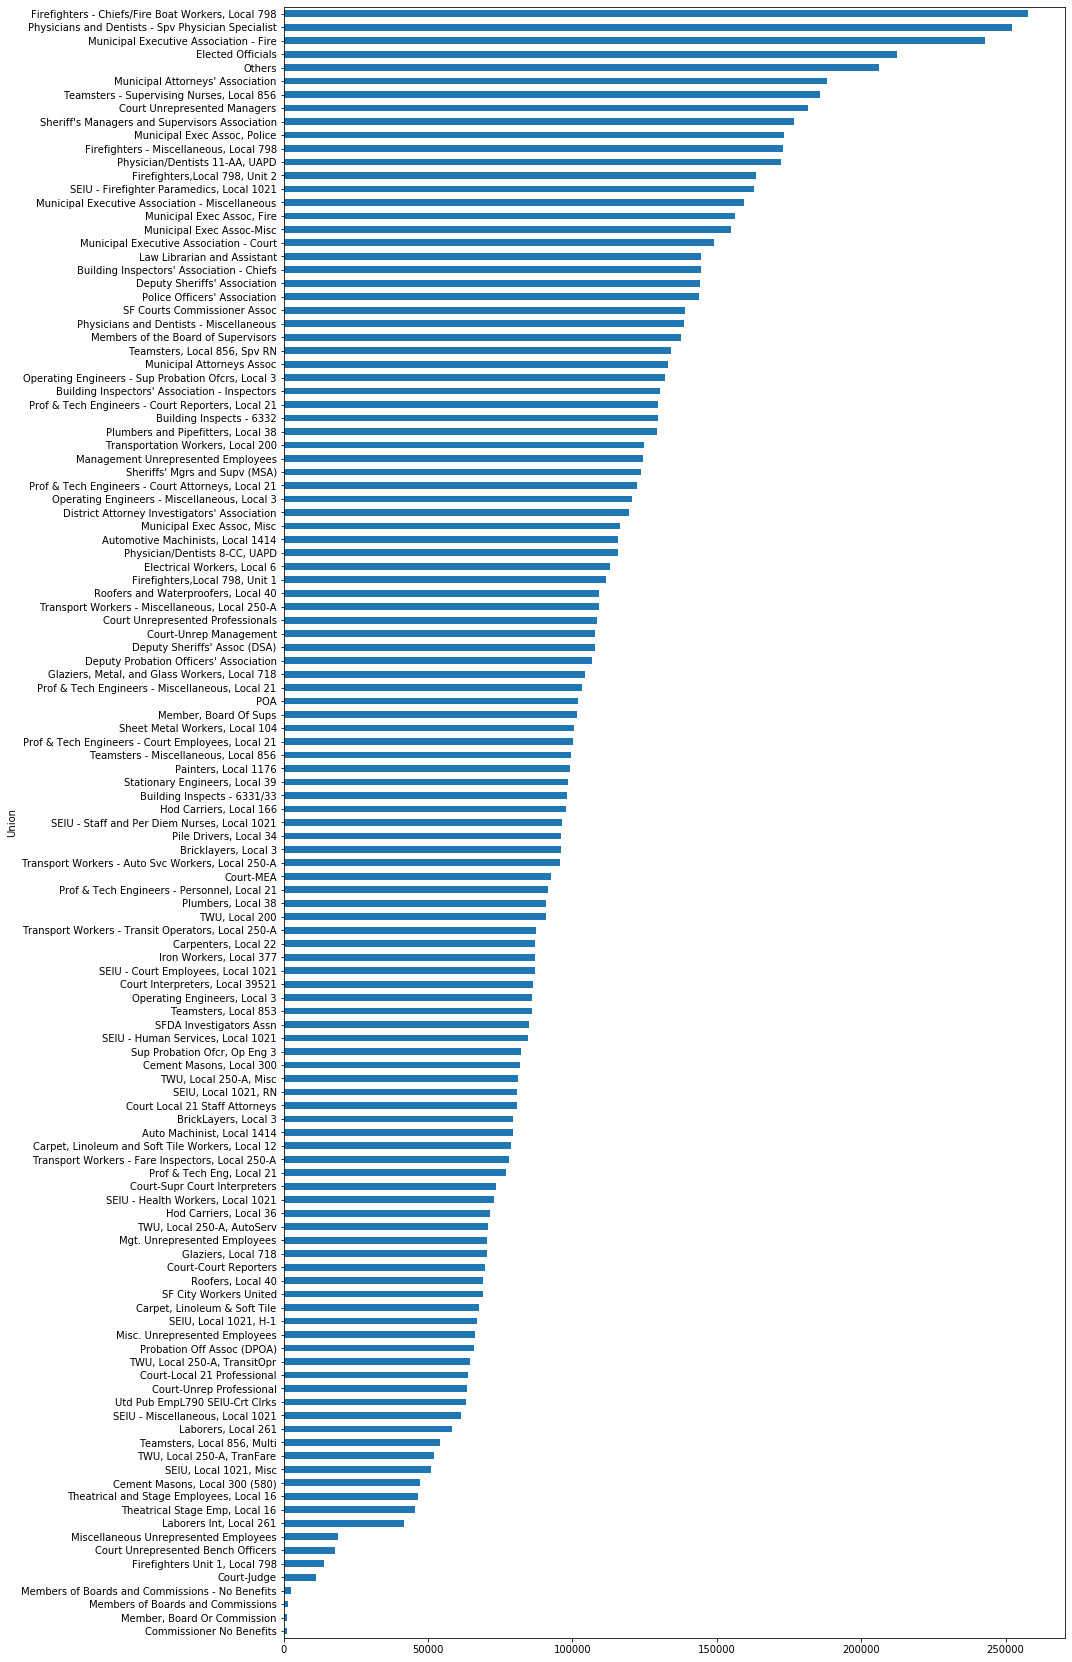

In [32]:
train.groupby('Union')['Total Compensation'].mean().sort_values(ascending = True).plot.barh(figsize = (14,30))

In [44]:
#Drop Employer Indentifier
train.drop('Employee Identifier', axis = 1, inplace = True)

In [45]:
# Drop Job 
train.drop('Job', axis = 1, inplace = True) #1

## Organisation Group vs Total Compensation

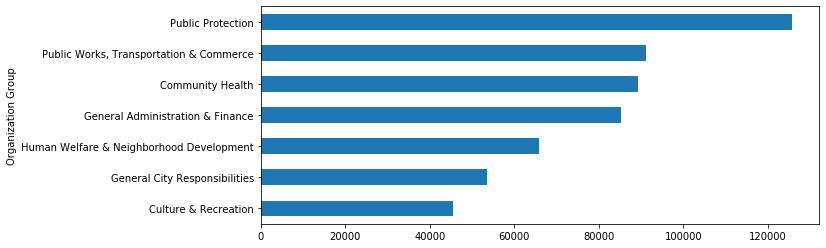

In [40]:
train.groupby('Organization Group')['Total Compensation'].mean().sort_values(ascending = True).plot.barh(figsize = (10,4))

## Job Family vs Total Compensation

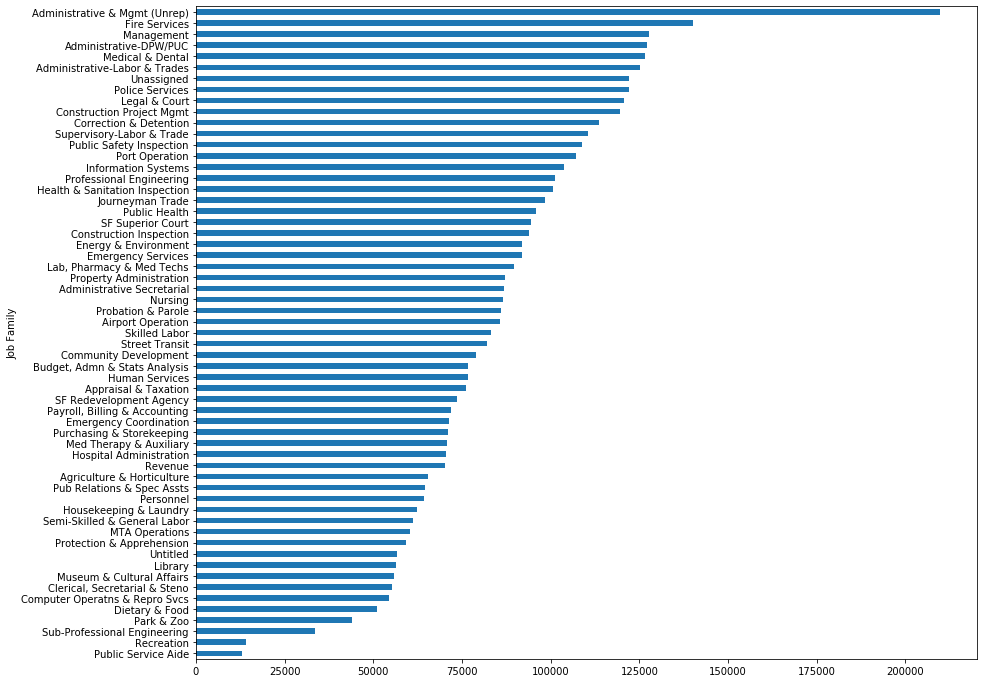

In [46]:
train.groupby('Job Family')['Total Compensation'].mean().sort_values(ascending = True).plot.barh(figsize = (14,12))

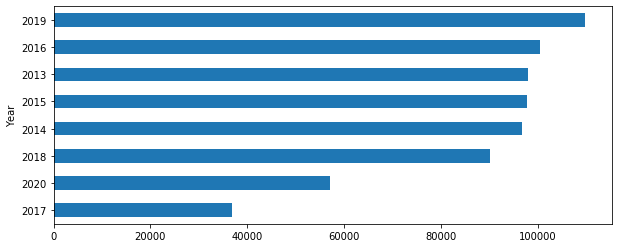

In [77]:
train.groupby('Year')['Total Compensation'].mean().sort_values(ascending = True).plot.barh(figsize = (10,4))

# MISSING VALUES

In [51]:
train[train.Department.isna()]#['Total Compensation'].mean()#.sum()

Id Year Type  Year                        Organization Group  \
0            0  Calendar  2018                          Community Health   
2            2    Fiscal  2018             General City Responsibilities   
6            6    Fiscal  2018                      Culture & Recreation   
8            8  Calendar  2017             General City Responsibilities   
13          13  Calendar  2019                         Public Protection   
...        ...       ...   ...                                       ...   
567096  567096    Fiscal  2018             General City Responsibilities   
567098  567098    Fiscal  2018                         Public Protection   
567100  567100  Calendar  2018                         Public Protection   
567101  567101  Calendar  2017  Human Welfare & Neighborhood Development   
567102  567102    Fiscal  2019          General Administration & Finance   

       Department                           Union  \
0             NaN       Prof & Tech Eng, Local 21   
2             NaN          SEIU, Local 1021, Misc   
6             NaN          SEIU, Local 1021, Misc   
8             NaN          SEIU, Local 1021, Misc   
13            NaN                             POA   
...           ...                             ...   
567096        NaN          SEIU, Local 1021, Misc   
567098        NaN                             POA   
567100        NaN  Firefighters,Local 798, Unit 1   
567101        NaN            SEIU, Local 1021, RN   
567102        NaN       Prof & Tech Eng, Local 21   

                           Job Family Retirement Health and Dental  \
0                 Information Systems       $0.0         $13527.66   
2       Payroll, Billing & Accounting       $0.0              $0.0   
6                          Recreation       $0.0              $0.0   
8       Clerical, Secretarial & Steno       $0.0          $5432.36   
13                    Police Services  $17745.08         $28213.66   
...                               ...        ...               ...   
567096                 Human Services       $0.0              $0.0   
567098                Police Services   $9483.37          $8487.84   
567100                  Fire Services       $0.0          $4617.42   
567101                        Nursing       $0.0         $13037.64   
567102            Information Systems  $27156.04         $15082.82   

       Other Benefits  Total Compensation  
0                $0.0                0.00  
2                $0.0              248.30  
6             $837.52            11628.13  
8                $0.0                0.00  
13           $1452.41           150514.85  
...               ...                 ...  
567096           $0.0              401.30  
567098       $2888.13            74977.10  
567100           $0.0                0.00  
567101           $0.0                0.00  
567102      $10965.64           199003.85  

[295065 rows x 11 columns]

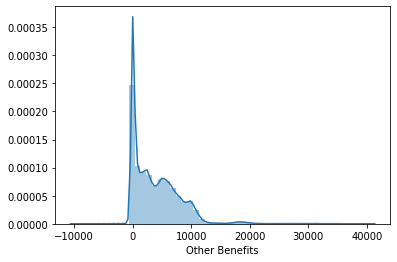

In [91]:
sns.distplot(train['Other Benefits'])

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

In [64]:
# Code starts here

# Have a look at the features, check the type where any currency is involved. 
# We have columns with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Call the clean_dollar() to do the same. 

train['Retirement'] = train['Retirement'].apply(lambda x: float(x[1:]))
train['Health and Dental'] = train['Health and Dental'].apply(lambda x: float(x[1:]))
train['Other Benefits'] = train['Other Benefits'].apply(lambda x: float(x[1:]))

In [66]:
Id = train['Id']
train.drop('Id', axis = 1, inplace = True)

In [73]:
# Drop Year type Column
train.drop('Year Type', axis=1, inplace = True)

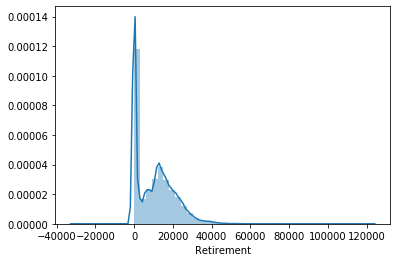

In [88]:
sns.distplot(train['Retirement'])

In [183]:
dept_dict = train.groupby('Department')['Total Compensation'].mean().sort_values(ascending = True).to_dict()

0         GEN General City / Unallocated
2         GEN General City / Unallocated
6         GEN General City / Unallocated
8         GEN General City / Unallocated
13                   PDR Public Defender
                       ...              
567096    GEN General City / Unallocated
567098          BOS Board Of Supervisors
567100    GEN General City / Unallocated
567101    GEN General City / Unallocated
567102                   LLB Law Library
Name: Department, Length: 295065, dtype: object

In [174]:
df = train[train.Department.isna()]
lst = []
#i = 182514.85
for i in df['Total Compensation']:
    start_value = 1000000000
    #print(i)
    for item in dept_dict:
        #print(item)
        error = abs(i - dept_dict[item])
        if error < start_value:
            start_value = error
            final_value = item
            #print(final_value)
            
    lst.append(final_value)

df['Department'] = lst

0.0
248.3
11628.13
0.0
150514.85
409.08
496.3
103499.77
234141.8
4432.63
153439.12
45768.58
84285.39
63179.11
210619.29
112721.53
270531.41
149759.37
0.0
0.0
230819.54
146037.44
20467.96
171152.85
175190.07
60256.81
0.0
16454.54
0.0
65482.64
0.0
55565.14
0.0
347025.03
180484.81
32711.33
0.0
404.6
102948.7
0.0
46407.36
166549.38
138739.69
133568.82
135082.74
5358.21
310.4
0.0
0.0
170496.63
344.6
50078.16
31165.12
0.0
0.0
125144.58
0.0
160778.16
0.0
99540.42
0.0
775.05
90971.66
48595.48
6263.77
1838.75
0.0
128105.22
114114.29
56602.4
0.0
0.0
0.0
0.0
105523.12
0.0
0.0
96495.42
99223.6
140120.69
0.0
39501.49
0.0
0.0
290970.65
0.0
50733.2
174896.61
0.0
167729.58
62878.67
17868.25
90286.3
55031.17
144333.2
1090.55
167275.31
289310.22
287125.97
0.0
95135.93
203386.45
0.0
112434.65
100723.02
214666.21
14979.64
0.0
0.0
57359.77
60804.4
123705.18
103440.38
126782.27
153149.82
169225.03
169194.11
14036.21
27118.52
0.0
105213.59
0.0
114025.03
184214.66
348.4
228512.45
14133.08
0.0
155690.72
19406.

250642.96
146056.16
149305.62
123184.62
97815.08
4793.3
0.0
0.0
156869.25
148970.0
0.0
132466.32
127543.71
220511.11
0.0
0.0
4366.19
0.0
204664.79
0.0
49909.23
0.0
0.0
139740.18
204132.13
19903.21
152687.77
104766.29
174659.66
60017.29
331778.52
0.0
91025.92
253.8
132905.74
95822.26
12864.14
0.0
3886.0
14011.76
70483.93
26824.1
0.0
84021.79
50094.2
18909.01
0.0
0.0
11745.93
147239.68
7883.8
0.0
123725.46
66397.54
200878.11
66687.4
92064.47
22153.03
0.0
96398.16
599.01
0.0
228196.69
81104.38
0.0
127552.53
111285.74
147604.88
0.0
26032.5
17670.47
147223.87
109853.84
189500.5
0.0
129561.78
49233.79
227903.85
126660.99
42777.04
0.0
0.0
0.0
120326.8
197444.76
0.0
38.93
147478.59
0.0
5232.63
0.0
279.6
0.0
0.0
146207.36
175636.65
0.0
0.0
122905.16
164821.0
0.0
175367.42
177885.25
59228.15
106273.16
0.0
161930.52
34013.7
50947.57
189415.22
86734.53
90510.59
0.0
0.0
143785.01
0.0
51109.26
168720.79
43548.95
0.0
0.0
47633.64
0.0
45122.74
190952.21
0.0
6590.17
74622.39
0.0
289371.12
50701.51
6165

122966.84
9462.37
180050.57
6586.02
214913.72
173466.97
166633.84
54473.94
717.7
0.0
1043.14
0.0
0.0
216722.83
0.0
0.0
293.06
0.0
130932.05
88211.01
112181.21
38321.1
152954.58
0.0
1090.54
1283.69
13503.12
3833.69
21736.9
0.0
0.0
0.0
0.0
0.0
177154.33
0.0
0.0
87410.31
0.0
244881.41
0.0
38973.82
120729.82
26433.12
249715.92
208267.16
0.0
299648.46
31345.49
0.0
0.0
0.0
79455.7
0.0
7096.86
205515.99
92398.0
0.0
0.0
243443.34
167428.29
0.0
171313.27
0.0
73881.96
0.0
18486.53
16608.52
104361.13
0.0
144490.13
30418.41
58356.34
153421.82
0.0
0.0
685.95
186932.94
166623.37
0.0
3.0
42726.97
0.0
0.0
10069.04
41695.1
488.82
93132.5
47291.49
241241.35
0.0
63779.98
17828.72
137588.57
107846.87
658.91
0.0
0.0
0.0
96336.46
0.0
34521.96
69418.19
45120.26
68296.03
64363.58
149868.44
345.09
0.0
254172.85
0.0
124397.3
6379.05
278711.76
203333.05
284940.07
0.0
219705.3
23215.77
3310.72
133568.63
113503.87
127991.83
0.0
3733.92
0.0
65733.02
207858.92
0.0
0.0
687.34
151857.02
50133.77
257079.38
0.0
100215.7

13752.28
693.6
275195.88
138359.66
140528.66
120203.91
109283.24
41470.13
336.1
153671.06
39004.68
0.0
168.4
0.0
134610.14
86509.14
0.0
64139.79
173.6
16662.63
70725.4
219369.45
134640.63
258238.65
158238.27
136030.76
125934.15
0.0
54225.43
0.0
543.48
0.0
97771.44
0.0
191908.2
219267.08
30533.17
0.0
0.0
218990.31
42680.27
148055.34
0.0
41718.33
8023.58
65213.86
175149.07
61116.94
322129.37
10238.62
112380.4
156171.41
103366.21
2382.06
930.2
98943.25
45475.36
91397.83
139923.45
195493.68
0.0
85481.72
57605.96
65357.66
78299.04
121664.83
234789.94
185933.29
52064.44
0.0
258623.14
132597.14
109485.85
153319.0
149853.19
158664.68
0.0
0.0
205663.54
5307.39
117739.52
859.8
104393.38
0.0
50784.75
12124.35
0.0
116485.65
128729.99
0.0
0.0
0.0
157193.4
0.0
258552.31
153057.23
189605.69
151361.26
8026.58
125955.14
13056.48
126094.83
20625.5
164967.26
132738.68
0.0
158837.52
21681.21
195212.18
221758.2
3104.66
192655.56
85396.23
0.0
189725.6
0.07
9852.76
46573.19
95135.22
55270.71
21709.04
213859.

0.0
107856.37
82093.01
195776.24
190452.74
49322.9
41888.7
0.0
56097.96
110345.55
9224.91
230953.96
338.52
150667.44
50887.1
424.62
5002.57
306883.94
128676.94
95226.36
0.0
153315.02
504.4
0.0
177871.81
0.0
90209.78
0.0
132931.77
167098.22
7845.13
0.0
419.6
47302.04
19697.29
9168.81
12794.72
131891.74
0.0
117639.86
214069.14
174066.22
62242.93
96745.96
275764.79
136597.85
77417.75
3400.1
0.0
166082.02
687.32
0.0
157771.77
66554.63
171566.22
1189.69
2477.65
0.0
163050.61
0.0
0.0
0.0
0.0
201848.15
0.0
89369.08
59154.18
38319.47
126153.91
233330.93
42435.18
8632.34
0.0
562.4
81620.55
0.0
108845.61
59038.01
0.0
0.0
205469.62
144754.3
145045.15
91396.22
106374.23
0.0
113862.94
358.86
90824.37
78102.38
57.59
36.38
184208.1
0.0
218849.47
0.0
45023.14
0.0
0.0
0.0
0.0
0.0
118235.9
85721.91
0.0
62.01
717.7
118732.04
111420.16
51512.65
173423.01
5576.66
255448.64
93855.68
60989.59
2280.34
0.0
693.1
42068.21
0.0
96093.01
144999.38
0.0
178779.41
0.0
119978.44
13990.39
113720.56
122052.4
0.0
0.0
0.0

23359.0
153506.93
96611.4
141791.48
0.0
142853.02
105570.18
131683.14
147831.95
140821.24
0.0
0.0
113645.65
22627.35
63233.43
311606.21
109521.05
9792.96
127764.69
0.0
129990.76
0.0
0.0
34564.96
155179.37
65395.35
0.0
91341.48
140601.98
2042.71
0.0
0.0
0.0
50794.92
84704.93
140021.67
88505.33
283.35
36381.15
180530.81
362.58
41.15
9025.53
209702.62
274.15
55491.54
153.9
192249.96
0.0
0.64
55330.84
22827.26
0.0
0.0
0.0
234226.89
94500.73
288142.22
0.0
50920.45
52176.02
0.0
0.0
0.0
0.0
0.0
181.4
79299.73
135854.07
0.0
434.28
128572.71
0.0
89308.11
0.0
36.38
207074.85
0.0
179728.05
0.0
77166.27
0.0
4442.16
0.0
142206.64
0.0
133818.63
52523.88
0.0
89859.25
150714.44
12551.0
144543.18
0.0
190460.49
60476.14
0.0
192357.24
0.0
92.46
399.8
0.0
1873.8
0.0
142003.9
39931.18
49624.84
184955.54
118397.21
111601.22
71106.69
17915.7
98121.08
157352.6
109347.61
208874.11
131083.33
0.0
155235.17
37380.56
0.0
115099.37
0.0
250175.37
307166.11
146463.17
52375.66
65029.54
332.0
212916.23
712.52
241.8
551

0.0
30134.43
270.49
0.0
84874.57
0.0
0.0
0.0
172266.6
0.0
142074.62
237266.47
0.0
0.0
0.0
256522.85
36592.76
0.0
361.8
43362.85
102694.57
0.0
3094.24
0.0
0.0
120763.83
246.5
93716.97
16257.17
0.0
53465.26
257.1
0.0
246421.8
57491.67
0.0
84608.19
74621.82
0.0
5063.57
39907.01
0.0
21130.69
0.0
0.0
0.0
107460.78
160832.46
101073.26
141154.85
45938.05
0.0
43074.38
125166.62
48977.94
377.57
158507.09
5252.45
113963.09
1298.9
113352.82
24982.59
85862.89
481.0
0.0
45.53
219723.64
153197.99
73435.17
332.0
2234.32
109167.9
115731.15
5612.67
491.75
175218.03
0.0
0.0
265362.28
0.0
0.0
201917.83
0.0
101044.33
0.0
0.0
202186.65
0.0
0.0
12918.45
140089.6
0.0
0.0
260.6
47460.76
141924.54
169700.73
613.91
106246.35
0.0
0.0
963.56
106169.45
155145.29
0.0
0.0
0.0
84787.06
1040.61
165469.53
5611.11
113050.32
114241.22
196317.72
0.0
275138.82
26892.49
176283.17
79643.49
46249.84
222959.69
11614.81
80123.29
172049.96
146868.76
96427.9
414.7
51437.42
94575.25
4716.33
128100.67
12.6
79.67
0.0
310.4
44049.2
9

137543.25
226.0
0.0
1405.56
146389.83
88735.95
104670.02
2847.98
0.0
211.8
92804.91
152036.66
485.9
24973.81
0.0
152404.9
103814.74
175090.24
0.0
90954.94
0.0
0.0
0.0
0.0
126316.69
107214.77
0.0
132729.34
0.0
77105.49
143552.78
28011.07
315.5
0.0
0.0
65701.66
35733.68
57983.13
110769.53
0.0
34240.12
225875.39
75822.07
29748.63
0.0
111.13
0.0
124549.39
0.0
105287.76
23747.21
0.0
167986.21
132862.13
61581.51
190023.13
40.0
47717.64
106489.53
18753.24
0.0
116234.68
0.0
149811.91
197.8
110406.59
181477.19
106620.08
617.09
0.0
48693.57
16715.72
102630.06
0.0
0.0
0.0
146614.21
198245.32
82996.65
356.6
0.0
170248.39
23154.14
0.0
182016.15
241.94
87504.02
22974.69
0.0
16693.76
109269.56
0.0
104089.33
0.0
19541.69
136350.66
190392.12
161114.31
189921.76
170572.1
0.0
188649.69
0.0
0.0
87204.72
0.0
0.0
222741.75
26209.07
165472.29
0.0
0.0
28655.53
29.68
240477.46
148701.0
117157.47
0.0
166178.18
129317.0
132499.12
73532.84
190774.35
84871.72
101073.26
34306.12
20114.49
0.0
104781.18
0.0
53690.07


101855.67
525.45
0.0
539.36
0.0
202130.98
0.0
0.0
139380.54
0.0
53909.44
145086.51
0.0
0.0
64261.21
136145.03
0.0
141646.54
0.0
20688.58
148533.09
0.0
750.25
86057.67
0.0
126883.41
323.28
0.0
10553.5
0.0
111743.11
6708.25
37274.99
328.14
101647.7
0.0
176574.83
183751.03
96291.81
0.0
2489.62
88741.2
0.0
212891.13
413154.48
17009.92
194703.18
0.0
215105.56
0.0
15421.3
128238.66
135720.04
244556.96
13061.64
0.0
0.0
0.0
46163.16
0.0
94083.05
114641.78
160118.84
0.0
0.0
0.0
206756.19
108793.8
73833.68
121158.61
103700.18
117128.07
1402.44
39343.15
185847.26
171391.63
60894.08
157081.59
29365.36
83111.07
113352.58
191058.61
0.0
184494.95
0.0
410.6
407428.52
95263.8
138487.52
349.3
3741.71
140338.66
13503.12
0.0
124059.0
82246.87
0.0
144235.69
0.0
0.0
0.0
0.0
0.0
0.0
27942.41
823.99
214.71
95005.45
138411.37
334878.47
0.0
0.0
228437.02
0.0
126090.18
29145.06
253419.72
220139.69
225919.79
95288.65
0.0
117064.7
0.0
55310.85
0.0
140047.05
0.0
53196.26
0.0
94080.06
0.0
0.0
145144.39
161754.34
0.0

0.0
121922.5
142190.29
96670.07
64215.01
0.0
1019.39
346.4
15030.41
160525.92
0.0
26270.36
101732.85
90504.3
5448.3
0.0
158579.5
23131.66
112764.14
43256.43
50439.1
46229.71
0.0
171839.2
49861.1
0.0
127747.17
4616.14
5942.51
62477.24
4919.25
215819.74
0.0
9366.37
0.0
218.85
219244.61
19573.88
0.0
26613.37
78502.52
0.0
0.0
222259.73
126449.99
126777.39
2067.9
67422.94
115587.82
360.8
122533.54
186677.07
83468.22
240690.96
14869.73
0.0
127888.28
347.4
132417.44
184823.53
0.0
0.0
106138.46
88332.53
24947.94
200306.55
183327.89
253.8
29410.13
0.0
176238.43
121943.92
0.0
176284.99
84894.94
0.0
149306.42
138490.42
122448.0
156401.57
21674.67
0.0
0.0
120018.88
99913.34
0.0
62901.63
166636.27
0.0
0.0
123750.99
202.8
273.7
409.4
38.74
0.0
107315.13
0.0
430.24
107171.94
1029.68
0.0
42143.02
106467.16
105660.93
6079.89
0.0
217548.22
102872.6
0.0
159601.0
0.0
152621.9
18463.18
0.0
149520.06
139509.83
0.0
0.0
40242.56
104877.26
261692.79
216675.24
0.0
0.0
0.0
104038.84
16416.02
120630.54
0.0
1834.2

147167.13
0.0
59089.24
114222.51
145754.19
28342.53
0.0
87759.92
110769.37
155106.24
0.0
118248.75
0.0
0.0
0.0
219613.68
0.0
0.0
82480.74
246.43
222.69
32513.84
0.29
0.0
36086.34
9662.75
237812.98
121869.14
221330.74
106225.29
18581.71
184882.3
22135.96
0.0
173201.68
20442.05
89776.34
54293.3
193640.31
109821.57
46281.71
10501.31
130426.57
59875.51
47876.68
154072.69
73435.17
97034.57
192949.09
723.65
13870.31
90825.92
7087.63
210207.36
0.0
193613.38
878.38
328.64
62447.58
92197.54
264919.6
247293.26
0.0
0.0
45828.37
26326.24
71191.65
137445.28
0.0
179722.17
74672.59
345.3
0.0
191413.48
170923.66
285302.61
152571.86
0.0
0.0
0.0
207101.95
221373.68
0.0
0.0
71389.15
128266.79
209817.23
143696.04
10993.23
270345.78
74748.83
53599.75
29336.24
185627.0
200663.02
102967.71
14731.46
0.0
0.0
0.0
15179.16
108271.74
0.0
154985.71
122980.13
189995.06
5258.93
41829.07
146139.29
0.0
49029.37
855.06
0.0
37379.04
74772.36
111830.22
291938.27
60284.95
9653.41
0.0
78.07
0.0
48689.68
199879.59
65486.37


34435.59
0.0
112194.71
187.97
0.0
6985.39
0.0
458.1
56838.16
387.39
0.0
125142.38
214666.21
38.21
9216.16
114191.38
99772.05
41522.07
0.0
121938.71
12858.54
89982.61
36470.69
488.75
186730.46
17.9
140110.01
482.1
113329.73
0.0
47887.37
1029.44
89186.53
67373.41
253078.96
0.0
152076.06
0.0
5652.55
0.0
127364.03
0.0
265064.57
120930.88
123896.45
51829.9
90114.57
189498.51
131024.37
10672.61
644.39
0.0
5080.53
0.0
54083.07
87648.45
0.0
92096.71
112285.91
26277.0
0.0
0.0
68349.31
0.0
112520.81
13898.39
0.0
71868.22
99338.21
82936.52
99459.83
0.0
0.0
118539.03
1286.95
205.8
87704.27
95059.04
211686.91
0.0
36266.65
132730.43
91203.04
0.0
381.9
116250.03
0.0
0.0
33431.79
2261.92
108280.92
98809.42
94205.5
0.0
142928.99
215130.19
81321.75
4597.05
193950.74
1834.38
546.9
97184.26
200289.89
82641.49
144358.07
144173.99
85209.14
297.7
15498.59
5.84
14512.47
202542.74
186879.07
0.0
0.0
0.0
45834.21
222787.54
0.0
0.0
17345.55
130174.06
80586.18
312.6
25166.23
106424.32
51801.58
10921.05
0.0
140634.

166274.52
95827.61
181200.04
136282.09
0.0
4176.55
170231.14
313.89
140154.04
240091.95
423.83
0.0
0.0
288892.01
44090.9
0.0
17589.32
0.0
377.7
19707.99
118613.03
273315.2
247030.04
0.0
14239.34
0.0
151697.1
323.28
146174.62
0.72
169049.38
0.0
122016.76
11810.56
0.0
0.0
152182.03
21923.2
131510.13
203369.16
65769.51
67265.67
392.8
56795.86
0.0
180822.4
288.6
288044.05
77709.13
0.0
0.0
49457.85
28884.77
757.6
158650.81
23542.23
77.14
0.0
0.0
6289.81
9794.24
90177.68
0.0
91263.26
0.0
0.0
173996.55
0.0
0.0
0.0
285.86
132245.68
139743.16
0.0
0.0
176970.98
1015.08
0.0
95141.04
309.63
0.0
0.0
262804.47
0.0
10420.53
89530.23
0.0
0.0
134133.49
7301.84
100049.13
33377.99
8279.52
0.0
0.0
136983.93
124339.3
107343.27
254556.09
693.6
43896.95
826.71
0.0
121.22
174111.29
0.0
108551.98
0.0
226039.68
55596.72
69216.5
133774.92
228.7
35818.8
94157.35
0.0
114551.65
90446.81
0.0
0.0
331963.68
0.0
0.0
7909.64
68042.35
0.0
210414.43
257821.56
16604.15
6794.4
204776.09
0.0
0.0
405.54
173351.59
139655.9
162

190034.63
0.0
139470.74
0.0
121421.3
0.0
36412.75
0.0
0.0
234150.74
59972.33
67262.74
162497.83
140770.09
0.0
0.0
380.6
253.8
21053.71
0.0
282456.21
578.14
5209.24
99968.08
0.0
0.0
1136.53
0.0
370.67
0.0
121959.7
8560.43
47676.95
10810.26
0.0
7997.77
0.0
104941.25
142516.29
0.0
49083.3
0.0
73947.24
0.0
0.0
202129.68
0.0
166490.9
6305.76
168099.77
35350.52
0.0
5247.4
0.0
2191.96
143288.4
28948.71
126036.35
4377.25
159977.2
51303.08
49134.44
8483.17
0.0
0.0
27889.53
0.0
44757.24
132134.33
41466.66
47418.11
137771.02
145848.06
401.8
0.0
58231.9
100129.52
0.0
101689.84
27679.45
0.0
187730.92
154510.38
235868.76
308.0
101852.75
346.0
229.85
3225.3
129670.25
0.0
5589.88
94546.24
57387.98
89899.7
284439.33
7135.29
104396.75
0.0
12317.51
0.0
119546.07
0.0
0.0
161930.52
149738.85
165136.6
262.92
133580.69
4802.23
97949.26
0.0
88.12
82274.12
149476.31
221494.73
118558.71
653.37
13526.31
0.0
146939.7
465.0
0.0
9159.24
47466.41
64312.6
86035.57
156734.72
56107.4
8819.73
134672.91
49311.78
0.0
0.0


0.0
0.0
0.0
0.0
131748.68
13805.79
1453.11
23013.05
130218.42
39322.6
0.0
92954.84
230.3
132531.76
89514.42
74623.96
137745.37
110497.0
0.0
155803.11
0.0
3056.38
75.6
5954.65
31707.48
0.0
124039.51
0.0
13437.75
4761.52
0.0
0.0
45838.71
12903.41
130769.48
0.0
85899.68
1267.03
0.0
98113.76
102825.67
11035.09
0.0
25.63
5591.36
198014.64
68262.0
5432.61
0.0
246890.69
228602.1
0.0
0.0
98873.78
140535.13
10713.92
222367.59
127995.45
170652.88
186878.56
276.75
135287.87
16140.96
67881.93
0.0
0.0
0.0
0.32
163623.89
136111.06
4698.37
0.0
321.7
0.0
186996.09
0.0
0.0
58421.89
140718.93
0.0
88329.85
168542.44
0.0
537.18
62935.35
0.0
109323.62
0.0
250929.43
164981.05
26510.58
0.0
55615.91
45834.16
56631.18
156026.77
75248.93
90216.83
89815.44
0.0
0.0
0.0
382.66
111976.67
58558.69
81580.65
62947.63
132231.28
162560.72
140336.45
0.0
25364.89
143587.17
0.0
106767.27
0.0
0.0
158457.36
1178.6
1212.31
407.02
0.0
279.96
0.0
239615.15
294.0
69618.13
178727.42
59999.68
73712.18
0.0
109034.27
185177.56
470.8

133063.71
0.0
0.0
204765.39
198561.7
0.0
0.0
0.0
176636.35
0.0
0.0
0.0
0.0
206307.79
253.8
0.0
92734.68
0.0
94780.8
133271.78
159073.27
143396.43
165859.5
201018.21
193152.05
0.0
121.21
145938.86
351.28
0.0
180913.91
0.0
108838.81
117195.44
49893.44
64691.09
122729.33
0.0
78570.71
0.0
62274.63
22603.68
0.0
77843.41
77967.97
0.0
0.0
222.3
18293.01
218045.31
25340.03
0.0
195044.9
4616.14
41716.64
80596.97
0.0
0.0
0.0
0.0
0.0
155375.63
11060.64
201957.96
246026.21
97653.1
64085.98
103704.51
0.0
120463.42
60163.24
57305.29
144825.61
0.0
170076.06
0.0
227963.6
293223.3
0.0
0.0
14979.56
111717.74
163862.85
0.0
468.87
150489.01
9991.95
105.26
168625.23
83225.18
173874.76
0.0
105221.81
0.0
0.0
16021.73
243408.54
0.0
419.9
132356.7
0.0
52674.68
0.0
48491.63
109103.33
253965.52
125755.01
168.4
160675.62
0.0
162364.28
195416.3
0.0
88.12
116843.66
135334.45
375.72
142859.24
0.0
0.0
0.0
11169.17
0.0
0.0
214.5
157476.64
0.0
70717.48
467.38
0.0
0.0
113268.17
481.0
0.0
0.0
40259.86
126277.4
26471.94
1

291671.95
353.72
150363.01
17303.61
175820.49
0.0
122388.46
0.0
122134.37
0.0
65024.7
117656.24
67847.01
193690.97
0.0
2277.76
233147.79
142924.51
79983.79
0.0
269157.45
72889.32
0.0
114064.16
0.0
65298.71
0.0
32248.22
118763.68
23153.29
0.0
93132.5
64768.85
0.0
160198.94
3049.34
1077.61
60348.46
113656.27
292815.4
444.0
138658.76
57789.3
232764.21
118871.66
0.0
157365.81
8526.35
40730.38
131402.44
87529.69
0.0
72786.89
0.0
301.2
96605.35
104970.47
105872.21
132465.87
16693.76
125888.8
3364.82
22465.2
11158.56
140351.2
328.89
0.0
48263.28
354.5
55132.48
0.0
81737.18
0.0
0.0
0.0
48726.53
174.0
154432.55
121787.79
0.0
0.0
3717.25
50661.35
0.0
155021.41
120889.47
191495.6
0.0
351.7
0.0
0.0
6935.23
92329.22
25461.85
0.0
0.0
452.7
144543.18
0.0
90755.82
2827.33
158688.93
0.0
373563.58
0.0
44125.75
49855.28
27947.51
1044.72
72663.05
65741.53
122384.3
41.55
126894.91
0.0
227526.72
10112.13
249.65
349.65
0.0
0.0
103356.65
0.0
26.5
3514.03
0.0
39003.23
0.0
159828.83
37129.43
0.0
220.25
180220.7

139981.44
32197.69
95444.41
0.0
127747.17
18873.75
80988.6
0.0
230199.94
47.87
0.0
0.0
198095.87
0.0
0.0
112950.35
0.0
191982.02
0.0
0.0
71114.02
0.0
110188.2
0.0
176001.25
88465.18
131233.51
297.7
62140.17
54980.81
84390.3
43827.21
0.0
435.9
0.0
0.0
234.72
5722.19
179151.68
409.4
0.0
45920.89
105439.51
176782.58
158831.05
176236.85
0.0
39486.69
24541.64
0.0
119947.89
154806.57
36086.12
372.58
205529.13
2506.84
147249.13
0.0
118731.07
122775.99
0.0
128732.09
12458.33
114104.48
0.0
223341.51
164445.47
44572.19
201434.2
46093.98
350.3
0.0
224035.98
83946.89
0.0
0.0
152.7
3268.86
0.0
130841.17
131298.08
0.0
7702.79
0.0
235967.02
120729.08
0.0
0.0
111248.08
0.0
8810.36
373.8
0.0
60282.64
202856.98
26131.7
0.0
0.0
0.0
0.0
165916.67
155784.79
0.0
0.0
0.0
0.0
0.0
164484.22
304390.92
173423.61
28238.23
175612.84
0.0
0.0
204855.01
24528.87
0.0
7834.77
196240.45
92890.16
0.0
183770.07
157443.52
0.0
65524.29
139270.67
98118.82
0.0
110058.35
276949.44
0.0
0.0
12483.22
81868.02
149749.9
75626.37
0.

88596.37
118654.9
4616.74
95047.09
167157.81
148452.31
22551.87
0.0
0.0
64806.43
847.0
805.31
62194.89
0.0
6681.37
0.0
193131.15
129105.82
57330.42
555.8
5063.61
9445.89
455.84
0.0
0.0
0.0
176618.79
110072.53
282571.92
0.0
0.0
0.0
174427.27
0.0
10306.36
25544.45
225997.13
365.7
0.0
0.0
207766.1
112029.12
0.0
42048.06
0.0
270.34
117630.05
0.0
45838.71
152684.23
0.0
203580.54
0.0
129691.65
84718.65
165364.85
0.0
47568.37
72023.14
0.0
2431.41
56989.57
449.0
203412.07
425.52
0.0
3310.4
32312.81
0.0
20356.18
0.0
132959.12
0.0
170974.19
431.85
270.0
0.0
118628.77
102074.99
232567.63
0.0
134184.06
148598.89
150512.68
0.0
396.68
114984.73
121153.12
256279.0
106997.53
97439.95
0.0
132767.73
0.0
29339.11
423.06
47322.25
115555.75
0.0
0.0
52195.8
0.0
99480.5
0.0
0.0
0.0
0.0
57377.49
0.0
0.0
149276.61
0.0
153163.75
122202.22
135575.39
316888.08
143216.13
189554.03
119576.05
41099.87
54842.82
17465.86
0.0
61832.0
0.0
24973.81
0.0
0.0
133933.27
0.0
0.0
0.0
82372.86
184549.02
123947.35
242707.42
1282

75598.15
115635.23
0.0
105167.27
261362.61
224669.72
0.0
0.0
94432.51
0.0
49132.57
116910.96
0.0
118811.88
136089.41
0.0
0.0
0.0
2640.25
57905.54
0.0
146481.14
145337.2
0.0
0.0
0.0
0.0
111517.14
97947.16
75609.93
0.0
0.0
3467.12
143793.63
0.0
101418.28
0.0
48086.01
136619.34
150299.27
23430.03
0.0
73606.0
107854.81
0.0
348067.25
104386.64
687.35
172920.39
118696.49
34930.04
0.0
11749.14
0.0
62430.74
0.0
1022.83
0.0
437.2
17808.51
0.0
2116.57
0.0
232.7
142571.78
129031.84
0.0
75209.62
0.0
0.0
52390.64
115535.99
82363.49
0.0
124170.29
710.54
415.5
29419.3
104890.73
115875.47
5558.69
191562.88
148907.0
45160.5
1148.44
17998.12
0.0
150.87
3897.86
0.0
76731.94
250266.84
0.0
0.0
127504.63
160.98
121933.41
328.9
12478.6
153009.67
0.0
173424.14
222673.68
100422.33
201.41
90845.08
110429.73
68958.27
242211.8
64678.93
411.7
52472.27
126677.95
44819.76
0.0
0.0
136760.01
0.0
323.12
119377.1
94136.51
247359.15
226454.16
64901.77
0.0
105443.94
222787.54
0.0
0.0
103545.49
218512.58
133725.84
349.9
0.

213109.91
310.8
0.0
3928.09
0.0
0.0
127352.45
152135.4
0.0
772.61
114220.28
147887.49
127472.47
118907.1
138284.3
7638.92
25234.75
243821.52
9053.13
119198.13
0.0
0.0
121734.47
0.0
51129.06
17244.69
141670.89
554.49
0.0
200121.46
0.0
104.48
150649.09
104282.09
160217.79
113239.48
100892.12
148720.6
260893.33
149604.76
230189.33
373.8
0.0
201253.06
140135.47
0.0
0.0
108276.06
160332.13
296237.28
448.85
89268.38
288753.12
29938.87
86375.58
171083.8
128349.63
0.0
0.0
18973.38
11871.97
124634.85
0.0
135773.58
50762.57
9461.04
0.0
0.0
229637.12
0.0
44280.47
371.4
93086.32
25860.21
117015.1
118111.6
253862.6
128819.77
276162.71
121016.94
0.0
0.0
212357.53
320803.8
120951.28
91813.44
170380.48
132304.6
0.0
22552.33
92960.3
94212.8
97448.38
18379.92
201363.07
133403.41
0.0
9952.43
138979.7
35789.62
26668.22
0.0
27445.58
103499.77
120042.4
98941.42
0.0
94563.9
148362.4
13396.38
0.0
3921.81
20818.77
0.0
0.0
152688.92
116948.19
117320.01
41541.71
860.95
48897.34
57168.35
93394.77
192322.31
28111.

130051.12
126709.82
107944.05
878.14
59545.28
155668.3
20332.24
135419.8
0.0
157658.76
0.0
0.0
153760.89
76174.89
86911.88
145867.88
611.27
129160.83
81774.68
69089.26
250.2
45855.7
144805.59
0.0
0.0
309076.18
0.0
65880.43
0.0
115355.22
0.0
287.4
203604.41
7673.12
88412.46
209527.15
159117.06
0.0
122960.33
257153.84
229350.67
0.0
103435.53
0.0
45929.54
175822.95
0.0
0.0
179222.48
112940.52
2450.0
2616.15
113454.03
6743.86
324.8
18418.55
159846.93
139027.95
0.0
14839.04
15017.12
0.0
103388.53
0.0
771.68
19967.53
3661.21
45696.36
332.0
56332.0
0.0
150262.4
0.0
343.91
1025.78
118515.88
348.02
128067.22
108516.18
173238.4
47346.42
0.0
250775.33
0.0
249462.4
115634.94
0.0
190208.62
1074.29
176967.41
129213.88
28655.53
62631.22
249388.87
0.0
48548.09
187146.63
159950.79
156892.18
47921.77
135901.62
185409.05
55560.44
0.0
28771.88
0.0
71552.43
256746.2
209140.21
60190.94
88850.91
88133.4
130563.68
179471.0
0.0
0.0
107373.97
0.0
725.62
77090.21
0.0
268068.03
0.0
0.0
125487.24
114215.85
442.82


0.0
1771.13
128049.49
151439.91
78050.11
16705.28
37004.91
294.29
186160.53
261191.07
0.0
97415.49
213.2
6504.04
0.0
185607.29
0.0
281.28
0.0
137865.59
74753.44
149209.14
0.0
0.0
0.0
89942.26
135715.72
0.0
109487.17
198623.73
139449.35
7263.26
0.0
220.9
58448.47
7497.96
0.0
90040.3
137934.57
299.72
0.0
0.0
39907.13
119873.02
158633.41
159365.46
0.0
31099.64
0.0
132898.27
8079.77
0.0
75832.24
132857.21
0.0
762.38
0.0
16027.81
145646.78
0.0
22092.17
23139.62
0.0
132991.34
222956.96
76384.34
0.0
190684.72
0.0
152820.15
168649.82
80092.34
124527.01
94078.28
0.0
198838.93
0.0
167186.77
120464.07
0.0
95121.48
158650.81
20082.1
45136.67
228.7
0.0
0.0
147377.21
95653.72
244914.1
531.04
21445.53
143529.03
32431.77
0.0
0.0
141474.31
74110.54
522.81
0.0
192786.59
200866.37
0.0
131923.94
0.0
133740.06
20159.55
10067.45
770.09
165473.35
0.0
190254.79
125381.78
24210.44
0.0
177583.48
108604.78
15236.64
0.0
171.25
0.0
0.0
0.0
47578.46
37316.56
233836.07
0.0
136713.56
74321.76
113485.82
38421.23
10725

75608.32
56295.98
85419.23
211044.86
220.4
0.0
111786.91
25857.79
114608.35
344068.27
0.0
147584.01
74662.92
0.0
0.0
183686.26
296.5
77404.03
173822.07
171199.54
5.45
51043.33
161624.01
107940.48
313.8
0.0
82663.86
27039.01
76577.39
135279.29
0.0
176211.42
319.8
582.78
183398.07
0.0
0.0
149796.08
0.0
8222.84
60617.98
0.0
0.0
291426.4
0.0
0.0
226352.56
118215.82
75948.81
0.0
285838.36
0.0
276752.22
118241.54
42339.48
99768.82
175670.52
0.0
144582.29
375.88
51471.06
0.0
0.0
0.0
153082.78
241.8
60.0
0.0
81287.06
57091.22
200086.17
0.0
94779.71
0.0
59858.03
148331.51
13158.87
61818.38
39090.03
187747.98
0.0
59404.05
0.0
0.0
117122.86
201055.44
281906.31
50365.66
255564.73
277.99
131802.03
199.0
136583.6
151515.64
474.26
0.0
870.01
0.0
141072.06
0.0
693.6
506.6
86783.92
0.0
51261.67
0.0
0.0
173850.1
38318.64
0.0
36329.72
210864.28
469.2
0.0
42777.12
289000.43
92907.24
85059.21
0.0
2035.49
0.0
0.0
145366.42
50496.81
11113.72
164815.01
145909.7
0.0
14652.12
105037.62
284.7
217056.09
66132.38


405.51
0.0
0.0
130974.28
30.17
3455.1
124055.55
0.0
148762.84
81297.86
0.0
103260.92
3178.88
260392.19
0.0
0.0
175443.38
138222.16
105211.52
0.0
173603.24
245918.81
43379.15
54498.73
0.0
190.95
0.0
206.54
99873.57
0.0
0.0
402.81
0.0
173016.26
36332.34
0.0
144762.43
0.0
368.32
68719.26
77461.94
365.35
0.0
67027.22
0.0
0.0
148012.92
227507.88
132449.33
0.0
161870.07
123214.56
0.0
8197.09
136469.49
140873.47
16914.63
20657.99
0.0
129635.29
216413.22
0.0
55056.9
188609.43
0.0
0.0
120159.51
510.42
0.0
42895.63
0.0
0.0
121692.04
103354.37
0.0
207431.07
254181.05
60523.93
0.0
111033.02
151483.68
166281.21
0.0
0.0
105435.41
45019.46
16836.38
137187.97
0.0
0.0
0.0
42642.74
90222.72
521.8
242931.9
254556.37
0.0
195412.37
258570.92
0.0
121059.81
17227.38
174654.24
0.0
264876.94
179422.71
153217.59
5998.18
126087.94
155756.82
0.0
125859.82
208716.78
179534.96
62156.19
107730.39
132839.41
0.0
0.0
0.0
45175.32
67072.3
234.74
562.39
62155.42
0.0
129926.54
1122.71
32580.92
17382.73
36149.92
204630.3
1

31541.69
119087.5
23369.37
791.88
70726.95
208602.31
67045.7
0.0
0.0
1943.25
89419.29
165038.8
130875.19
117124.34
118217.74
36932.48
230469.18
114574.87
138479.47
0.0
117891.95
136935.68
26.36
101.43
35759.27
85550.87
0.0
830.03
0.0
6430.23
10275.06
52.0
0.0
59115.82
92754.22
0.0
6361.47
187879.27
112736.26
174.44
0.0
84546.39
0.0
86664.35
142119.38
60256.86
7688.26
137470.87
0.0
204512.22
0.88
0.0
15101.62
123712.75
0.0
0.0
3706.01
907.93
0.0
155106.24
551.8
0.0
295.78
101114.92
118873.18
1874.24
0.0
0.0
104947.99
0.0
225930.95
612.12
70622.25
0.0
489.24
7919.84
21523.62
201466.56
141085.09
0.0
352.7
0.0
120676.32
254448.89
0.0
168985.27
0.0
202418.81
0.0
0.0
101109.97
96934.59
0.0
0.0
90276.47
82273.75
57026.67
88369.15
237513.29
113251.42
112445.81
0.0
119267.4
125367.62
120023.36
53709.05
0.0
0.0
223704.79
0.0
67201.09
70649.11
272.6
456.09
176430.76
0.0
173466.97
0.0
21500.78
149657.55
209989.33
72991.47
13958.16
0.0
0.0
0.0
158323.78
0.0
316.1
171344.39
114055.72
199.39
0.0
1136

165981.45
85463.81
82912.54
92278.02
449.19
0.0
139172.78
1446.85
133386.12
1113.07
12006.74
591.13
64544.39
185669.19
0.0
0.0
81423.22
116194.11
29645.64
0.0
28728.61
0.0
111248.39
0.0
0.0
52950.88
57187.17
0.0
190174.6
634.04
70554.65
124981.7
55129.26
0.0
0.0
102633.16
70250.54
68369.56
109298.8
0.0
0.0
16217.5
0.0
138235.66
140042.38
73095.13
27475.18
161062.14
0.0
187592.04
165822.43
0.0
157222.76
260.7
92984.05
176502.13
6593.78
139905.56
0.0
0.0
102906.76
0.0
172572.93
141726.56
0.0
9528.53
257313.54
0.0
124681.33
12006.74
60728.08
272422.01
169051.28
294.34
137023.22
171327.29
115526.32
57814.24
0.0
100648.31
18823.78
188413.95
197432.16
209.4
34294.06
118712.54
122649.28
0.0
159713.96
265581.87
268776.97
56.0
140990.45
93.74
173294.88
222737.41
0.0
0.0
0.0
258680.13
0.0
49904.51
193964.75
115383.21
0.0
118350.34
69919.21
88860.15
91296.81
0.0
140364.14
78.98
114804.89
0.0
213.91
310.4
213163.32
3849.84
422.95
0.0
7245.22
247534.28
15056.28
142565.54
129551.75
0.0
651.86
0.0
0.

2116.68
78526.37
71415.58
130560.12
105429.59
6905.19
1085.26
166949.15
167590.11
256907.1
0.0
0.0
0.0
120477.21
0.0
0.0
195410.17
119155.67
81386.28
0.0
107091.38
55091.64
92802.05
6.51
122941.45
0.0
0.0
0.0
155645.24
115512.43
119627.95
85179.74
191191.91
0.0
0.0
165528.53
19.87
4430.7
863.94
0.0
0.0
160478.78
74098.36
0.0
82693.17
0.0
1050.68
108148.48
209140.21
146981.96
158170.69
92696.7
359886.95
10717.85
172513.04
96529.22
73366.24
95681.2
156309.05
0.0
133339.99
0.0
124163.92
19525.51
0.0
75759.07
0.0
0.0
239865.14
74158.24
74741.32
0.0
53408.25
91380.26
103912.23
151628.22
110349.38
90839.4
211517.15
65020.35
43651.84
106641.38
8967.62
145833.18
0.0
0.0
0.0
145214.64
139859.67
88365.72
200137.25
58474.73
0.0
0.0
0.0
167770.73
3558.75
132153.24
154674.87
0.0
95715.6
96199.38
184250.23
324.8
184871.01
77706.56
122264.7
62376.36
105827.85
212967.98
128653.68
0.0
50871.41
171696.94
121850.15
185029.07
0.0
0.0
84981.44
171143.05
65393.18
87883.8
46503.78
133025.61
30993.6
161569.65

247.17
0.0
0.0
0.0
126756.06
1956.08
156787.81
0.0
0.0
165391.07
9486.58
155348.21
0.0
0.0
16604.15
2096.89
105146.63
0.0
19192.27
192318.05
0.0
37784.99
163897.85
0.0
118490.97
79744.56
0.0
0.0
415.5
0.0
191373.85
0.0
212342.96
0.0
116544.72
81447.1
12144.69
162322.84
0.0
21986.66
98604.04
0.0
8971.1
183366.7
166178.18
218321.2
199492.97
82457.91
100622.9
16092.97
37480.43
0.0
0.0
19405.18
132709.97
70830.99
0.0
151166.79
0.0
76925.91
30040.35
160281.2
139022.95
148568.13
591.6
0.0
0.0
0.0
233573.5
0.0
0.0
138579.97
161277.56
92077.27
134025.87
0.0
114806.27
150442.82
180250.97
16183.06
187.1
91088.26
0.0
0.0
0.0
113574.23
239365.27
108730.37
0.0
328.9
15397.92
0.0
0.0
0.0
30545.86
16177.19
123212.4
52944.34
119569.9
56780.64
76769.75
3676.23
118267.98
57079.14
96313.12
1178.26
171766.62
264919.6
424682.04
166093.51
109980.12
24457.99
0.0
100745.89
213612.15
161779.76
158706.44
8919.59
467.69
273.7
49825.65
0.0
126294.45
237658.36
165.41
88.11
203658.03
94135.83
0.0
73173.79
0.0
25623

45220.49
0.0
0.0
240227.1
76473.17
225455.42
3736.33
134766.3
141708.15
286.64
142700.85
131679.51
0.0
224718.7
150081.3
119704.38
84944.54
0.0
457.63
119555.56
0.0
0.0
8369.52
204300.76
0.0
65981.47
5851.08
0.0
0.0
0.0
657.12
83703.5
0.0
109184.38
157264.7
336438.42
0.0
0.0
139971.99
0.0
589.21
61587.53
109045.93
603.86
51101.44
0.0
55502.07
22735.26
142853.02
12509.03
77649.26
133135.73
105628.93
67368.77
0.0
146114.95
209557.04
137964.39
0.0
0.0
0.0
0.0
1244.68
203468.83
0.0
57254.37
71017.38
288526.73
0.0
230372.5
152077.18
191301.8
110524.75
0.0
259.6
0.0
58934.45
4380.49
135761.25
123543.66
257.77
19635.65
118181.75
0.0
133173.39
52143.39
111984.21
94460.18
439.7
11278.05
1750.25
34260.93
32128.81
808.21
68876.1
270.34
73346.45
16247.94
0.0
58067.18
99703.52
121831.49
212896.68
127.58
0.0
0.0
118128.81
48435.09
138781.79
191378.97
188047.55
0.0
0.0
92666.82
0.0
301.36
115428.2
123416.6
165225.59
251209.67
313.2
71848.79
14136.98
18793.92
270020.0
202324.15
62086.21
83079.39
583.5

0.0
44356.07
10720.16
127037.12
0.0
0.0
33162.55
3982.36
0.0
0.0
131636.05
0.0
177109.33
211537.59
65.0
46770.95
76875.91
187957.72
139937.66
219162.65
492.0
17462.69
9.76
131551.85
71470.53
116578.07
39665.1
138.6
30711.68
77775.71
69704.83
0.0
113025.89
0.0
3689.09
23430.11
69905.62
80761.49
238054.06
118913.69
103363.32
164428.95
25114.2
44666.08
0.0
0.0
64658.92
356.2
133428.75
154508.34
128316.58
0.0
0.0
41288.74
111670.51
0.0
0.0
0.0
161588.04
0.0
232522.24
84050.34
197821.42
12198.84
0.0
3464.35
0.0
35552.28
27730.54
0.0
97083.24
76970.07
141169.65
83855.89
0.0
57100.05
181859.83
55995.54
67710.1
163253.51
76885.75
194692.04
17578.83
3628.85
212476.41
55491.54
53443.59
98799.35
0.0
0.0
215509.09
156467.19
0.0
116268.31
50858.32
2607.27
0.0
0.0
115193.57
0.0
481.0
0.0
320473.22
0.0
195074.38
11252.05
114255.76
400.9
16530.95
31444.05
0.0
223111.03
222478.02
0.0
0.0
0.0
58534.25
49025.51
153112.61
130801.7
57951.9
0.0
153200.25
0.0
0.0
135525.15
96547.49
80005.17
0.0
0.0
199030.76

1100.82
10548.47
46165.12
117903.32
149811.88
80403.08
87634.3
30.08
317.5
72504.99
36072.46
0.0
61611.32
0.0
247266.35
53403.93
0.0
157918.22
230679.67
128689.97
248871.08
127713.93
155995.05
2993.74
165538.94
0.0
0.0
0.0
190.95
145541.81
200636.12
148449.0
179633.97
162887.88
112207.13
0.0
0.0
181950.17
207030.3
0.0
0.0
211651.88
77701.55
4.09
124715.96
162664.35
41305.93
0.0
103652.47
132461.53
270996.02
51444.49
0.0
0.0
0.0
169000.27
110939.04
92477.46
63856.51
212046.96
129266.25
52476.68
390.53
186567.96
140994.18
0.0
119844.24
110925.82
89251.33
179722.37
0.0
0.0
0.0
110771.54
0.0
109876.27
114557.49
0.0
151815.46
187584.43
62080.22
70884.61
0.0
101160.51
27321.01
0.0
63537.33
167944.99
0.0
0.0
1493.94
339.6
106356.64
155716.67
92562.49
125935.47
0.0
119029.65
171854.31
27521.55
101423.5
0.0
0.0
164050.6
0.0
165035.42
100334.17
62380.91
153134.66
0.0
0.0
0.0
174506.77
0.0
0.0
908.86
66773.85
19879.31
0.0
0.04
324912.07
9.57
0.0
865.4
0.0
153.5
101935.24
62683.64
101551.09
114457

26836.1
0.0
0.0
133719.92
0.0
61696.06
216154.23
139630.12
4132.24
62349.24
25665.16
65238.47
197790.58
0.0
142635.32
61392.54
138505.95
110113.21
18260.03
256604.7
405.9
84352.55
111048.94
231438.49
226.52
102088.07
70602.79
119986.93
188792.5
84345.57
0.0
155038.31
75119.74
367.37
195440.34
14224.04
0.0
77164.82
13102.47
0.0
105010.7
88883.32
150934.2
153569.34
57745.19
0.0
98853.05
1118.48
136098.43
16126.37
167652.3
0.0
4649.11
92096.71
78556.17
101906.13
0.0
101091.43
131349.74
822.87
72753.41
102475.2
81345.91
0.0
93340.43
25074.99
56726.33
135335.86
174421.37
31882.75
0.0
194926.46
161624.01
0.0
111817.35
2575.5
387533.19
145905.52
4820.19
0.0
20449.72
0.0
42003.33
219255.57
53505.54
128634.35
193401.15
219087.33
0.0
10016.24
83262.12
0.0
0.0
87724.56
555.76
162560.72
77102.15
48852.4
0.0
310858.63
122982.14
105401.35
281.01
0.0
0.0
140297.54
142973.6
102688.6
123771.96
42339.48
92028.25
219133.96
5293.51
80835.69
131116.49
9079.97
112820.62
0.0
176985.41
132589.37
33820.86
0.0


33973.31
30691.34
183472.9
121396.08
96049.5
147708.42
0.0
91507.12
245795.35
0.0
117027.78
42969.59
266.9
140117.07
121652.09
34442.87
267745.32
128718.46
0.0
140914.99
40.0
108641.11
90701.94
59217.35
97746.83
74957.67
126110.75
0.0
0.0
184549.02
24055.27
107324.43
33668.19
234233.8
3405.48
124.07
137053.06
142473.03
113962.06
1072.45
0.0
0.0
219372.55
158239.87
17750.4
191778.23
5474.33
148440.14
87799.19
121574.18
199393.7
349.3
137496.76
0.0
0.0
127569.85
0.0
157081.59
0.0
53122.67
0.0
125553.08
309.33
783.16
233296.58
150619.04
0.0
186266.42
50088.32
156657.87
0.0
95915.59
0.0
8970.47
124177.84
0.0
131906.0
276294.9
0.0
78071.86
98454.2
117843.37
86287.67
0.0
161399.3
0.0
241849.51
0.0
163906.99
52239.75
0.0
130145.81
0.0
55205.36
161655.98
0.0
0.0
684.1
211437.57
104126.23
64843.34
52685.68
74291.73
456.1
0.0
88.11
0.0
0.0
34484.05
64519.17
313.2
149929.37
9177.85
5254.95
123845.86
65169.16
0.0
100228.51
187077.92
40948.24
129378.38
31915.99
89190.12
0.0
25997.56
128114.56
24667

9446.95
45868.42
77225.21
141447.35
113524.78
0.0
13131.73
6786.8
247734.77
167991.12
9.0
0.0
0.0
362.08
8483.17
0.0
0.0
27864.69
448.4
239023.59
54551.91
0.0
68766.32
32469.14
0.0
69367.99
0.0
0.0
230.3
0.0
0.0
8005.41
27638.62
389.52
0.0
189059.54
0.0
0.0
0.0
0.0
0.0
506.3
23043.6
59613.14
57447.42
104455.86
69136.96
5613.56
154317.26
113339.61
3426.24
4984.7
139256.89
214890.19
21585.34
0.0
187151.63
0.0
37954.23
45667.5
127922.48
994.63
953.75
64900.27
0.0
12032.42
0.0
0.0
0.0
147440.09
197501.32
0.0
0.0
58588.17
141263.5
125742.83
29247.68
3923.25
239685.11
0.0
226414.94
126218.01
0.0
0.0
12651.99
175004.85
124640.5
60485.54
396.65
140405.2
81781.25
0.0
248752.89
473.5
218703.03
72655.58
0.0
253.79
231279.18
0.0
210329.48
0.0
0.0
0.0
0.0
17735.84
29544.67
98919.42
0.0
233342.22
240348.94
38616.15
14057.51
371.93
139977.07
63786.13
59854.95
94731.28
497.66
47912.01
55138.01
0.0
0.0
13390.83
322071.56
124398.59
114421.16
0.0
0.0
29871.24
138595.36
80247.33
168973.25
11.54
0.0
141179

0.0
93.79
0.0
171317.79
191998.42
163330.35
122168.62
70151.4
0.0
621.6
174672.02
0.0
2751.16
69769.95
244126.37
0.0
47805.14
114963.93
0.0
206372.96
0.0
0.0
0.0
0.0
29.23
0.0
0.0
432.25
138097.21
293.3
520.41
0.0
308.0
47188.52
114421.34
42486.48
0.0
151548.41
784.3
58283.77
343.6
0.0
133647.02
0.0
97254.98
87174.95
0.0
0.0
105952.44
67657.54
0.0
56771.63
2438.22
104074.16
33993.76
130701.36
0.0
0.0
165085.24
0.0
0.0
126442.57
137338.72
142805.73
145382.14
0.0
163590.65
128896.47
2289.25
176606.82
0.0
0.0
0.0
115108.44
0.0
126826.32
125999.66
68975.16
5.32
3925.25
0.0
0.0
150943.14
0.0
128040.25
62280.73
0.0
93521.97
23371.31
0.0
27992.19
20290.55
146978.93
132413.59
136.41
230539.03
97088.96
198321.55
87637.26
116974.15
114114.29
125367.17
848.02
357318.37
47280.22
0.0
188538.28
110810.14
0.0
53906.11
0.0
717.18
97169.09
105125.89
262804.47
0.0
281.9
206993.87
128654.82
233271.39
50609.94
0.0
1945.98
186.8
0.0
0.0
10705.41
27399.49
0.0
0.0
87856.78
228371.97
0.0
892.81
148137.45
5703

163257.28
15328.78
0.0
0.0
0.0
46384.29
92454.77
29592.74
119473.13
104005.16
0.0
365.0
226818.72
0.0
175461.99
196141.5
51871.5
387.57
17394.45
223566.97
20261.03
48013.54
0.0
0.0
128049.49
0.0
0.0
16211.24
23575.58
0.0
0.0
333.57
103111.75
54.75
49017.77
123222.13
0.0
0.0
0.0
0.0
140829.51
140690.85
65424.73
21124.05
509.17
300729.35
135938.22
0.0
111756.29
187323.85
108721.65
95198.0
42664.37
92563.51
52810.08
0.0
28790.92
99237.13
0.0
107237.05
409.88
0.0
4235.27
113927.77
216730.92
115268.62
119254.36
152102.86
123457.89
0.0
0.0
0.0
102432.95
100781.65
37331.91
53673.31
0.0
175437.12
126622.71
280.61
0.0
320.95
0.0
376.2
120496.38
225920.16
142750.78
0.0
39206.86
68241.08
231.03
111.2
43330.53
161906.26
131801.38
212078.89
189330.25
0.0
0.0
132373.43
32933.19
157622.24
27992.19
174225.76
128406.12
108987.19
0.0
33762.97
10229.88
8226.98
0.0
79869.13
0.0
98558.08
196465.51
0.0
121423.28
30688.96
31158.92
0.0
185445.3
0.0
76717.13
85628.77
0.0
0.0
0.0
182984.57
157515.58
0.0
69998.0

125836.6
69737.77
0.0
0.0
120247.29
53132.18
0.0
115237.68
103529.88
171954.19
21036.24
114780.41
0.0
0.0
30216.39
183605.23
0.0
111331.18
0.0
124696.87
216312.26
198660.12
7.1
184340.86
55891.71
0.0
0.0
19195.44
13.36
232744.35
255.4
151852.83
62310.62
0.0
225733.74
57269.69
192155.42
0.0
0.0
9235.72
211193.48
0.0
63698.6
0.0
0.0
56215.35
18422.69
165.8
0.0
119087.81
327.3
0.0
174870.98
0.0
0.0
117621.15
88.23
176126.16
199692.31
143875.41
123665.49
59076.96
291.83
95023.99
0.0
105005.92
80666.61
131838.0
116201.45
3988.96
38644.51
0.0
189287.4
191997.99
157497.12
4324.52
34096.5
195939.82
59773.78
118396.01
23280.88
124766.37
1286.94
0.0
0.0
200055.09
0.0
0.0
0.0
130927.22
84704.93
0.0
19753.34
114841.33
422934.76
390.6
6378.86
216.31
92077.27
356.2
54003.06
47950.29
105509.38
0.0
141337.84
0.0
160958.8
0.0
0.0
155337.5
5890.96
0.0
21982.21
1572.27
375.26
4907.53
55502.07
134401.58
7493.96
0.0
0.0
216047.9
106204.5
0.0
221529.8
0.0
174580.29
93288.12
128679.62
244556.96
77886.25
1182

10161.95
231641.75
130203.67
122.95
0.0
6885.08
224017.72
33773.6
107418.79
146118.58
131797.37
0.0
160995.07
1858.26
180780.58
0.0
0.0
63323.12
56742.49
128252.48
0.0
0.0
99591.24
0.0
82873.69
142142.0
117029.0
175443.38
41584.83
127744.6
0.0
87553.62
0.0
157616.89
205155.81
218064.14
129281.55
53775.18
448.4
0.0
25631.43
1977.08
0.0
26536.02
0.0
137919.19
217034.95
128936.9
170047.54
201532.72
0.0
0.0
0.0
161685.62
90502.34
146554.52
163762.93
0.0
177573.05
54557.61
387.3
0.0
0.0
90214.0
313.2
33427.01
144338.74
202258.98
262829.41
0.0
0.0
150631.35
0.0
40008.18
124000.17
0.0
33074.85
101216.83
62738.58
242769.38
0.0
334142.42
60708.3
141984.54
350.44
224279.59
179984.12
0.0
34672.28
0.0
15153.82
137387.45
268118.92
0.0
199167.48
0.0
34123.76
22355.05
117.49
154681.74
76367.84
16385.06
20253.09
0.0
147968.62
0.0
113363.84
77006.56
101628.02
97934.56
96814.66
88304.86
0.0
68671.2
51490.27
230426.98
164853.28
35751.74
361.8
118377.49
303454.52
3608.45
200585.83
153319.0
251755.45
13211

0.0
133904.68
305472.61
65486.14
68871.04
42818.87
3712.1
452.6
162353.19
324.91
63837.32
57721.63
4096.78
147166.45
83468.78
0.0
167909.34
127079.08
248.83
17189.1
0.0
118548.44
160712.78
158412.34
0.0
118340.94
217921.03
341.0
122218.02
0.0
0.0
219723.64
210966.75
475.1
0.0
93539.62
149506.08
126163.98
0.0
160193.42
0.0
72303.47
221.5
814.67
0.0
0.0
0.0
319461.88
60757.44
0.0
78238.59
61587.53
124522.27
0.0
65217.31
118323.07
165513.49
71106.69
97769.99
0.0
106239.91
89887.88
177080.38
188566.74
1234.51
60849.88
54953.44
139813.11
0.0
24542.75
126901.16
49765.44
106964.88
50962.43
119668.33
206716.76
311.46
267250.24
69013.24
0.0
159516.01
8223.71
107189.15
0.0
4243.61
0.0
118364.8
0.0
0.0
174853.72
0.0
294485.54
147949.76
1264.4
110551.14
155683.7
206195.81
185567.67
119875.69
0.0
24852.06
111817.9
21051.74
188865.37
379.9
98382.23
106054.01
55665.84
0.0
148085.0
0.0
8828.3
61790.7
0.0
99081.85
210429.5
432.3
170047.54
150348.18
0.0
66288.27
102696.94
193416.54
0.0
502.46
161496.95


161925.83
0.0
1033.5
49842.55
249424.37
20897.38
211742.92
1049.0
135335.86
22245.67
203113.58
164541.96
269.3
100305.06
65295.24
23564.2
0.0
85823.31
77637.48
108286.05
152707.35
11.54
1655.79
110162.74
48836.3
17333.81
235967.02
92686.69
82241.09
276602.79
36254.75
128912.73
119860.3
208928.24
187747.98
223769.28
0.0
118104.23
229446.16
1270.89
198915.43
0.0
110619.25
284816.1
101772.59
73721.67
358.1
111775.78
9130.8
168379.75
124407.56
128737.82
42931.64
676.9
22894.75
117644.1
0.0
387.42
155286.2
98596.17
0.0
0.63
83862.62
198621.29
53735.33
188704.74
38370.08
272187.32
81306.22
8821.31
220061.35
57895.56
0.0
133370.39
8739.35
393.55
0.0
86668.91
97291.63
157006.46
41955.59
187703.41
142425.73
449.87
7130.3
88633.45
0.0
137950.49
187747.82
86.56
132722.21
127051.64
226421.91
176960.49
0.0
26709.34
149153.74
0.0
30030.01
36638.59
11306.06
79235.24
55943.72
141384.39
133564.74
42239.65
12209.69
11647.57
0.0
66411.94
0.0
118714.92
0.0
244337.46
139301.17
115282.33
86735.33
230632.57


371.41
79036.48
72062.87
79918.78
117024.25
91311.4
0.0
0.0
61439.53
0.0
147860.35
9436.5
11.54
137824.51
186593.83
9565.36
186622.91
188867.3
50829.59
0.0
71558.6
135200.2
140920.94
159204.44
128986.17
272008.96
110792.95
0.0
0.0
2515.7
14181.61
0.0
208411.26
0.0
244487.58
29.7
18982.81
0.0
25394.38
44128.86
147495.04
0.0
47649.86
0.0
106912.66
48846.34
310373.41
43213.68
554.5
165859.87
297.7
171839.2
77343.86
89472.8
153720.26
110841.23
84959.63
95147.32
145609.9
0.0
0.0
0.0
135666.85
324.1
202572.8
41472.25
0.0
0.0
3833.91
59437.03
113289.97
5468.05
164401.8
145390.01
318917.11
114297.97
71799.31
150011.78
90593.66
89074.16
133149.76
0.0
140966.3
198609.74
0.0
246270.61
7348.69
234226.89
349.3
240002.89
105425.74
383.9
127169.36
219711.35
0.0
115868.76
0.0
91626.45
3942.99
198626.99
107519.11
0.0
83460.7
92848.92
97362.28
0.0
351447.84
124500.35
0.0
0.0
375.2
78632.38
144656.4
12739.93
173564.37
358.92
226380.38
0.0
0.0
211865.93
150394.33
0.0
3802.64
146773.93
16696.12
11105.8
925

70605.84
0.0
55408.21
56420.24
30774.7
0.0
0.0
521.47
88741.68
256225.47
194378.55
0.0
30133.89
36286.35
209267.17
62280.93
117341.43
155810.61
198062.44
25451.57
80084.45
43395.72
183468.04
9802.04
185042.1
73215.32
0.0
172129.43
57461.05
125158.39
141580.75
0.0
371754.56
77988.84
68784.97
2086.27
115779.5
17396.28
62935.35
85641.97
128968.8
46818.34
3626.54
82764.17
0.0
186801.9
279.6
53647.09
137950.73
147640.48
736.24
48893.89
107893.5
247234.58
199.4
184772.5
51268.44
158203.29
41547.68
0.0
0.0
8691.83
88757.84
117430.93
581.46
131684.03
169303.85
0.0
257095.3
369.5
125171.27
152245.73
0.0
171396.91
0.0
96072.04
459.1
150936.25
186297.03
117119.62
0.0
419.66
179256.75
172040.24
40446.59
62397.31
1849.32
187392.3
0.0
382.3
0.0
195416.3
120875.21
138402.34
0.0
145034.65
55150.5
147184.73
85005.34
14221.57
6488.56
0.0
0.0
322572.42
193045.36
0.0
20736.55
308.0
0.0
113941.62
176057.61
0.0
127360.31
178949.21
117089.14
15793.51
0.0
111597.32
103314.79
229079.9
0.0
214940.25
400.04
0.0


1.87
14118.29
126283.79
0.0
124808.81
115886.27
0.0
204243.07
108579.16
131456.96
0.0
0.0
0.0
0.0
0.0
0.0
107214.77
0.0
229.85
0.0
220328.85
64182.64
0.0
114307.75
211.8
112316.17
0.0
0.0
120414.27
153.9
81262.36
196539.35
19095.62
0.0
0.0
1823.03
0.0
0.0
231.0
0.0
0.0
46909.55
221048.82
515112.46
358.92
571.8
228261.99
749.0
0.0
16577.85
80560.12
8196.77
0.0
92069.12
161137.08
0.0
122812.92
212944.22
0.0
0.0
31042.98
0.0
273382.05
134132.36
2549.64
100232.6
296.33
101886.58
301.53
89726.15
169042.49
109539.59
109983.19
3725.49
0.0
207354.11
104676.87
174403.97
47861.59
0.0
0.0
37442.9
191707.68
0.0
138487.62
85331.03
142752.35
56999.8
0.0
91828.99
193557.62
79475.88
161051.41
152855.15
91179.94
34745.23
0.0
49466.42
53234.03
0.0
0.0
0.0
163513.08
0.0
60796.68
69938.53
1120.73
110406.71
125792.67
7331.03
0.0
149660.31
210962.24
0.0
6216.68
137768.34
119796.81
0.0
6897.5
195592.45
132590.54
12224.66
85492.07
110422.92
0.0
220477.72
199306.26
114810.83
0.0
0.0
0.0
108500.43
174812.22
0.0

154592.48
0.0
40.0
109736.43
81571.51
439.7
64236.07
59984.0
131801.38
0.0
0.0
0.0
175709.4
0.0
85831.45
349462.87
0.0
314.0
0.0
142723.9
147380.71
26499.66
24586.87
174711.88
0.0
210737.55
190419.57
350.3
0.0
44901.6
0.0
312.32
112966.86
55771.07
0.0
128741.77
12198.05
117047.27
219735.73
162079.48
196760.86
3005.57
106398.31
0.0
12304.6
70833.19
286759.75
242.37
0.0
0.0
0.0
93414.44
80719.41
83424.21
0.0
109230.39
212062.24
65061.99
215899.01
244054.61
0.0
124950.22
202099.18
14048.91
0.0
673.04
1043.14
222477.06
0.0
50900.88
160385.99
111760.8
179644.34
161286.75
376.2
0.0
0.0
139468.55
176153.11
134184.06
0.0
51555.97
3586.63
65488.27
120566.44
0.0
0.0
0.0
196909.32
148783.07
118714.92
325278.43
160347.59
134060.83
141281.76
64714.43
160499.09
46000.24
274227.55
0.0
2373.98
0.0
26189.36
128773.37
207.97
13477.69
0.0
0.0
167789.27
183.14
0.0
0.0
146175.55
18569.49
117927.21
216.04
20963.34
39250.68
80229.91
172529.27
5332.05
197.5
41973.28
107687.03
0.0
0.0
0.0
180441.22
186248.72
0

156021.15
85605.01
0.0
110556.14
232.7
207041.46
0.0
0.0
0.0
5155.85
152096.46
0.0
169757.58
4085.01
233701.25
71819.59
191297.44
8927.31
237594.56
0.0
0.0
184020.11
0.0
111540.67
156535.23
0.0
65583.61
339.3
127992.52
6560.66
0.0
79248.68
224580.76
50489.59
297.0
409.8
56521.24
86368.81
0.0
150696.75
136340.11
0.0
8497.61
207562.05
3422.29
115127.08
25838.13
0.0
104311.25
108678.13
19337.33
0.0
0.0
100349.68
100854.08
67308.82
41949.62
0.0
110339.96
99841.76
0.0
118115.72
22378.89
82128.56
149149.16
789.09
0.0
171210.91
0.0
14463.15
4982.57
80797.46
1184.63
13972.58
195484.02
0.0
0.0
123.73
165773.45
145418.61
287.1
8985.35
0.0
135642.61
0.0
92705.67
0.0
0.0
119834.74
469.69
187300.53
0.0
81533.11
151004.94
185226.24
0.0
157262.09
103739.8
350.29
198355.59
0.0
111743.11
0.0
62431.31
256.1
0.0
0.0
140006.79
187148.86
79265.28
394.08
197.33
0.0
120030.95
235317.65
89349.91
259.5
0.0
44609.25
0.0
155174.12
0.0
0.0
165088.5
18225.81
145403.21
848.02
1754.93
4322.29
137369.46
160422.57
135

0.0
127397.13
23324.0
0.0
20144.75
147860.16
0.0
89773.68
49218.55
4043.36
58918.26
144721.13
232239.8
483.31
194966.49
17419.1
0.0
0.0
481.0
59651.13
0.0
103016.97
64651.77
249.6
166138.92
0.0
98866.23
0.0
48531.78
0.0
945.25
0.0
0.0
118970.89
323.92
207313.87
64610.19
46370.42
185322.21
193136.27
163838.15
1375.29
164129.24
0.0
0.0
111649.43
217233.51
0.0
123201.83
312.87
46545.23
186024.44
68243.03
134365.64
91927.76
4924.7
0.0
46.48
0.0
45340.41
0.0
165048.06
10191.43
61661.8
43104.18
77065.76
0.0
143.13
0.0
0.0
0.0
116234.19
1136.6
225156.48
48012.06
0.0
196.48
0.0
0.0
161821.63
61722.17
152918.46
0.0
105342.53
140016.86
36280.1
193330.69
154947.63
73269.13
62983.79
123097.61
3019.31
579.5
0.0
61754.07
16634.87
0.0
350462.78
82010.7
45028.88
93662.52
35937.06
195858.93
129263.2
0.0
362.55
475.3
217990.22
113256.74
0.0
167087.77
219318.71
0.0
111322.85
3494.01
0.0
135737.07
47713.69
0.0
148.85
51739.1
0.0
168463.84
19067.87
126911.35
0.0
7552.43
46844.95
47007.82
49553.97
44298.01


121287.18
1351.29
19547.42
77487.42
0.0
37445.68
191560.0
0.0
14285.83
87422.6
179633.97
147183.34
0.0
100873.53
114084.48
156325.91
52857.04
1352.23
80437.39
197401.24
958.81
0.0
118059.82
66389.98
140665.82
218.8
179241.08
60722.34
0.0
114112.7
0.0
8081.51
34321.39
0.0
18611.0
176472.41
0.0
135482.12
700.53
48396.47
0.0
7417.78
0.0
350.89
43553.2
14694.63
147402.27
145046.21
0.0
0.0
90387.5
68714.65
59035.18
184901.44
207204.65
162881.99
121563.89
86709.81
181593.55
92284.47
0.0
256.4
154979.29
52147.19
0.0
0.0
11440.12
28528.57
412.07
249.6
58884.85
4701.81
0.0
0.0
102371.96
0.0
0.0
255141.65
203279.76
199967.1
101955.17
274732.75
0.0
30150.8
11327.96
0.0
88.11
103933.28
161023.22
19083.32
0.0
0.0
0.0
151907.55
128187.85
60.0
0.0
54075.83
0.0
193219.9
57463.35
222712.12
0.0
388.1
313.7
0.0
55216.51
0.0
0.0
17415.54
95.47
140757.97
98996.82
134086.24
38131.94
398.91
0.0
0.0
108863.72
8662.38
131444.92
0.0
558.1
155859.52
419.9
120755.89
107.02
68981.4
44176.03
201089.56
1564.69
0.0
4

118961.78
405.78
0.0
106417.41
0.0
0.0
0.0
172730.33
280801.95
84910.05
141387.32
152629.9
160001.15
107081.89
0.0
0.0
12893.53
126966.98
0.0
0.0
195993.98
157225.26
141237.53
8985.35
119995.63
28222.23
259182.82
144692.35
471.7
156760.97
210515.91
0.0
230.3
68475.98
0.0
75362.07
0.0
58050.18
48623.73
638.56
165609.92
126733.81
365.13
0.0
143658.98
22947.32
228.15
147166.45
198809.77
99921.17
41009.1
201629.08
5504.58
57707.58
52384.97
68422.36
241399.57
226156.4
170978.61
53745.59
6875.44
60.0
0.0
0.0
59591.15
0.0
1060.69
224747.21
159963.15
0.0
40551.1
122284.67
147304.54
178100.35
0.0
0.0
150095.42
16444.61
271195.95
249061.29
112661.53
18054.67
0.0
200042.62
84841.74
98913.34
13262.52
58039.64
0.0
58583.87
124101.66
178701.78
13691.17
153367.43
125015.63
214003.33
0.0
3748.23
0.0
128719.48
80402.77
70632.86
52228.43
123960.66
165859.5
133079.32
0.0
32638.33
0.0
126638.33
149466.43
106588.78
110986.05
0.0
0.0
122727.87
463.7
40556.8
87136.81
116713.62
194740.36
432.3
213173.53
10432

0.0
54333.96
88038.69
113989.31
143381.55
0.0
7769.24
220884.59
88329.85
218213.75
207595.4
4984.7
23569.5
0.0
161065.14
0.0
1872.19
71828.62
174759.04
0.0
121207.27
1027.66
0.0
97931.71
0.0
24056.62
0.0
199406.63
556.9
122606.28
6996.0
0.0
0.0
188542.9
333.01
0.0
117637.33
39364.4
0.0
271.1
140838.85
166083.76
106450.98
186260.46
64811.95
136217.91
144907.78
84334.87
0.0
1949.41
0.0
0.0
201532.72
167153.24
13967.5
85868.72
14231.69
195494.06
0.0
65497.58
0.0
19695.74
191710.47
13220.13
143261.69
110607.95
179399.44
29592.74
0.0
105114.52
118743.92
0.0
0.0
0.03
122937.62
22830.07
220624.72
296.33
0.0
78705.44
76080.54
216778.84
102.83
131731.49
270.34
29339.54
128526.12
169175.82
237596.12
66417.76
57.5
114166.97
0.0
39130.5
84265.23
86466.12
155781.59
30993.6
15534.04
358.21
29074.2
13099.01
0.0
0.0
63349.8
160391.16
106306.33
193713.35
116056.28
15373.42
72552.46
197598.41
166268.01
9462.75
192695.32
148121.05
160794.55
0.0
87155.55
43328.32
45658.43
0.0
67977.83
0.0
36482.61
0.0
178

112218.48
3615.72
108259.98
529.76
149044.7
69225.65
0.0
253.8
0.0
0.0
0.0
422.3
44873.87
0.0
0.0
19699.87
77107.25
0.0
121815.77
0.0
45238.83
131423.51
286484.54
66317.84
0.0
110584.28
35778.57
0.0
16237.34
100677.66
0.0
0.0
162937.43
0.0
219.9
106662.25
17130.75
0.0
11432.29
202158.8
6300.8
0.0
148839.45
1117.7
137796.74
215361.35
0.0
4372.78
43966.24
12665.58
125093.83
173364.38
211259.69
128133.29
0.0
0.0
232687.38
129930.77
126990.04
28827.96
616.37
126346.03
300.7
49861.29
0.0
0.0
15020.35
59838.11
145028.53
114142.28
42967.36
29669.73
551.78
432.28
0.0
71863.67
0.0
0.0
3537.08
81428.31
45892.28
83471.71
42752.97
0.0
129275.48
147574.59
47372.18
119118.32
129868.45
2359.3
0.0
0.0
79934.01
185626.76
136576.79
105104.74
22944.65
0.0
0.0
69222.67
0.0
197451.45
26389.78
125862.69
231504.62
37331.91
228754.21
119069.83
67294.07
808.64
0.0
0.0
47.07
442.76
157874.33
6432.65
0.0
0.0
142145.72
93997.27
1149.55
115877.88
6.5
102291.31
260.7
33037.91
0.0
66193.91
189341.57
146227.71
0.0
59

102360.48
121107.19
0.0
219.9
0.0
203618.78
0.0
0.0
162016.0
157363.39
143589.42
202757.24
165349.92
24887.52
149894.62
975.08
17101.17
145528.76
312.6
1272.94
209369.43
0.0
0.0
101652.39
0.0
38.15
170377.45
0.0
113941.62
0.0
203289.91
9190.28
153746.1
111456.76
10657.47
0.0
120059.69
183027.84
93823.4
52906.04
0.0
121122.31
0.0
86568.05
139210.73
0.0
0.0
10342.62
45230.87
0.0
230955.62
182187.16
0.0
209140.21
2400.18
0.0
121853.58
125860.92
127557.91
92110.96
79648.46
3174.0
0.0
117.51
149955.45
0.0
0.0
2076.52
52306.92
244126.37
106692.54
0.0
1391.93
0.0
103038.81
123990.62
0.0
419.9
0.0
50394.54
0.0
63183.07
121246.48
41725.57
0.0
163001.87
0.0
49259.97
19.62
222299.5
211.8
0.0
0.0
17238.28
14489.74
27855.24
326976.14
99237.13
0.0
7478.01
19137.77
184905.63
0.0
0.0
146884.57
71924.88
36611.41
108025.99
0.0
207.66
90049.8
34905.95
0.0
0.0
127920.39
10804.65
38234.51
86526.47
131735.7
46280.82
81554.93
0.0
0.0
216.0
108207.76
144.12
0.0
295647.55
187432.51
33353.92
134033.84
62918.89


0.0
112448.59
0.0
2.08
64376.33
0.0
0.0
85816.91
119499.96
363125.1
0.0
153.9
189461.14
186983.53
98542.08
0.0
0.0
199161.3
48676.55
111256.97
0.0
22739.04
130011.03
11898.48
166037.8
100492.98
4332.97
0.0
100523.12
532.55
0.0
54030.56
129103.24
0.0
147213.1
38149.93
0.0
186260.01
96764.19
0.0
4425.02
1020.92
0.0
76473.17
23330.84
152413.11
0.0
0.0
1002.26
138612.44
526.87
0.0
138042.9
137314.76
98802.91
138018.92
272924.14
517.6
110.5
0.0
53897.87
0.0
122664.58
63601.27
0.0
0.0
0.0
96495.42
222448.0
174711.45
10953.33
242983.07
0.0
0.0
0.0
8797.15
156.6
0.0
425.8
169311.72
155609.94
389.71
154503.64
137867.01
128053.47
10501.31
10009.55
0.0
19879.31
163505.87
111160.73
142684.68
115354.41
0.0
81.17
179932.49
0.0
0.0
50019.13
0.0
0.0
0.0
7552.43
129103.24
25724.94
218241.37
0.0
0.0
426.49
460.67
348.4
13223.24
283.5
214856.21
56439.16
0.0
0.0
71110.47
230185.82
39366.51
0.0
0.0
18265.3
95823.02
278690.36
0.0
152495.49
155750.38
0.0
58050.18
7454.34
703.56
0.0
153516.15
157961.12
155327

177916.41
0.0
113241.83
67847.01
4378.72
37107.67
147334.29
127315.36
19619.93
0.0
30333.53
71179.15
185933.42
60764.37
104006.13
23713.34
78512.65
0.0
1191.84
7041.98
126582.36
0.0
0.0
121729.43
214986.24
14363.13
0.0
5999.58
109433.64
88310.71
29504.72
176949.81
161829.46
138.94
161727.29
121845.35
242762.69
0.0
0.0
0.0
112995.68
57200.89
0.0
40911.99
53199.41
0.0
89727.96
191551.92
120303.24
0.0
11909.91
0.0
137032.93
5852.44
188272.21
132579.49
0.0
199758.1
87892.87
88159.62
313.8
63708.27
150934.2
142524.04
318.8
132403.54
21317.44
85761.28
211550.71
45914.6
169098.55
145860.27
133155.55
3322.77
0.0
0.0
124.44
0.0
11940.15
103772.29
517.58
116490.46
192200.54
0.0
194037.11
0.0
0.0
489.4
154212.11
41835.49
595.79
12423.52
90470.5
167584.29
0.0
0.0
9624.19
12536.19
162640.42
0.0
43954.86
0.0
0.0
126769.23
0.0
1476.32
280588.17
109914.79
47.67
300967.42
169899.26
188164.97
0.0
0.0
113599.89
0.0
17675.16
48840.1
0.0
0.0
191908.2
2632.21
113260.76
132076.77
0.0
91518.67
612.9
0.0
16938

2329.8
24760.24
159073.27
0.0
197241.69
212964.28
0.0
151938.86
180348.08
163537.11
103865.7
0.0
108819.92
114120.62
0.0
66491.23
141072.67
13294.11
80682.86
35950.46
357050.56
110121.68
135834.63
160504.59
0.0
37869.5
0.0
52707.29
800.19
73988.44
51969.39
98929.6
88252.12
0.0
0.0
126820.78
7321.8
213624.62
9569.22
0.0
150988.36
52495.67
0.0
48298.72
143430.92
0.0
0.0
45836.12
185234.98
20014.98
162921.66
0.0
57620.66
32640.87
0.0
0.0
63519.18
277267.83
361.35
107518.13
339284.59
306481.64
5914.04
1907.04
40901.73
71905.75
0.0
41971.54
120455.67
134332.62
231121.87
276656.43
0.0
0.0
51790.4
0.0
0.0
0.0
0.0
355.41
0.0
118205.8
630.83
140999.72
11415.61
122695.58
29.23
1371.44
119111.22
94217.18
20538.35
0.0
178589.5
203279.76
0.0
127574.16
2772.19
4785.98
0.0
0.0
0.0
208555.29
79331.73
130697.84
9372.53
58231.09
165018.68
43948.81
217978.76
0.0
103698.47
28860.23
0.0
123731.43
0.0
0.0
155169.82
182020.45
212657.52
182129.75
313851.3
158645.7
3201.8
432.3
90854.19
8475.49
113.88
10831.14

156293.09
111041.07
298.3
104579.71
0.0
150888.87
0.0
0.0
107795.29
139663.37
175602.31
209.4
241.58
134137.06
4388.36
231.8
119087.8
39539.29
432.3
23837.82
847.0
0.0
5092.89
0.0
0.0
0.0
47051.99
466.1
0.0
34115.95
875.15
100598.44
2995.45
15706.15
223451.6
178599.83
0.0
132130.92
177806.4
45584.89
255198.38
105197.62
146185.37
11.01
47237.65
608.51
432.3
0.0
28076.66
676.9
243021.92
0.0
186301.89
0.0
148330.36
147409.61
153542.39
0.0
0.0
3206.67
12175.02
149960.57
501.68
15417.49
0.0
0.0
0.0
0.0
0.0
0.0
108847.46
76850.63
0.0
165773.87
134497.73
91171.16
102678.27
0.0
106387.72
99972.15
117569.77
0.0
226043.75
346.0
61292.87
237.69
0.0
91879.9
0.0
125965.26
0.0
68828.9
6307.35
19776.01
4472.06
143899.94
211719.82
140232.55
338487.64
4116.41
210918.5
20761.67
239821.08
284.79
116383.59
51143.84
83164.25
47576.96
213.57
14368.85
74082.1
132858.45
0.0
1278.42
0.0
0.0
236077.37
0.0
189797.32
283.49
0.0
0.0
7687.65
0.0
311.46
0.0
17340.64
115642.4
55777.03
70271.46
176027.03
0.0
121107.87

0.0
283.5
36.38
302173.69
17556.68
65024.7
50385.79
0.0
82946.03
141249.03
0.0
0.0
0.0
109688.34
170180.83
1110.3
409.79
0.0
209691.64
125035.22
0.0
0.0
0.0
205155.72
843.95
0.0
181.4
0.0
201133.69
134414.06
143185.29
91378.02
0.0
161613.38
184624.25
100231.14
2948.35
66580.63
0.0
16164.74
149975.72
204006.43
186283.81
405.41
577.33
107573.29
91581.97
0.0
0.0
154030.58
65782.93
100314.64
53650.51
770.21
118595.0
0.0
260.78
361.8
159135.46
116851.62
14954.66
145550.76
196499.81
55350.97
133992.64
95277.19
0.0
60339.8
94706.97
120937.97
52528.49
432.34
57487.14
152159.59
0.0
283325.97
47839.04
352.7
84737.51
218937.88
0.0
201998.62
14.43
172067.66
93450.2
91826.82
104306.71
92733.05
0.0
0.0
136894.54
0.0
113377.29
0.0
131772.78
43206.21
218453.42
0.0
0.0
39104.01
0.0
152312.42
0.0
0.0
0.0
0.0
816.63
441.6
222384.51
42372.62
41256.71
208874.11
8771.48
116742.24
176595.8
102997.35
176160.17
192430.4
72307.79
0.0
172252.02
0.0
0.0
0.0
228666.99
194970.22
288980.45
184541.95
91955.96
114.52


162982.56
450.1
137120.36
185000.93
4761.61
82946.95
0.0
138395.33
74103.41
193451.2
55842.86
86969.06
61985.88
91573.28
129962.63
142980.54
53695.15
219238.55
0.0
150.87
0.0
166833.57
0.0
64189.22
148969.01
139801.88
0.0
154449.81
154212.21
119837.71
53443.41
103146.1
0.0
0.0
0.0
44871.93
0.0
295.7
154112.0
0.0
0.0
196169.49
0.0
136823.63
0.0
45952.12
103419.07
0.0
0.0
0.0
0.0
162032.49
49615.06
111226.75
0.0
0.0
0.0
80617.69
0.0
246.7
0.0
29811.89
0.0
0.0
0.0
21848.42
8167.56
164946.71
3249.94
0.0
101637.49
0.0
0.0
185349.06
56525.25
115642.4
0.0
0.0
0.0
189366.72
138487.63
522.24
187245.96
0.0
0.0
361313.36
222137.8
531.42
269.69
301.24
0.0
9709.32
398389.11
115108.44
118642.28
141745.27
0.0
0.0
112317.86
126529.19
65678.28
47692.41
13765.57
0.0
0.0
0.0
29880.38
137754.59
64236.07
375.41
0.0
137812.15
179229.89
27590.28
47803.08
189023.27
215152.45
89432.94
107519.61
181482.14
0.0
0.0
129691.5
671.52
308.7
0.0
0.0
1222.55
0.0
36287.03
0.0
144173.71
9654.76
221543.05
169494.12
103285

0.0
91192.58
9527.06
105590.55
230.3
150615.49
76009.4
0.0
492.0
269.3
0.0
13901.24
109238.35
495.0
0.0
0.0
79216.03
0.0
0.0
12337.84
0.0
0.0
50479.05
0.0
143718.27
150580.83
144333.44
0.0
0.0
118226.15
157992.33
201076.29
37319.38
0.0
210966.75
83439.22
140768.62
136894.54
104579.29
232550.69
0.0
0.0
76384.34
0.0
52720.61
51848.21
0.0
13618.17
257599.26
0.0
0.0
111158.03
0.0
2219.26
135539.17
0.0
17500.29
0.0
84161.56
230398.84
146328.22
36767.18
281898.96
37770.14
23010.96
13321.54
1217.65
0.0
115906.06
163155.29
150809.05
0.0
122769.82
415.88
184405.59
298.31
0.0
5947.36
0.0
188310.38
0.0
0.0
219521.0
0.0
323.95
145540.74
2748.45
0.0
0.0
120701.49
5328.8
100.18
0.0
123914.12
0.0
185781.41
0.0
160350.01
0.0
176730.54
67124.74
0.0
163911.62
0.0
58597.22
156618.41
173892.41
0.0
0.0
103571.38
43119.86
0.0
167119.17
2915.15
0.0
128248.11
0.0
0.0
0.0
188283.03
57269.69
0.0
0.0
99350.8
0.0
57401.29
116160.43
0.0
48422.66
0.0
0.0
121815.77
36429.2
0.0
119072.34
0.0
61235.48
0.0
145877.31
18

1675.2
98092.12
0.0
0.0
112783.77
253.8
145904.79
136156.8
100589.28
230469.18
205534.26
0.0
12.9
20742.96
263.47
0.0
45366.91
0.0
154549.92
29974.53
116455.69
123875.41
121206.51
0.0
0.0
0.0
260285.78
175830.87
55926.42
57092.44
19690.44
4949.13
163290.61
862.69
496.99
0.0
328.2
51180.66
122161.51
202572.92
0.0
179156.71
268899.6
114307.75
1956.08
114882.6
105115.54
0.0
0.0
48718.8
0.0
204498.81
153756.2
406.65
81709.33
0.0
63676.39
181601.14
0.0
0.0
56029.88
200895.37
188456.98
59525.83
54524.32
0.0
23010.96
222851.9
136652.98
323.4
76636.62
108241.48
23234.76
156499.62
0.0
0.0
206111.62
171554.94
0.0
104313.26
158538.99
405.9
142742.59
93712.59
0.0
1019.39
0.0
105508.18
156668.37
3047.52
3605.92
3931.79
0.0
0.0
219.28
39907.13
169738.76
158333.21
278863.84
0.0
0.0
0.0
241460.17
190118.14
0.0
188586.54
8367.89
138721.44
2256.46
484.74
9825.89
3170.09
0.0
118527.37
383.24
0.0
0.0
14625.9
46645.64
131794.49
57165.7
0.0
0.0
240747.34
0.0
0.0
260.2
0.0
0.0
123398.1
101262.83
0.0
319.9
0.

0.0
152959.74
217628.82
0.0
123152.96
119428.46
14397.37
0.0
191063.07
24898.94
118961.82
253632.09
361.8
285352.73
199328.89
120043.57
221785.6
129999.97
0.0
12912.37
141060.96
202557.01
227220.09
1.95
0.0
0.0
162291.34
129819.85
171386.85
0.0
127138.28
112865.56
160712.78
224856.14
249061.57
144385.36
62879.44
27061.67
39720.36
0.0
3060.43
153650.36
213388.83
884.38
2623.46
184805.01
0.0
199026.83
144642.68
226865.64
92660.65
280353.37
0.0
71329.37
0.0
0.0
5583.0
208356.82
103839.42
0.0
203.0
24735.96
190193.11
130793.4
228407.94
190392.12
116447.78
202147.66
141235.0
43085.24
149308.65
0.0
133631.17
24495.44
196355.43
104627.78
6273.39
164977.07
8319.26
97136.27
230357.26
96978.58
91166.84
0.0
0.0
340.82
261515.89
0.0
114633.65
51270.32
280.0
59374.77
0.0
219997.95
85.65
199409.08
0.0
121024.75
184731.37
0.0
15884.72
0.0
0.0
173874.76
0.0
14443.93
0.0
0.0
218703.03
0.0
0.0
110665.91
0.0
272069.83
202268.81
0.0
125689.95
0.0
230518.71
0.0
0.0
6882.25
137805.21
485.89
227027.05
138142

195705.9
55405.59
0.0
160854.48
0.0
364.09
0.0
67057.7
59040.26
90736.63
143210.18
62790.94
0.0
119546.11
51782.89
123760.18
195395.42
0.0
232216.53
224652.97
0.0
217899.17
16358.29
66796.92
63908.27
0.0
0.0
157.88
2.56
133580.69
372.1
180259.05
31087.19
496.41
228640.01
159409.45
0.0
0.0
43226.5
251313.31
44414.61
148970.0
0.0
224756.68
732.79
19103.01
47817.68
57584.59
214657.7
126.66
0.0
14.52
271.1
150269.41
0.0
0.0
72169.7
0.0
74248.11
109599.2
114026.45
101455.16
0.0
221.72
86775.89
0.0
0.0
42503.76
104284.82
0.0
44350.6
97259.27
172226.38
0.0
4439.58
191781.86
111575.25
132748.27
185103.65
266061.62
92768.48
0.0
0.0
102855.64
38404.13
161199.27
26.5
2573.98
0.0
960.46
146813.9
60208.42
104850.51
139918.33
0.0
97907.22
131414.74
0.0
121188.99
211648.38
0.0
0.0
124344.92
188766.25
476.53
958.58
0.0
200986.81
49779.16
0.0
0.0
0.0
190259.44
72062.21
20535.85
264712.4
116872.85
266074.82
187789.87
11061.75
111500.76
145332.98
0.0
112173.69
108680.48
0.0
0.0
1094.13
451.47
17289.18
17

140718.68
0.0
11497.95
208593.65
103727.12
270996.02
65204.83
186106.72
340.61
44211.38
122129.67
136902.17
263.2
0.0
0.0
169250.27
0.0
109514.5
145146.69
189114.51
103699.28
101389.22
0.0
121182.94
145845.77
8265.12
48380.04
398.4
127655.65
144595.6
0.0
285412.62
23071.36
105245.18
165423.46
126818.18
125753.44
316.2
106987.05
399.22
918.88
107969.38
337.8
134246.96
235219.53
113821.49
0.0
0.0
648.51
175075.04
159504.15
0.0
49939.41
212062.24
118367.01
0.0
213310.28
90961.07
0.0
105422.2
141401.77
0.0
63922.1
102400.42
164508.4
30339.11
236577.58
173332.55
120717.0
0.0
30405.1
137461.62
0.0
628.4
168728.76
31356.0
0.0
0.0
205336.36
0.0
136449.18
138907.76
9611.23
273.7
1234.51
122791.05
147.37
79586.02
32150.94
168509.48
123971.38
0.0
0.0
168356.8
0.0
131487.51
0.0
148121.05
0.0
0.0
211653.65
0.0
306100.33
0.0
352653.66
51133.17
17162.53
142218.65
121471.53
133562.93
0.0
127144.93
0.0
6086.4
36267.45
19728.45
164331.2
0.0
0.0
0.0
0.0
158737.16
0.0
0.0
0.0
94261.59
0.0
166276.76
137314

280189.87
91823.48
116.93
93294.51
0.0
153.9
0.0
0.0
176135.85
147608.69
0.0
0.0
93199.19
150301.2
61296.07
122559.94
387.09
261809.77
88115.55
0.0
95239.36
35263.67
0.0
164659.31
0.0
45581.51
26015.67
195341.17
116053.34
0.0
0.0
12906.44
143556.28
711.08
177994.61
0.0
220477.72
134097.99
92717.95
0.0
129775.98
1255.81
164060.61
152190.58
5881.1
120456.34
46512.21
152453.28
0.0
28632.01
0.0
136576.79
0.0
0.0
119838.18
0.0
0.0
146302.84
0.0
269920.65
0.0
37594.43
144957.66
222563.05
216.11
0.0
0.0
48063.78
0.0
81069.15
0.0
176657.51
9025.53
0.0
672.04
3478.15
0.0
2921.36
212078.06
21183.14
145034.98
0.0
0.0
67985.35
26272.08
97822.72
0.0
581.46
125267.11
289371.12
51133.17
0.0
0.0
54602.57
0.0
108243.31
1164.51
0.0
243579.48
253078.96
45238.83
1036.42
0.0
104047.92
181462.86
0.0
1117.66
23857.15
96547.49
196888.25
0.0
8369.52
0.0
129.32
64440.48
69543.18
111330.6
0.0
127.25
122012.97
89431.34
0.0
97067.65
88257.4
174.8
0.0
240624.42
0.0
149032.06
560.0
0.0
0.0
191670.47
0.0
104980.08
11

27876.16
58537.77
175539.31
177062.64
154034.63
0.0
0.0
249693.97
135946.42
103727.47
154479.38
12067.97
216856.89
343348.19
0.0
66182.61
0.0
95423.38
37973.87
89946.99
0.0
196169.49
0.0
168120.19
287610.02
113059.54
151601.49
406.1
0.0
765.91
119.25
482.1
113101.09
0.0
10841.78
152287.9
0.0
0.0
164261.42
279192.52
81495.59
874.09
0.0
0.0
0.0
347322.67
0.0
51940.82
8200.15
52073.9
0.0
0.0
35768.56
60813.97
0.0
51809.42
185535.97
188745.0
61362.23
0.0
92144.68
132159.72
0.0
203784.57
124228.6
121590.71
137496.76
0.0
0.0
292862.58
0.0
48247.0
55021.53
150539.2
0.0
173694.66
275235.58
57577.2
25672.77
0.0
0.0
96637.52
221582.04
259839.38
100880.48
47198.17
0.0
172330.01
0.0
126141.63
0.0
1621.64
269.42
54993.08
154599.67
113823.86
66910.18
313931.49
87937.46
87384.27
190081.46
245311.0
24452.16
18271.23
0.0
176753.92
183373.5
191867.04
59677.67
150786.31
0.0
0.0
46566.45
0.0
173586.51
0.0
58438.7
52772.84
102179.48
0.0
0.0
111479.3
210344.62
0.0
11415.61
0.0
155359.08
91381.98
209660.83
1

36134.04
90704.39
96187.87
0.0
78254.07
37982.97
284439.33
0.0
0.0
0.0
289203.51
0.0
208529.28
184611.95
201051.62
0.0
0.0
37401.45
331963.68
0.0
96566.13
0.0
115971.31
165315.49
0.0
13429.14
0.0
70315.96
0.0
138597.71
0.0
663.99
0.0
115454.51
51887.4
0.0
93954.47
0.0
0.0
168636.3
149824.68
125094.25
332.0
42608.25
18972.27
244184.26
0.0
2166.39
0.0
2424.64
284.3
0.0
0.0
39737.66
156904.9
72852.1
95334.3
0.0
174798.38
198472.66
211105.19
997.25
96326.65
154392.13
0.0
119503.96
0.0
219031.17
95398.41
0.0
54476.97
261132.38
0.0
196269.58
69859.23
156223.0
5706.84
123463.69
127288.36
147303.62
77242.86
101141.97
54325.13
0.0
37067.12
157597.45
179.81
102945.74
149172.13
97084.55
29666.07
166961.27
224619.59
142723.9
101258.07
3.29
0.0
121000.67
98826.59
17840.91
1148.44
0.0
121247.52
199140.52
0.0
80194.91
283.59
55060.26
0.0
0.0
11.54
148470.17
0.0
0.0
257214.88
180922.77
0.0
31037.66
219773.87
10006.02
0.0
0.0
58260.96
11356.3
0.0
14684.97
2635.94
0.0
10144.41
0.0
117520.8
152567.1
0.0


0.0
59679.71
37372.89
8936.43
88829.38
0.0
147875.7
61030.34
0.0
122471.2
128115.46
131883.09
256651.73
0.0
48820.06
38034.03
199240.52
141118.86
87453.72
20526.46
209497.3
97227.67
133056.37
44698.57
636.71
91745.2
42177.1
72271.39
0.0
4712.05
18717.39
67362.91
204440.26
2264.65
50115.71
64674.89
10757.02
279072.04
127491.63
129470.0
79528.38
187074.86
343.9
0.0
162270.9
226813.42
152450.77
171696.94
125227.99
288.6
0.0
33411.81
177056.53
228.62
89427.68
3523.5
0.0
96537.65
0.0
133830.05
0.0
0.0
0.0
0.0
54560.21
113227.63
193610.82
822.87
66677.07
48466.67
129827.46
0.0
0.0
11450.51
0.0
106.74
0.0
89007.48
169460.56
75382.55
0.0
62627.96
88128.54
24504.08
0.0
153524.07
8810.76
167513.02
1286.94
355.24
0.0
174666.19
0.0
188428.37
0.0
0.0
152057.23
0.0
1724.82
0.0
106925.94
19045.95
181820.43
126733.17
63027.01
0.0
224354.21
786.28
0.0
164401.8
392.03
0.0
0.0
187758.72
457.2
0.78
120273.13
287.8
137395.46
85686.85
1446.15
0.0
0.0
0.0
0.0
25999.2
127369.31
44036.16
13338.87
0.0
0.0
15882

68138.7
0.0
0.0
381.0
23526.06
56296.12
184535.31
83254.61
1724.89
28382.86
0.0
0.0
228180.54
328.2
0.0
465.19
129057.43
254039.91
0.0
8604.86
0.0
7684.69
138907.76
0.0
0.0
0.0
0.0
0.0
0.0
81739.89
0.0
65488.27
148626.23
4146.42
0.0
0.0
0.0
208593.65
0.0
239991.17
96450.62
373150.58
82256.47
195.3
436.95
0.0
99247.48
0.0
318.32
135740.43
124560.57
415.2
166511.44
1266.25
198054.22
8216.22
0.0
0.0
143441.14
23927.49
171153.0
0.0
0.0
217055.31
0.0
180.9
191377.18
175426.3
0.0
142128.13
184580.45
304.2
0.0
271195.95
192184.82
187681.59
313851.3
0.0
0.0
117637.33
16974.61
150370.23
0.0
139180.57
0.0
97559.12
96924.77
21733.22
152807.43
0.0
0.0
0.0
33354.06
25857.79
134720.66
193566.8
121014.89
0.0
28955.55
0.0
0.0
299.95
7478.65
475.71
73606.03
116951.82
157038.41
86129.73
13684.75
456.6
1008.07
0.0
20646.48
203005.18
107779.68
8001.44
215.92
35438.57
0.0
66625.76
55312.6
134131.38
0.0
52318.9
240.7
145067.41
0.0
185.08
282.73
185109.75
241.05
116778.27
0.0
153265.8
111337.16
149681.8
0.0


0.0
184624.25
91068.59
0.0
191640.82
52054.89
0.0
138320.81
0.0
606.82
193218.25
94083.05
107361.73
126110.75
200425.87
5614.69
91348.67
0.0
0.0
3445.24
90954.68
0.0
80572.01
0.0
29742.61
235996.0
0.0
21296.27
13730.95
140752.36
308867.88
5075.68
0.0
103210.77
120985.19
0.0
97941.5
8958.35
0.0
0.0
145663.85
146738.37
0.0
225201.42
40661.55
161385.58
177207.62
30271.09
35204.85
162996.5
1063.31
5935.46
81826.65
202825.48
0.0
26933.33
17380.32
121147.7
108525.75
0.0
110170.25
38.14
141428.21
103367.24
195644.71
144683.65
80903.9
102410.57
66544.48
0.0
4482.16
77230.97
69348.14
0.0
112461.61
29060.0
214823.32
266404.83
195511.12
0.0
148449.0
110198.36
121263.62
468.88
87694.75
119695.06
0.0
6911.35
44049.2
62477.56
0.0
0.0
132760.1
187307.4
155296.7
608.63
69892.49
149.5
12783.21
141352.45
0.0
0.0
0.0
210265.32
89568.04
131671.42
32216.58
56570.82
0.0
19753.09
0.0
95976.45
108742.69
0.0
0.0
104812.71
203930.51
0.0
178944.01
0.0
5727.55
139272.2
48128.68
0.0
105357.83
129406.9
84778.08
0.0

0.0
60.0
161599.48
0.0
164829.89
61170.51
253.8
116515.23
102438.26
124152.34
11395.77
116079.34
0.0
141259.78
135304.18
0.0
213618.64
55749.54
0.0
210200.91
249424.37
94157.91
50840.17
112391.92
0.0
0.0
293456.78
0.0
0.0
97339.72
174865.95
0.0
367.0
17265.37
0.0
0.0
83743.29
253.79
201316.7
13594.75
63999.75
87637.95
136469.84
177207.62
0.0
186466.01
188571.53
219085.99
0.0
143976.52
8009.72
0.0
0.0
0.0
116252.58
227460.26
0.0
0.0
0.0
97112.06
261352.01
0.0
164539.23
0.0
3283.04
52488.77
115664.92
97657.6
0.0
180962.44
175.77
0.0
312.6
255513.05
112874.22
174773.55
0.0
0.0
38207.34
0.0
31267.72
124838.91
127965.36
104627.78
0.0
137974.74
0.0
0.0
303071.96
96294.38
155093.82
391.07
85735.69
109096.26
2020.11
21981.57
9.58
0.0
224.7
11414.22
0.0
254810.72
0.0
238928.56
34228.32
0.0
692.2
43735.25
0.0
0.0
0.0
80648.07
1228.75
0.0
0.0
0.0
270953.35
10591.42
39703.16
88716.13
63518.51
14839.04
140928.09
0.0
126527.06
248.3
0.0
77690.55
302143.02
0.0
0.0
137927.88
41990.39
0.0
405.6
5098.43

249715.92
0.0
0.0
47860.22
176697.1
0.0
173835.31
123205.87
7.11
169006.25
142226.12
137019.7
97710.77
0.0
96553.87
39693.86
87464.64
162275.77
23945.64
0.0
28985.19
0.0
2960.5
243293.3
1860.98
0.0
6481.79
213570.37
0.0
0.0
154294.05
93216.93
72602.68
197662.14
394.32
104640.82
181473.62
120243.42
0.0
3521.38
105134.41
80596.76
0.0
144836.39
120940.94
117846.36
70573.96
0.0
143974.26
0.0
134904.45
138927.63
217780.16
41806.39
287.8
2445.1
0.0
203653.63
88243.28
1552.37
198285.68
426.85
231.6
182906.92
6569.35
0.0
0.0
8252.25
2639.41
395.67
112833.02
0.0
0.0
0.0
638.07
10691.2
265212.21
102899.79
338.7
147511.57
162774.55
19067.57
0.0
89416.74
190709.29
0.0
0.0
0.0
111723.95
45968.47
0.0
127578.71
183822.65
60861.41
234.2
2896.09
260287.92
13985.99
183141.9
0.0
191358.16
0.0
155925.24
105569.93
71138.39
0.0
1059.19
125052.12
646.58
40382.51
0.0
0.0
56509.09
201121.27
0.0
78653.83
143822.25
193185.57
82921.19
90639.72
0.0
155399.98
97175.44
159042.27
115314.18
67120.73
115751.75
0.0
1308

130995.95
0.0
182604.65
167208.0
765.9
0.0
0.0
450.0
163798.53
252.79
0.0
0.0
182421.56
63820.18
236983.27
0.0
120336.76
0.0
51615.86
0.0
136630.02
0.0
0.0
90768.05
0.0
107903.06
0.0
207278.65
15711.51
43995.13
34752.79
0.0
0.0
0.0
78078.12
199603.42
155794.0
213.9
103954.6
96800.27
605.44
113232.38
277163.47
10578.13
137326.07
71746.33
17390.66
90724.58
109132.32
162951.19
142367.03
107658.66
0.0
256778.23
64439.7
117493.26
118894.37
13528.1
41534.01
96926.55
249836.79
0.0
0.0
227670.74
190633.59
121053.26
0.0
45038.13
128849.24
304.31
80909.06
118075.08
133354.32
128896.47
5428.33
7798.86
0.0
123418.97
116177.57
127686.33
179899.66
124299.5
45473.41
130892.16
24.69
0.0
39823.31
0.0
139745.13
0.0
73127.53
21366.78
63332.77
77338.47
0.0
48263.28
297.0
1149.87
0.0
72416.08
82621.07
146087.23
29896.15
153196.2
0.0
31334.31
0.0
107536.79
292.6
5170.59
168683.9
111182.09
206946.36
139900.7
56945.54
192837.33
413.7
0.0
5699.92
78842.81
0.0
134158.99
0.0
0.0
0.0
51135.55
172247.26
0.0
120203

119106.83
25560.54
132025.21
0.0
0.0
218029.08
176920.53
25578.25
0.0
114984.73
15301.62
71.37
108042.21
290673.68
131640.44
0.0
0.0
0.0
31610.1
43804.44
643.67
216129.93
269381.31
147171.54
168741.29
283877.24
67079.42
2699.67
166018.78
0.02
117956.12
107478.21
0.0
23863.32
670.61
10059.23
510.12
159171.82
0.0
150619.04
13334.09
113968.72
199.4
0.0
101923.29
0.0
0.0
222300.42
133776.21
141970.21
204780.48
141081.12
36246.18
46445.04
134529.57
16547.99
0.0
4037.79
137805.82
8211.75
0.0
141819.71
0.0
0.0
95726.26
1519.81
53523.72
30628.59
0.0
69078.94
511.3
27909.14
48580.26
0.0
192360.37
6197.79
0.0
142709.61
3071.04
403.13
149307.89
0.0
161312.55
332.0
141215.2
9.4
118696.74
0.0
151941.47
120414.27
49701.38
0.0
0.0
11.54
187862.1
254910.82
170439.57
182524.21
410.6
3045.1
20505.91
212290.96
110584.88
0.0
223312.56
84371.31
210453.41
109641.45
0.0
116496.6
57094.09
89021.91
260.7
65407.91
8595.97
30361.74
88325.45
121680.9
0.0
83019.14
258903.14
0.0
42059.4
233441.01
0.0
0.0
0.0
74430.

62488.43
0.0
105963.37
233595.49
87630.79
102334.94
346.0
0.0
0.0
182820.41
0.0
0.0
205977.24
61292.87
98354.14
270773.34
9158.82
1306.0
0.0
55842.86
0.0
206308.4
195993.98
0.0
112391.92
197843.98
76284.23
129.32
41825.76
4552.18
0.0
0.0
0.0
142407.39
0.0
332.98
71121.44
10291.49
0.0
44332.23
0.0
116219.83
0.0
189.5
102906.61
398773.57
136336.75
136184.09
0.0
14512.94
103318.45
260983.58
0.0
0.0
128607.94
39124.66
78029.3
0.0
0.0
0.0
195304.97
167102.19
0.0
125409.31
179987.02
0.0
0.0
0.0
0.0
128490.15
0.0
0.0
203006.96
77195.11
168241.69
202228.91
138395.92
172962.67
128606.37
194044.03
0.0
150775.94
149644.59
193427.29
129304.96
179029.16
0.0
186711.99
100350.6
126843.8
481.0
0.0
144257.54
185889.35
98878.59
12179.98
11108.68
17125.98
0.0
165061.79
0.0
65967.07
165712.47
1364.28
119609.7
0.0
434.92
120660.79
0.0
4782.11
152178.08
0.0
0.0
194030.51
155.88
113696.55
111835.73
317.43
0.0
51829.9
158830.66
131563.44
126441.62
0.0
184602.83
0.0
4595.41
88307.25
90372.48
54.77
0.0
0.0
0.0


7234.28
90864.16
0.0
296313.21
0.0
3319.76
123840.42
419.6
64913.01
59860.49
102061.76
255513.05
16918.51
121550.55
0.0
189.5
118461.71
11775.19
109141.71
13248.7
166405.06
134173.59
134247.01
164008.96
24852.06
0.0
489.02
437.57
245.4
0.0
70400.79
55312.17
171133.78
195431.26
0.0
0.0
116957.31
34365.23
110922.69
0.0
165872.06
0.0
120234.92
10168.88
129084.34
156079.03
0.0
277251.38
0.0
207396.83
105462.12
50523.67
170670.16
0.0
178976.57
0.0
119161.65
160587.43
107193.1
0.0
103337.09
0.0
7302.22
96107.25
112491.52
348.19
0.0
0.0
9604.52
0.0
112746.62
107008.01
28011.85
15588.4
39485.93
184582.14
34261.72
153539.7
53132.18
97962.34
296930.56
0.0
202186.65
0.0
0.0
93860.48
36421.85
140770.09
3498.2
118095.64
165201.45
287.4
67459.82
0.0
241460.17
70083.88
97182.11
97315.62
105733.41
0.0
0.0
140641.8
0.0
205902.27
75052.56
116251.23
174746.73
99556.9
111265.94
69919.21
125776.48
170903.3
15197.81
19753.09
0.0
24986.3
235103.98
16202.3
198018.3
202986.88
45544.54
0.0
69858.97
95079.02
0.0

0.0
68846.88
76948.03
135057.63
0.0
39766.12
226767.62
0.0
69863.84
0.0
0.0
234789.94
0.0
0.0
0.0
0.0
35671.4
86440.44
98153.9
140068.09
195031.46
28068.38
162732.66
6717.75
0.0
116530.76
0.0
162950.12
91430.55
0.0
110386.44
316.1
27241.08
53627.2
0.0
24521.97
93951.78
167817.67
134327.8
18159.71
84876.77
0.0
4322.49
200744.52
0.0
98764.45
45070.54
487.5
136.34
60352.05
197.37
154225.37
0.0
0.0
131808.8
61637.72
84941.22
99146.89
178502.14
92059.57
450.34
20290.55
150233.57
404.11
94802.83
107121.06
88818.32
62428.33
151161.65
228868.9
171177.99
105086.41
199824.15
94310.82
232.7
25000.18
39708.9
0.0
57.47
91454.41
0.0
39859.59
359.7
119904.82
207617.56
24860.75
14509.77
104693.49
0.0
92466.66
345.3
0.0
737.06
0.0
71091.82
283325.97
126632.32
452.04
80659.92
114123.33
0.0
0.0
295662.32
0.0
284967.2
0.0
2793.65
95869.87
110941.34
51203.72
100.66
42824.9
0.0
0.0
0.0
147071.81
106916.22
0.0
144541.12
0.0
143523.32
52195.8
313.89
0.0
172373.96
4079.49
0.0
0.0
5070.71
87221.28
0.0
0.0
14131

28917.36
0.0
0.0
0.0
54806.79
139778.63
77717.1
9478.28
740.75
202052.89
121850.15
33432.17
0.0
55021.19
155904.33
270818.16
90138.37
0.0
89828.44
26999.57
12604.4
0.0
4048.62
106342.29
75247.42
125351.66
0.0
12068.25
0.0
153322.36
0.0
0.0
136221.81
94440.32
358.3
17462.19
201580.57
6900.04
105743.49
109121.79
0.0
38251.48
352.7
10466.19
192.83
31894.9
89646.37
0.0
0.0
126043.05
1341.72
133480.91
133473.95
40149.8
0.0
44302.54
0.0
1.07
247632.43
294.6
133432.05
209318.71
59073.94
15300.77
146353.65
98.07
0.0
220936.08
461.5
119357.09
5490.05
244673.78
175011.57
50679.59
123365.28
104270.04
0.0
89929.45
126054.83
111186.84
9317.0
123002.24
22488.35
143864.95
0.0
170176.53
204.7
392.15
0.0
2114.77
73742.62
0.0
507.98
0.0
235.03
89791.13
115095.96
0.0
0.0
207827.37
225877.71
84732.79
15000.19
199647.57
0.0
110995.18
13038.99
11843.94
20126.09
0.0
250326.62
168275.11
0.0
194115.29
529.3
181.4
46208.4
0.0
31604.98
142494.47
142430.42
67.38
186470.91
17969.05
0.0
15085.35
0.0
71293.72
121137

34123.76
262.6
0.0
0.0
0.0
180647.64
40518.42
74650.32
104030.81
43966.75
142690.54
272742.69
0.0
159409.45
51119.65
251417.56
117255.61
212384.49
45927.23
211472.91
254.96
466.02
209.47
28712.03
187.1
0.0
1555.71
0.0
123585.9
25506.72
203805.71
85559.65
45518.63
0.0
126593.46
90179.46
58660.85
235110.52
130139.18
128808.87
0.0
113666.57
198428.0
150044.82
40654.81
0.0
52520.36
0.0
1990.64
85591.08
240227.1
193822.36
0.0
386.0
0.0
100537.99
6041.72
109880.54
0.0
91033.13
162466.47
37418.13
88225.6
15181.25
20897.43
0.0
179134.99
5741.24
147816.83
0.0
167738.19
59528.01
10356.42
39758.23
0.0
0.0
230.3
153195.82
0.0
110995.49
0.0
0.0
401.8
439.7
19590.72
21928.64
1453.5
141564.51
110640.85
42172.58
175396.35
235384.46
0.0
146058.75
266711.67
183264.41
847.0
1949.41
270.34
68282.12
0.0
96970.04
29119.17
8088.51
107121.06
148711.06
42073.7
148640.97
127863.55
53407.38
231169.76
158760.61
169526.47
195643.65
0.0
0.0
239059.38
94177.0
116123.07
47451.64
0.0
0.0
0.0
112014.22
54154.33
0.0
111

172941.79
70924.2
123821.85
134755.54
76507.26
172145.33
1090.56
0.0
108468.89
0.0
0.0
35843.46
301.8
425.52
0.0
65327.84
0.0
0.0
0.0
83719.14
0.0
80807.3
80385.68
44533.79
0.0
1347.93
0.0
3280.16
632.5
125777.16
0.0
387.57
99270.21
0.0
0.0
197760.4
263185.39
52835.01
257348.86
56057.66
282679.11
0.0
0.0
291.8
110341.69
0.0
532.28
0.0
0.0
199545.57
143868.08
141182.72
158793.92
0.0
67156.59
32967.19
133135.73
101639.81
0.0
97833.41
119488.03
100636.61
88567.33
150160.71
216413.22
153147.72
38753.93
276.1
0.0
0.0
232.0
12883.38
62962.06
45892.28
0.0
110411.36
0.0
25820.23
121008.8
0.0
103067.09
0.0
62984.41
114740.37
263531.08
0.0
102451.73
73.64
220982.96
147792.55
156631.07
0.0
51668.1
135843.57
224714.3
123542.82
179362.83
16429.15
87117.79
0.0
42888.0
71015.28
31534.34
0.0
245585.62
0.0
0.0
1568.55
0.0
0.0
0.0
131271.92
0.0
0.0
134994.32
297.7
115196.18
230667.95
120774.51
0.0
0.0
0.0
0.0
110343.78
33195.86
12879.76
55610.72
102281.16
107402.39
296373.27
72210.82
0.0
0.0
56366.54
13

204227.08
0.0
71458.54
56390.34
0.0
0.0
77313.64
31607.67
11830.37
0.0
59839.59
150067.68
0.0
156839.07
58026.6
17521.79
0.0
94192.27
447.78
125106.9
294368.22
292294.07
921.56
69277.63
259.07
7338.41
233722.61
287280.42
119214.17
410.6
147642.51
230.3
0.0
0.0
294338.02
199717.67
76436.54
0.0
94539.15
40487.5
122863.75
122633.38
140765.02
3794.29
100986.34
41791.32
132564.35
65368.01
60433.02
0.0
0.0
97374.08
154947.63
188826.25
61268.55
222548.14
1706.97
0.0
108282.27
26572.24
37142.56
131322.17
124761.26
77079.8
153558.78
44533.79
0.0
20166.71
216775.29
0.0
22074.87
147871.3
176185.23
41093.14
82757.41
158772.17
599.41
0.0
16405.32
94052.93
0.0
96391.32
268293.75
81226.5
118686.52
194345.23
0.0
0.0
227781.39
0.0
125797.09
6102.07
76269.31
107200.05
0.0
70535.08
80450.34
0.0
57906.56
0.0
23588.26
126175.94
30.28
224203.93
99276.24
7716.26
199.9
0.0
88837.92
71098.67
0.0
122540.42
2651.98
270009.51
96101.29
329.98
125100.93
0.0
99734.26
158335.1
315.7
10.29
103533.62
166432.56
0.0
0.0


92701.49
0.0
0.0
102993.87
208682.44
0.0
112019.7
10105.11
124407.56
69753.02
136638.24
66375.23
256770.46
0.0
54563.43
363.81
270.34
312.6
0.0
37699.83
130155.75
0.0
72655.58
0.0
162828.07
119583.22
211682.08
17538.34
0.0
3744.38
195987.83
0.0
76173.02
0.0
0.0
128108.9
0.0
98031.61
2329.99
0.0
15155.71
148677.97
75510.93
195046.56
867.72
149749.9
0.0
53496.56
525.08
60143.35
213086.74
0.0
510.57
76129.88
145430.74
14447.56
8913.8
0.0
65029.54
0.0
300181.44
91090.12
129575.17
155546.61
0.0
125828.36
129334.84
52528.49
156.65
358872.91
0.0
79555.77
7936.07
0.0
67128.87
4926.14
73940.04
51051.25
107410.85
0.0
34729.65
21053.71
0.0
215538.97
392.6
0.0
0.0
123390.89
11.54
0.0
0.0
19508.94
3545.07
0.0
18585.45
0.0
0.0
2850.07
257279.15
222504.58
176946.84
102182.22
0.0
115501.7
11.54
127291.53
129976.05
65906.7
130757.37
140998.01
29923.64
0.0
0.0
0.0
0.0
0.0
2230.58
165609.92
136128.62
89027.87
240248.35
104600.75
103630.92
95651.89
367878.55
57658.43
0.0
24714.61
3012.62
137260.09
392.78


0.0
0.0
239023.59
4535.01
127828.15
0.0
0.0
30196.34
45054.53
0.0
124569.43
114917.74
135200.84
99254.45
153373.65
0.0
42923.71
0.0
120844.78
131294.56
5409.29
125089.52
213.9
161685.62
1403.06
20891.79
167154.89
140742.31
0.0
65294.55
20631.79
0.0
121011.33
451.39
135779.54
175675.93
0.0
84134.14
0.0
0.0
3107.2
0.0
215085.03
180541.06
0.0
0.0
132466.1
62648.16
45456.06
69866.78
211123.51
0.0
1266.25
3982.35
0.0
0.0
0.0
298224.73
0.0
75656.62
43206.1
174796.93
0.0
95974.5
0.0
140968.82
114144.95
142528.91
274632.77
16120.57
109444.46
0.0
70902.91
589.7
30008.26
0.0
497.66
66476.75
0.0
114053.42
0.0
19382.69
110888.25
0.0
188239.21
59824.66
0.0
195756.74
0.0
94883.89
232463.27
129193.64
0.0
129954.91
0.0
0.0
111442.63
0.0
11408.17
175690.31
179898.96
55329.62
57688.45
288024.04
0.0
103841.74
70750.16
0.0
97616.66
34119.28
0.0
140388.09
100136.21
20468.59
140073.42
382.3
66406.37
0.0
125638.68
189614.99
0.0
0.0
111090.64
0.0
206197.02
0.0
77596.3
142062.6
1754.93
131594.07
95573.97
0.0
7

23796.76
0.0
0.0
123863.77
4068.11
4804.21
140770.09
129784.1
0.0
210344.62
103704.51
0.0
194312.62
121590.72
13108.64
205323.86
104.41
66945.29
48053.97
256895.87
143163.47
0.0
241396.15
152592.31
1268.99
219009.62
89273.09
164775.55
53072.44
84826.27
0.0
0.0
145898.46
0.0
130233.18
176978.52
103516.76
107002.24
187035.36
173483.55
20466.78
0.0
0.0
0.0
93402.8
0.0
121516.29
4215.85
0.0
0.0
14686.11
0.0
0.0
0.0
82612.49
9279.28
267.2
221331.89
192526.41
0.0
275.79
95596.95
0.0
23419.61
373.8
143781.23
0.0
0.0
65964.96
168978.31
121153.12
64516.68
129765.58
0.0
65712.28
149990.35
6755.98
90148.71
0.0
148556.23
149030.09
182656.88
95586.93
587.62
45216.76
0.0
0.0
19141.06
0.0
0.0
82535.23
0.0
0.0
0.0
154497.56
26321.25
0.0
0.0
28206.24
0.0
0.0
82462.28
1174.44
210429.5
69073.0
1989.8
104.03
0.0
457.2
0.0
110662.64
364.3
174.32
101714.55
0.0
186636.25
376.9
0.0
2136.6
127076.13
0.0
0.0
145464.41
0.0
84235.28
1385.96
76752.82
40839.6
72479.62
0.0
166694.57
436.95
138635.79
84355.51
109166.

0.0
33621.01
136413.18
61622.44
0.0
84421.99
187574.78
245705.08
103567.15
0.0
117587.78
80.83
169085.3
11111.1
0.0
0.0
0.0
0.0
56422.84
104592.81
0.0
125454.14
19470.26
1190.77
529.32
238.9
427.0
523.67
1920.48
4804.21
39989.17
765.9
97653.51
170925.28
0.0
23226.71
193662.4
0.0
47734.35
90021.4
0.0
2726.58
0.0
67119.9
180266.11
45077.68
0.0
61377.58
328.2
198600.04
180151.97
20723.49
65074.38
845.1
368.33
11898.48
0.0
125917.63
84133.73
37512.18
81472.7
188919.72
0.0
112813.31
115501.7
187768.15
0.0
12067.97
1796.25
0.0
0.0
0.0
0.0
159072.5
152702.6
0.0
0.0
217424.69
0.0
150434.33
187.1
118153.4
288.58
43256.43
0.0
99565.75
100903.27
448.27
568.67
0.0
42174.59
0.0
4803.24
0.0
105577.37
203449.07
241851.88
0.0
80702.36
114238.0
0.0
9641.73
95804.17
0.0
0.0
0.0
0.0
104241.6
0.0
81047.61
210024.22
0.0
0.0
78144.85
249785.17
125144.58
0.0
184773.25
8110.89
18897.42
0.0
111236.6
0.0
154117.83
0.0
149617.75
0.0
745.06
0.0
45077.68
0.0
0.0
0.0
109817.82
186221.31
0.0
183979.68
0.0
0.0
134771

63818.37
178785.09
26102.27
0.0
27507.94
37865.14
14284.63
78570.71
206.75
24874.08
148013.93
96311.06
59799.11
220.22
149678.39
0.0
0.0
1243.32
158323.64
76137.66
153773.56
129784.0
0.0
153405.92
258417.62
154627.44
94661.09
5596.81
0.0
260.78
81786.34
2635.46
138616.81
112278.28
276754.12
139428.79
81386.28
77635.48
0.0
106894.69
0.0
132982.49
0.0
273877.58
0.0
294376.06
42292.6
0.0
0.0
0.0
146918.76
113977.07
0.24
187124.15
85583.9
142325.42
108682.36
147397.21
23564.2
56982.83
0.0
0.0
271.1
120204.48
142879.21
183686.92
4322.51
14062.12
113524.78
121169.6
0.0
481.0
104481.52
91880.53
23654.86
152521.96
68388.51
140681.77
216778.84
544.7
42527.97
189967.01
0.0
47041.33
105628.18
136886.55
11561.42
245856.86
70846.78
186121.13
0.0
53271.25
64236.07
30418.41
269.4
144740.06
599.93
0.0
168168.26
34814.59
0.0
61429.01
0.0
179975.85
191.4
0.0
139462.28
110302.33
394.16
146351.86
163282.25
0.0
0.0
0.02
20929.22
0.0
421.06
15420.16
227080.62
0.0
0.0
231867.78
240127.74
152707.9
10061.86
11

9357.06
162909.89
116438.05
0.0
362.6
283471.51
0.0
282.72
0.0
7671.36
0.0
23774.52
0.0
0.0
239661.1
107143.97
116161.23
135743.22
0.0
191627.63
0.0
51790.61
394.07
275176.71
0.0
64853.67
42.36
319.9
97759.38
0.0
0.0
133803.66
0.0
0.0
0.0
0.0
95735.24
154763.97
275782.42
1834.22
0.0
93956.03
175045.87
67674.69
251938.26
624.71
0.0
563.33
119098.18
142910.23
225941.96
114892.07
0.0
0.0
121048.89
0.0
0.0
4831.92
588.5
1811.23
87637.95
0.0
260861.17
152844.38
99832.72
0.0
128580.6
0.0
238365.16
87711.12
128672.83
172103.41
181197.91
0.0
0.0
0.0
206093.13
21314.75
0.0
63769.99
156373.41
191781.86
160854.48
0.0
0.0
0.0
133117.05
173850.1
9108.24
239.91
101672.43
157.46
160918.68
79621.67
0.0
266.0
0.0
116872.85
183752.85
98072.78
4482.31
0.0
177138.39
111135.42
0.0
11.54
0.0
131022.93
0.0
128166.16
0.0
5886.25
0.0
20384.27
252940.27
108674.99
0.0
42280.8
49522.42
93132.5
0.0
110100.82
120023.99
125738.45
100102.0
223.9
0.0
0.0
73287.89
45012.7
106400.28
76975.65
221642.48
153661.07
135638.5

211727.06
1293.14
33500.3
3828.23
114647.94
150336.71
48783.89
201728.1
0.0
244142.15
69293.32
0.0
43903.04
1550.63
44670.31
99628.8
0.0
296567.34
94031.96
74377.61
114888.24
261735.74
159344.57
122313.09
319.3
90552.44
9751.71
194515.56
0.0
96816.02
118552.76
0.0
167144.8
504.67
0.0
7100.99
0.0
0.0
297.96
0.0
106972.2
750.9
234946.99
339.3
62607.29
189108.27
58033.34
0.0
110572.48
0.0
132135.8
152896.12
0.0
0.0
123370.98
137395.46
97098.49
0.0
26454.41
14668.24
142.95
212048.2
23359.0
71916.69
0.0
238.37
116996.2
167639.41
130142.73
27100.99
0.0
173735.71
0.0
1.52
182400.49
181654.51
248965.1
61874.14
351.7
212559.56
12059.33
186239.37
0.0
130849.24
0.0
195504.46
75240.98
0.0
52901.64
44195.74
60411.86
57575.3
0.0
0.0
0.0
1267.72
54440.73
96402.38
138637.92
52418.6
11714.86
104501.82
0.0
321.7
106162.16
66699.38
140936.48
481.0
139836.66
186371.45
0.0
21874.68
0.0
245799.86
92352.78
0.0
50584.76
45674.45
0.0
4297.62
212659.98
194818.75
100063.43
1696.47
68241.08
0.0
0.0
0.0
0.0
128609

69001.73
52609.54
0.0
114955.96
0.0
113770.23
43937.38
918.18
0.0
0.0
50679.59
45038.13
116724.15
57390.24
10514.41
87115.0
42051.42
0.0
0.0
128380.33
0.0
223809.79
229547.97
218518.32
62988.44
0.0
131500.96
115303.19
15060.6
0.0
0.0
109397.25
195864.23
175842.47
60266.86
53494.94
0.0
0.0
26518.98
199423.39
96650.42
0.0
9045.39
1252.84
177631.11
0.0
184035.87
113503.7
105718.86
76634.4
0.0
182912.21
107863.48
172668.43
0.0
51853.82
0.0
0.0
0.0
700.2
0.0
124002.27
0.0
0.0
0.0
173196.65
359.79
481.0
189589.52
313311.25
0.0
91355.57
0.0
0.0
200.03
13352.98
0.0
79652.64
78502.84
205001.86
0.0
132767.73
0.0
149907.74
110137.07
130571.94
30882.53
0.0
181136.3
161369.9
38774.07
0.0
285.1
113703.75
129509.71
2668.48
0.0
266.4
66554.63
0.0
168718.49
0.0
15327.53
0.0
0.0
122905.16
208078.5
52119.79
0.0
4631.29
95375.21
91324.1
56134.04
102304.41
139749.27
0.0
54723.47
82123.81
0.0
0.0
0.0
0.0
155625.92
110900.04
0.0
0.0
22572.5
85308.37
0.0
13944.07
0.0
223208.74
0.0
113721.18
208941.85
238736.9

0.0
52062.88
0.0
230256.43
41745.0
181988.29
152.36
0.0
292.6
169404.86
91386.93
107351.89
1116.71
150496.26
280.0
0.0
249489.06
153585.77
91454.41
50.53
1146.59
130330.96
0.0
37661.16
195108.26
56307.49
97858.26
0.0
0.0
55250.32
134216.89
0.0
131584.58
0.0
110320.89
115965.38
145085.4
132612.5
124366.76
107254.43
162994.97
0.0
27361.58
5428.63
0.0
230163.81
0.0
105954.15
68745.11
36898.42
0.0
255466.3
0.0
0.0
117262.15
266635.47
0.0
206898.12
2.1
0.0
0.0
89950.4
217189.28
0.0
249493.46
0.0
207315.47
496.63
54613.89
177152.18
73007.97
219.4
0.0
77154.31
190761.58
107724.16
176745.4
5761.16
11454.35
34035.49
589.7
214160.53
114495.85
4449.86
0.0
0.0
156460.84
1905.32
0.0
31021.8
20216.61
73.32
216066.04
0.0
206731.55
132750.1
640.0
148616.27
158810.51
106984.78
105700.6
8729.04
68875.37
19055.23
105458.86
76988.41
118906.99
364.3
596.8
0.0
61149.39
0.0
189149.03
62842.14
135197.28
0.0
37942.41
146764.56
99307.44
96816.52
3266.68
0.0
859.74
214192.44
180389.6
0.0
7013.67
37818.18
0.0
102

147210.71
137670.83
0.0
88832.42
8985.35
63267.9
45560.75
170018.88
0.0
0.0
64199.65
121182.94
4861.24
586.97
0.0
413.7
119839.12
0.0
0.0
208747.33
85189.6
129338.55
131201.98
14.83
0.0
45189.97
202205.7
275050.16
300729.35
0.0
20972.84
117661.58
1043.06
335.3
359496.89
2843.16
120390.99
126975.07
44786.67
75359.61
0.0
121539.01
270493.41
0.0
7911.51
68851.01
0.0
1906.27
164718.57
21511.59
232964.73
5533.66
67555.05
94247.8
0.0
114541.7
0.0
0.0
149667.96
119755.57
252393.23
153960.55
147013.54
220.4
0.0
250984.46
77395.25
0.0
0.0
331.9
0.0
145924.38
23463.55
91571.24
98949.0
119106.83
0.0
248.45
0.0
82837.65
717.7
52088.89
121826.69
179440.09
0.0
148800.38
283.36
111459.72
0.0
652.56
173273.87
147642.51
116702.93
0.0
0.0
0.0
48223.89
182542.95
0.0
257119.39
0.0
0.0
181482.14
191161.84
0.0
0.0
25940.2
0.0
84041.22
244.1
19016.7
0.0
95389.04
202195.38
83554.75
0.0
151546.76
517.6
128214.88
127423.32
9307.4
66713.74
80460.59
163033.08
246239.87
0.0
144078.37
109274.24
155483.62
127038.85


0.0
243.5
142700.8
176733.16
162350.23
50757.43
0.0
0.0
90637.47
110707.67
139250.48
0.0
125824.03
273.7
49437.37
124021.29
0.0
30748.62
42183.32
183157.8
0.0
791.88
621.4
158944.94
0.0
40149.8
0.0
312.6
93379.65
197322.95
0.0
155844.52
84681.08
91872.62
197284.55
170422.4
0.0
1060.79
0.0
56728.1
0.0
0.0
213996.25
119108.78
0.0
16949.45
0.0
19654.64
0.0
0.0
95726.08
149229.51
0.0
159031.29
185248.11
161269.38
106071.86
69452.99
0.0
216854.98
0.0
0.0
70491.63
134876.91
0.0
48090.55
91502.61
130287.13
100767.03
52064.44
394.9
0.0
560.6
14316.13
107816.9
92518.01
228578.99
8.5
16216.85
209994.59
0.0
273239.12
10263.03
98376.29
0.0
165962.42
0.0
235420.54
25580.9
144343.82
249743.11
38262.76
28379.91
0.0
98046.26
175418.59
0.0
3418.11
0.0
68087.43
105955.66
154121.13
140887.35
61310.98
146835.02
793.58
233.04
12124.35
245.34
0.0
119837.71
429.9
225509.41
97214.49
0.0
1286.96
45445.57
0.0
67297.08
134768.15
102823.82
123549.56
617.56
272498.92
0.0
77607.14
111408.0
31199.96
79488.0
59290.53

612.81
166194.38
105709.27
309632.05
86535.83
135856.87
58576.63
57296.1
29072.39
0.0
0.0
4104.97
6896.42
0.0
121203.11
24521.97
0.0
217.8
1800.9
39033.1
0.0
106899.48
240297.33
101814.7
0.0
317.3
9661.99
10.29
126323.7
4578.93
0.0
4178.44
0.0
18957.83
49478.6
92721.05
249.6
0.0
132750.1
0.0
42055.39
315545.21
80659.86
10105.11
231415.04
54918.93
209431.7
911.26
135599.82
149384.6
145546.77
0.0
104753.45
170075.56
104570.14
97043.79
65305.09
1388.84
50306.9
206622.44
149140.83
221912.15
218.41
0.0
489.59
571.8
0.0
8817.98
161.64
131953.14
37988.7
14521.45
438.91
0.0
157279.26
290.2
98611.03
0.0
0.0
165755.55
220.4
228966.23
169189.7
238178.79
114903.42
0.0
256677.35
34221.82
121048.89
517.6
154886.99
193112.3
0.0
36338.86
165582.4
0.0
201308.31
118625.24
73074.33
236673.38
123568.44
119090.1
57405.72
242086.16
78.69
336.05
110487.2
0.0
105167.27
139533.86
97433.83
7800.24
35170.59
0.0
99654.32
177400.81
0.0
10277.26
151962.78
0.0
97327.58
0.0
0.0
848.02
74361.47
147093.85
0.0
110296.1


69749.62
0.0
0.0
301.73
127853.99
134082.67
186391.36
27247.97
161647.48
0.0
0.0
0.0
164013.35
234418.06
141045.66
4.37
355.33
112065.33
50983.88
0.0
0.0
0.0
452.6
229.25
12278.21
0.0
0.0
4814.9
4013.37
164317.89
108133.25
102291.31
173804.16
81646.95
0.0
18895.48
0.0
0.0
73331.55
84400.35
32645.65
0.0
321.1
57893.26
51277.72
48336.25
65541.65
114307.75
75291.99
130893.01
36727.07
125979.72
287513.26
0.0
0.0
175399.59
13330.05
111418.29
119235.39
283.36
76754.76
0.0
77335.7
0.0
113791.68
106035.06
34157.87
29347.19
89695.08
0.0
116393.98
0.0
30938.53
47855.6
63362.0
0.0
83471.71
129923.89
10872.58
0.0
173720.23
187219.66
0.0
103567.15
92383.25
0.0
0.0
0.0
0.0
198843.49
52135.42
27266.08
314.94
0.0
0.0
198434.2
0.0
226856.37
156449.56
53057.73
102956.2
0.0
41581.71
23972.76
138490.42
5069.53
0.0
73488.38
0.0
0.0
128107.17
0.0
6.51
17799.18
197137.81
142515.98
259.9
183509.58
116184.1
0.0
145868.58
135472.22
0.0
132998.82
29069.55
0.0
50819.76
85508.26
170600.62
0.0
161525.63
0.0
118299.

180699.81
169859.65
0.0
167073.82
99734.26
90777.23
6523.46
406.27
121127.82
65171.71
679.05
0.0
133340.35
91065.9
0.0
78012.8
0.0
271842.24
20155.16
0.0
0.0
76211.9
203763.63
29458.66
0.0
141819.71
0.0
62083.75
0.0
0.0
301.8
109009.84
123160.89
119322.25
65436.91
2.02
0.0
19272.94
4297.62
60780.83
0.0
144133.86
51353.08
302253.2
124305.65
0.0
0.0
0.0
139547.5
200127.7
0.0
203780.98
410.55
0.0
0.0
175007.72
181122.08
120677.0
0.0
270462.43
260548.36
118741.8
-268.23
121034.1
118115.72
0.0
318.7
23340.69
0.0
147229.76
73194.07
313.2
96125.6
849.82
166187.78
396.6
109738.33
147550.86
0.0
93682.81
208049.42
0.0
197719.36
42952.5
22845.97
384.53
145430.74
101603.42
0.0
49052.98
0.02
1725.46
122295.89
0.0
0.0
24005.97
172268.04
0.0
98357.31
91.79
156284.96
195784.82
146305.6
0.0
120150.04
48005.33
278856.02
90865.53
369.7
127391.27
529.3
0.0
0.0
0.0
62682.15
0.0
84059.27
125816.06
239295.18
133651.0
20815.96
53181.13
0.0
88070.28
109564.78
0.0
158144.75
58293.95
0.0
0.0
160647.97
218713.72


0.0
0.0
0.0
2197.51
0.0
0.0
98745.87
3861.9
770.27
0.0
318816.79
287180.41
91413.99
0.0
15195.79
0.0
52918.61
2998.99
2450.89
0.0
0.0
44854.11
0.0
129117.01
149990.35
78246.93
212682.42
60267.69
83037.82
0.0
60604.76
0.0
1188.0
594.78
145636.62
8253.81
0.0
217889.87
100970.47
0.0
0.0
64245.84
113795.83
0.0
164.2
0.0
0.0
151460.31
0.0
155698.8
99230.28
70664.62
0.0
140029.33
0.0
82449.35
0.0
0.0
0.0
184901.39
0.0
1833.64
241414.83
0.0
854.71
5144.06
10511.1
0.0
111812.77
206974.24
3681.46
0.0
15238.98
52847.7
107077.79
0.0
175612.84
0.0
118595.64
0.0
59723.27
35251.79
7703.33
220911.62
91501.32
1213.89
8442.78
0.0
24752.55
0.0
213887.66
71715.42
0.0
189584.92
0.0
0.0
0.0
108299.65
151502.77
2553.14
110885.55
78905.0
0.0
2507.1
142167.87
351.7
122633.77
0.0
134473.48
122664.58
14053.64
72547.8
0.0
0.0
102389.94
0.0
0.0
97026.97
0.0
7557.4
0.0
316.2
0.0
161650.75
83273.89
0.0
0.0
299.95
32319.59
191781.86
156589.87
224015.64
267.4
6067.31
17501.03
131060.51
45361.03
233635.87
104063.35
0.

131897.04
211813.07
201917.83
555.85
48981.46
0.0
116843.66
0.0
164543.37
149134.73
0.0
0.0
79227.99
99766.48
0.0
155125.07
155718.74
136723.57
36046.14
93347.09
229.69
0.0
93376.37
93327.96
96868.31
226279.82
61767.55
125655.42
0.0
68225.22
114111.67
0.0
67138.08
117610.15
225684.41
0.0
0.48
0.0
0.0
14881.19
229904.44
0.0
246085.17
1109.63
0.0
112001.99
84008.35
427.0
155152.32
947.9
0.0
2734.81
66903.81
225680.82
0.0
0.0
352.7
89642.05
0.0
235386.56
145416.05
99946.53
816.58
20.48
0.0
45158.73
270345.54
734.2
7770.6
154892.67
167608.61
82222.47
0.0
213152.37
0.0
65407.91
0.0
115684.72
233306.2
608.3
0.0
191128.74
112085.7
260791.81
0.0
152258.96
161284.22
121661.1
198815.09
126018.22
186255.18
0.0
54797.26
680.75
157001.1
191736.54
124262.08
0.0
0.0
0.0
160463.34
0.0
33384.44
312.6
152781.84
0.0
39321.36
0.0
3138.56
61129.95
394.9
0.0
0.0
115227.45
20196.99
1295.4
0.0
347.87
102812.49
0.0
110154.63
279.6
128385.16
136350.32
63385.07
0.0
202927.28
104098.4
0.0
3120.89
159141.92
181016

149783.37
0.0
0.0
0.0
227926.71
55346.71
0.0
76033.91
47564.81
119569.9
37061.12
37267.81
0.0
135000.27
112066.41
0.0
360387.58
148327.97
8081.23
89445.7
0.0
104.0
144725.0
16165.43
76473.17
0.0
58529.03
75754.09
191451.96
0.0
210175.9
3582.62
611.27
38836.66
18518.9
176703.49
216672.28
34310.9
128548.76
114.51
324.8
80722.8
48673.23
277877.28
274.15
174905.68
217218.13
146644.81
0.0
68488.96
54109.5
213907.34
27223.87
0.0
483.73
0.0
0.0
0.0
237.7
48054.96
61290.28
31973.62
279.3
41512.41
224424.15
228846.38
51136.33
260.2
2861.37
23892.98
918.88
94582.56
130341.3
250542.4
0.0
7.09
251.4
207569.05
3950.48
1.23
1074.43
230740.33
49886.13
36746.31
678.89
150344.24
114730.09
26249.12
5892.77
18641.37
0.0
394.0
0.0
0.0
0.0
82082.91
287189.24
0.0
27038.0
0.0
98892.0
106484.23
94884.96
0.0
131973.89
208646.07
262429.74
0.0
15821.76
0.0
58819.4
71792.19
203148.66
61387.87
884.52
114839.69
130407.94
111475.48
156046.91
125157.06
22063.27
0.0
886.29
116234.19
142711.02
61573.29
0.0
4704.6
91050

4121.36
0.0
13678.5
3698.13
39708.9
45456.1
86116.88
133639.58
80767.12
82404.19
135715.72
16293.27
8332.75
191766.07
152964.71
243863.06
119214.17
15094.38
165038.8
323.6
216.82
153534.53
167382.91
0.0
186.38
128357.98
74914.75
0.0
196559.25
171257.46
2642.88
182012.25
0.0
8332.75
154407.09
0.0
0.0
112880.3
0.0
245732.87
0.0
158969.0
27855.12
0.0
54.28
0.0
61669.62
24093.05
37314.53
2415.54
142446.42
56519.93
38193.5
0.0
0.0
308.05
17452.46
0.0
204994.71
172162.85
274732.75
0.0
3788.06
88987.15
589.7
204939.32
0.0
0.0
0.0
0.0
0.0
157696.41
50674.56
170930.93
147823.46
121402.61
154829.84
209832.69
0.0
157735.73
196624.71
944.23
336.1
22634.17
0.0
97226.27
276835.54
121526.62
0.0
56956.19
202872.47
0.0
0.0
13450.8
0.0
131714.92
0.0
4465.86
73656.5
0.0
47069.94
182808.66
231.6
209983.49
0.0
61997.89
2420.63
0.0
101997.37
237146.39
203413.21
229655.86
102786.51
0.0
104099.89
0.0
48673.23
0.0
169929.42
13818.47
14325.11
44180.37
20164.24
0.0
287982.08
123274.61
188.1
58106.73
0.0
0.0
2388

76278.57
21722.97
90960.4
19537.92
125591.62
146440.87
143280.03
0.0
132303.66
118032.74
0.0
118352.21
121981.54
0.0
225738.79
41790.62
149520.06
339.3
4298.78
0.0
350.3
19281.2
0.0
73359.41
60671.8
42608.25
29741.89
0.0
0.0
8784.52
137492.0
0.0
210969.04
140232.13
127056.66
142826.37
169481.81
0.0
6649.24
5649.02
0.0
124950.22
165497.56
93123.61
201959.48
194918.93
511.29
0.0
822.87
0.0
27983.13
86893.9
124587.79
174221.23
0.0
111553.03
101789.41
111558.71
1275.99
103732.72
122180.68
24424.53
0.0
117970.43
194802.03
8307.79
102900.92
0.0
76056.9
117016.27
0.0
131039.51
0.0
208596.76
36952.51
0.0
0.0
0.0
123323.91
88901.65
274952.26
109489.7
82462.28
94533.81
136944.05
33697.65
85895.21
70892.29
84797.05
121.08
175255.48
131440.16
0.0
0.0
154021.29
177455.21
0.0
0.0
137805.21
171706.66
22894.75
137756.98
0.0
457.2
24760.24
111250.7
589.39
209497.3
82779.04
1293.14
136028.25
144243.82
701.04
0.0
177348.61
79127.0
216644.87
157109.11
0.0
0.0
57296.1
12317.51
73339.49
0.0
0.0
231723.55
14

54495.04
135776.3
11319.33
168613.28
17742.26
30680.33
60788.84
0.0
146791.9
0.0
931.4
0.0
120966.78
89054.75
177532.27
128482.55
0.0
0.0
119391.05
33555.31
0.0
242795.01
108900.91
42279.65
1753.46
57838.59
17366.1
63234.9
118334.29
201538.05
38305.85
205180.32
0.0
3927.69
0.0
0.0
80.83
144970.99
0.0
0.0
244943.35
276.5
0.0
0.0
220721.47
782.4
302.7
117029.78
55257.85
42707.64
6461.24
65362.17
115164.36
9893.74
94812.6
280998.64
194.61
394.9
137867.01
0.0
109081.17
323.09
1522.14
134999.5
161078.67
0.0
0.0
168349.45
88472.31
2225.86
32284.16
195258.07
187160.88
136403.98
90645.58
135664.26
255.19
214464.18
196965.48
147751.02
78694.63
109834.46
1196.87
0.0
116490.46
0.0
1871.39
187493.88
13794.13
105356.61
122992.64
11.72
203745.5
0.0
0.0
176122.34
94319.13
0.0
6758.57
198635.68
64651.77
10171.42
469.8
125475.27
237270.22
94585.61
92897.58
8771.52
109492.06
41388.26
265374.18
76731.88
0.0
105848.5
51638.4
0.0
6402.11
0.0
93722.38
78793.5
103039.71
60.33
0.0
121135.1
0.0
55749.29
4096.7

0.0
139626.08
205499.14
120947.5
150954.39
275111.1
5754.12
0.0
70949.23
71504.26
229.7
21591.55
0.0
0.0
107390.52
43463.26
0.0
60917.87
217609.83
10792.4
91485.62
91357.34
204568.0
0.0
186231.14
63602.34
186065.69
0.0
115853.22
164366.98
90608.73
60784.17
0.0
11239.77
0.0
102124.67
0.0
18372.64
55724.76
276705.15
157030.61
0.0
0.0
153464.49
0.0
186904.86
108185.67
143712.61
226181.33
103044.15
148164.57
104027.18
0.0
64662.54
0.0
110584.28
181667.06
0.0
43950.94
0.0
210907.06
0.0
42824.9
0.0
136701.09
20834.55
117.49
4538.18
64601.5
0.0
0.0
70446.13
7938.94
0.0
123778.24
0.0
0.0
0.0
0.0
0.0
28818.34
85916.66
54172.13
230189.33
111939.63
19.15
141674.85
34765.67
0.0
0.0
0.0
187068.96
7963.55
35748.16
146472.67
237.7
0.0
0.0
116082.38
0.0
208530.98
60806.69
0.0
1149.9
136587.89
37500.88
85598.4
198352.0
0.0
0.0
185261.28
142.67
131420.2
158394.99
73066.65
413.7
125353.6
53468.53
144555.27
0.0
174690.05
144176.99
0.0
0.0
0.0
266417.97
13924.78
8162.98
139404.96
151668.83
26007.09
320.7
1

222634.29
134115.92
229829.32
0.0
90367.91
4272.28
162010.47
0.0
161870.07
194538.93
230.3
0.0
45946.93
0.0
63378.47
157018.31
21634.59
0.0
55773.39
0.0
1409.51
0.0
134029.8
0.0
375.88
10139.86
41627.1
58956.04
0.0
198620.05
0.0
111162.97
109670.13
141594.8
139577.02
77843.41
193202.36
158039.1
1146.57
87600.65
225552.03
24.99
97131.33
0.0
117622.54
110666.53
0.0
142910.23
99596.54
0.0
175823.67
0.0
0.0
111419.12
0.0
727.18
85425.2
97850.51
76223.19
0.0
102543.84
151230.56
22789.47
12305.53
66852.1
321.1
167347.36
149215.63
1088.94
103437.22
184427.45
121153.8
0.0
150.27
0.0
145053.11
17735.84
0.0
99208.0
76521.51
102098.17
63127.46
388.48
24077.61
285.82
218321.2
0.0
0.0
87979.53
5.45
3175.71
119429.92
0.0
0.0
0.0
0.0
0.0
8649.74
0.0
174473.64
30030.88
9869.57
1239.26
141869.28
127804.93
262.6
11115.18
1060.69
143790.96
0.0
1906.63
156178.85
0.0
0.0
79911.02
143632.38
0.0
152022.77
140984.12
0.0
69529.0
65963.49
117962.25
0.0
0.0
2133.6
100175.63
104780.19
0.0
0.0
0.0
48808.44
0.0
715

0.0
56222.37
68671.2
28461.01
128912.73
521.8
143788.65
0.0
103977.05
138133.81
77343.86
0.0
146979.1
0.0
216169.55
0.0
110583.02
176821.92
0.0
22.82
215390.92
74377.61
99622.86
0.0
193547.56
20541.35
80524.68
93128.81
0.0
149077.6
50157.85
41736.58
169225.83
126835.9
189824.42
15325.51
0.0
150826.08
0.0
3927.29
157626.05
0.0
994.73
0.0
0.0
2519.96
47105.87
3943.81
82629.69
182516.75
0.0
74468.04
263.39
189577.74
0.0
199161.3
242796.17
14144.35
79795.37
0.0
550.66
202887.15
0.0
170843.41
97709.6
266832.5
0.0
184988.04
87755.93
196345.41
98833.45
0.0
177867.64
167539.43
401.3
0.0
54.77
2511.61
93249.42
0.0
248.1
16874.27
3847.44
60600.23
0.0
149759.37
76550.83
0.0
44444.72
0.0
66176.12
105122.66
497.0
23939.86
82030.29
84659.5
0.0
64673.97
91218.92
83492.89
266664.94
109554.4
0.0
294248.29
75257.18
0.0
97761.11
139694.42
177278.05
0.0
0.0
121752.32
217181.77
119239.27
78194.48
262.6
55630.39
156460.84
84332.15
84722.02
0.0
134114.3
0.0
0.0
122687.79
170353.04
132715.7
110138.45
0.0
4939

147872.27
260.2
154902.15
0.0
60087.61
115459.98
156854.8
99462.09
2.29
0.0
67821.66
0.0
0.0
0.0
139892.06
19072.6
168507.37
0.0
0.0
80106.38
0.0
147116.12
0.0
355.61
0.0
0.0
159075.57
235213.18
549.89
185292.72
0.0
0.0
118259.69
116760.29
154662.47
0.0
0.0
44606.36
0.0
91484.41
87901.1
130124.41
100722.49
0.0
0.0
0.0
153282.68
27521.37
130231.14
202.3
0.0
141421.16
0.0
148795.4
0.0
584.95
77048.65
68672.26
170988.34
2326.3
141060.96
376.9
11177.82
392.6
230426.98
85047.01
170263.65
40259.86
352.7
123175.22
297.71
168062.35
0.0
190911.98
113407.86
7055.47
173823.48
296297.08
124981.7
197539.9
141708.15
0.0
198491.94
139027.9
153879.93
0.0
143608.03
167077.28
245484.99
239682.73
309.47
114223.86
0.0
66510.17
9525.19
0.0
73244.29
158734.34
23421.12
559.07
130846.23
190933.09
85802.34
0.0
0.0
93330.76
79706.43
29819.67
140947.89
103355.47
0.0
0.0
215592.25
85765.03
45297.95
0.0
0.0
167844.72
0.0
80192.39
43666.96
102781.56
3514.06
83478.57
122454.38
184154.19
182421.11
0.0
120630.43
0.0
2

89908.05
266547.79
145366.42
100948.83
0.0
529.3
0.0
113638.98
23380.9
95422.0
0.0
0.0
0.0
75099.78
142692.47
134886.49
135150.63
290412.29
0.0
84666.47
48496.3
7633.72
104517.53
98126.34
146751.61
0.0
0.0
131114.52
80769.39
24126.98
10903.42
20342.69
258.1
181607.45
80600.72
0.0
23654.38
34281.66
122162.58
119087.8
0.0
637.79
190914.02
21488.31
127445.65
701.96
195029.07
46.19
0.0
3794.29
274320.27
18950.47
76708.29
188295.48
53080.43
113036.98
182421.13
0.0
267.2
11604.46
70180.54
0.0
0.0
18693.93
148397.79
45189.97
96686.9
415.5
108611.76
146659.11
99276.24
0.0
74525.71
146544.46
76680.39
102659.19
106310.47
3045.1
99665.48
130474.43
101888.71
185207.58
57461.94
72732.82
156005.98
0.0
135739.43
30445.52
0.0
0.0
55032.89
156130.03
58528.95
109602.74
67991.3
23516.75
21345.81
180514.06
8711.81
188955.9
52.0
137572.51
122107.05
234661.95
0.0
217007.06
229430.55
80.83
0.0
0.0
66665.49
106772.21
0.0
0.0
431.96
181384.42
0.0
1630.81
1325.63
51781.33
0.0
233552.18
12906.12
0.0
0.0
173443.7

317459.28
41136.45
69540.71
170131.58
13211.5
262266.64
119707.34
0.0
130563.68
20748.88
0.0
171439.0
78424.35
198023.83
20592.59
0.0
237394.5
1837.34
0.0
120414.27
26389.78
316999.85
4146.75
819.62
0.0
0.0
0.0
115220.43
138565.85
0.0
0.0
0.0
165151.96
0.0
0.0
193173.32
257231.37
2534.06
9152.21
161614.23
91564.19
145883.89
109788.38
369.36
222473.33
33692.78
179684.25
0.0
126.9
0.0
65411.32
65795.7
0.0
142375.94
0.0
92421.81
96461.46
81759.57
7911.02
63424.03
41996.57
0.0
77483.99
149321.75
132963.17
0.0
0.0
197050.64
0.0
130600.73
0.0
0.0
0.0
17282.52
153427.67
181343.94
0.0
0.0
118550.26
199463.16
108090.38
4037.79
0.0
241614.66
0.0
129770.87
0.0
85333.4
69914.15
13238.1
222710.9
117394.96
0.0
210195.1
26824.86
43121.17
60230.89
157554.37
137453.29
91772.75
80765.02
96553.62
71837.4
129062.13
0.0
150021.53
3844.96
195416.3
180869.85
0.0
82261.89
0.0
34515.2
1293.14
174226.58
149768.09
6727.35
188239.21
256.1
148696.75
285649.54
135759.65
119712.27
152176.29
26288.63
341.97
1438.85
1

0.0
80162.64
116122.73
124415.08
0.0
137602.45
197508.23
0.0
0.0
541894.65
0.0
28791.58
104665.11
1.75
412.71
181093.71
142981.0
167040.76
246052.37
0.0
0.0
80203.02
0.0
128395.6
0.0
54565.0
0.0
212460.46
0.0
1599.19
36456.17
142263.13
131739.44
130807.69
0.0
0.0
180300.1
214650.29
76996.54
110754.69
18560.55
0.0
183073.19
3864.86
0.0
146696.99
180202.59
4097.97
104501.82
140265.51
396.6
85874.93
1034.82
0.0
136021.88
89018.05
126874.75
113177.83
5615.03
0.0
0.0
140499.54
91413.93
45202.63
125169.71
0.0
109290.31
0.0
142405.36
161635.97
76401.26
19374.57
0.0
0.0
0.0
125363.5
290.96
6233.24
196268.83
50097.72
14690.54
232052.52
0.0
0.0
0.0
5254.95
238851.14
90407.13
37017.04
123561.58
391.0
0.0
0.0
20347.71
64720.71
87302.42
75754.09
213933.5
42823.71
347690.27
104030.81
0.0
0.0
187077.92
121902.62
44856.88
0.0
0.0
0.0
0.0
0.0
0.0
29730.57
293908.2
1329.48
176745.4
229793.64
0.0
10450.74
66752.18
171.25
253.27
831.6
0.0
48468.51
2392.15
0.0
263.55
166632.53
145460.53
0.0
169997.01
0.0
1

0.0
138352.62
29617.35
152898.13
153453.01
156263.46
0.0
152111.69
69753.02
250.2
581.46
0.0
40.78
97407.21
55390.35
119460.93
215843.74
134983.17
171856.59
146656.32
0.0
224652.17
0.0
480.87
80162.19
128346.95
34418.42
181765.1
378.8
37116.26
3695.47
0.0
0.0
61268.13
82779.04
172543.83
0.0
0.0
104890.73
273644.55
91413.92
136677.11
0.0
93226.16
693.1
80745.06
148895.91
124804.17
184178.85
1806.58
118244.04
97805.91
162987.54
164035.36
58082.97
0.0
331778.52
47734.31
163455.29
0.0
216589.59
0.0
319461.88
14286.44
59783.68
0.0
0.0
3269.61
77514.28
81370.22
135657.19
223.0
0.0
432.3
19933.42
291.83
10.52
156136.19
85160.83
0.0
624.06
227.4
151479.54
46503.78
0.0
0.0
3168.19
102769.26
175032.69
120902.63
175813.48
191451.96
0.0
2976.69
0.0
0.0
0.0
472.6
8494.98
80688.79
0.0
0.0
0.0
14760.1
0.0
40623.34
71665.95
0.0
554.5
164935.16
176222.45
0.0
90.32
211745.15
0.0
67509.47
175783.04
0.0
283136.99
172937.46
0.0
355373.92
199933.83
57796.34
117106.62
0.0
0.0
0.0
206812.68
135.78
136045.58
4

137479.92
244025.68
0.0
110642.24
0.0
177526.6
236401.1
125309.82
88188.41
0.0
56243.94
0.0
228664.71
171629.36
0.0
128388.59
0.0
0.0
0.0
0.0
128326.32
93266.67
296033.26
122647.29
116770.56
85499.18
23.88
97609.4
75978.22
116133.07
347.01
59002.14
96081.3
0.0
237998.58
45008.57
313.7
283.23
178766.15
0.0
146384.62
121149.38
406.4
0.0
87075.79
239699.91
267202.53
0.0
3900.01
63357.72
20783.67
0.0
0.0
272201.48
0.0
226244.94
0.0
71590.56
39652.51
180441.22
77487.42
232.73
334.58
0.0
0.0
41512.63
52486.83
0.0
165535.9
181443.98
0.0
1949.41
150811.27
201944.36
116324.2
126153.91
0.0
18127.72
39883.26
100407.85
241396.15
0.0
162221.68
0.0
42486.98
7454.34
142000.48
0.0
128764.72
177504.98
89631.74
0.0
175428.84
0.0
571.8
48352.89
119795.04
0.0
59389.02
34791.58
0.0
0.0
124856.07
0.0
336.9
3596.57
0.0
120755.89
29065.31
169990.49
0.0
0.0
581.46
40944.23
278.6
0.0
178117.57
0.0
161182.95
52778.82
0.0
116329.03
119055.63
0.0
0.0
206761.8
0.0
134158.99
0.0
14359.14
127804.24
199806.53
106100.8

0.0
62196.69
313.8
130963.76
0.0
92660.39
251530.51
48273.19
0.0
103.6
223043.05
66619.74
96104.92
698.37
226764.43
139656.79
153396.38
163221.78
0.0
112533.95
207190.11
58867.94
319.3
42869.43
36359.33
118184.83
25045.7
330744.26
148195.46
9317.42
128876.69
1862.25
106943.85
160367.96
134814.45
110544.7
226813.41
59060.96
120879.82
186050.15
9993.11
40005.03
8585.17
75416.13
21565.92
66146.01
0.0
227731.18
120677.84
0.0
57785.26
0.0
113353.48
139462.28
184156.13
271586.83
32269.74
0.0
0.0
105.28
158487.84
89036.53
141200.33
0.0
148789.34
0.0
88349.04
5570.03
127898.94
621.44
47460.76
11939.31
171736.41
55477.22
9790.04
0.0
293.99
68638.59
0.0
165937.63
170066.37
0.0
121032.14
35903.85
76754.76
0.0
202885.79
361.3
0.0
22459.43
14814.33
233880.33
103688.95
93423.85
0.0
518.16
221.5
39600.54
128195.92
203208.06
345.3
100515.94
4724.92
231.1
108368.7
165970.85
177596.9
120352.75
0.0
0.0
0.0
140601.98
185704.7
198921.56
0.0
16067.31
180553.96
102002.29
52041.78
0.0
102161.08
42281.18
407.3

0.0
178886.13
0.0
217067.35
0.0
0.0
67476.77
165167.45
4265.69
171648.68
16835.58
304.2
197572.42
264448.29
0.0
2.16
72478.61
171466.91
227506.96
141701.22
194806.79
174978.84
112135.02
0.0
142243.87
461.77
0.0
33.78
92851.21
106124.73
60169.74
103282.2
95869.71
0.0
157888.68
13151.82
191038.98
229769.81
0.0
168072.25
123836.7
0.0
158286.91
6469.6
138935.89
0.0
89168.11
157135.87
0.0
69754.3
165145.37
11295.78
77694.97
160374.0
0.0
128632.73
112459.31
44987.63
0.0
126731.74
290907.4
741.39
184006.78
0.0
0.0
0.0
0.0
275207.42
110580.58
8790.23
155879.86
167010.88
278868.2
765.9
0.0
116217.27
102374.72
0.0
0.0
106772.21
113730.96
160700.59
144601.77
0.0
155496.06
0.0
0.0
0.0
0.0
45570.4
0.0
125106.51
107016.41
424.62
63601.99
43795.07
12567.12
84421.0
53221.9
0.0
228.7
85530.2
121652.09
0.0
96055.16
224311.56
125025.25
88375.9
0.0
104238.4
224379.03
0.0
0.0
28892.53
46364.45
20439.02
0.0
275167.54
72686.77
0.0
139655.9
66740.13
0.0
95599.71
107330.65
127253.62
51086.56
0.0
193580.95
1903

7645.91
42307.81
6140.88
10861.0
48751.9
154224.61
1268.84
201202.63
162493.43
0.0
28441.47
120238.71
281.9
203923.73
0.0
158539.87
0.0
0.0
118388.23
81620.55
12570.32
0.0
153407.25
22533.48
0.0
172920.33
0.0
135578.2
190294.39
22598.53
0.0
218.08
229401.02
0.0
203084.49
141506.22
177814.92
98649.78
89663.88
125539.38
0.0
167914.03
0.0
0.0
214595.78
0.0
0.0
0.0
48972.65
75619.61
130749.59
0.0
422.8
201908.84
148340.29
3361.85
189155.44
50837.14
207.52
0.0
290505.05
135027.34
0.0
3321.75
57901.32
57893.31
92658.28
8919.59
144116.92
1683.68
161312.95
184875.37
167162.21
324.8
0.0
0.0
108122.02
94795.57
38229.7
239577.36
45375.81
5344.28
96449.5
0.0
56081.31
135435.76
180544.91
550.66
3115.1
47466.41
66317.04
0.0
86651.06
85923.27
123516.98
0.0
142500.25
65502.39
114418.98
13240.06
0.0
173790.98
82704.65
62869.88
20525.16
178993.34
193211.44
182985.99
146041.07
71432.98
167218.57
109585.5
85585.56
74314.66
0.0
0.0
0.0
109174.9
8888.02
216550.59
0.0
100532.96
62028.53
169569.88
0.0
63709.0

323.42
163030.63
77968.23
79079.8
0.0
110336.52
12918.45
239621.59
231.03
30457.84
94686.96
228733.83
218966.99
199906.31
89063.61
78168.34
224590.63
145341.74
113051.36
9463.19
148613.89
14835.96
21491.51
29310.34
110742.5
0.0
75664.8
0.0
131033.38
188076.64
60491.0
3352.11
115314.2
0.0
11745.93
53873.91
0.0
91725.93
313732.28
0.0
0.0
104049.26
277.2
244870.37
110818.61
0.0
75924.71
102306.86
51475.06
0.0
110780.99
0.0
17009.92
0.0
6232.61
138420.95
158426.79
132347.28
17130.75
0.0
57653.66
0.0
0.0
84021.4
111912.5
0.0
145892.84
154958.25
70812.15
195395.42
0.0
19103.3
518.94
0.0
85208.37
233949.08
136311.91
0.0
0.0
84955.94
0.0
0.0
0.0
0.0
0.0
248892.93
70.26
36592.76
77964.79
131952.43
299.7
293.3
113268.17
231.9
2001.23
127189.85
102010.17
0.0
36077.34
184186.59
3166.78
0.0
36169.18
0.0
70060.21
232489.79
143913.08
59131.61
310.4
91851.29
387.9
15153.76
137988.27
176559.35
0.0
0.0
84649.31
0.0
100769.25
45028.88
0.0
104390.3
108421.84
0.0
0.0
296.35
61816.49
0.0
0.0
61585.03
54561.

0.0
141254.02
114925.89
105992.35
7151.16
0.0
127615.85
38739.05
111051.08
7142.79
91218.92
149789.23
0.0
17428.39
32904.88
100947.79
0.0
6044.67
1530.76
102515.6
9515.96
0.0
115810.59
39354.27
3391.67
0.0
193228.47
20865.82
0.0
55035.81
125414.41
101091.82
0.0
120486.73
1230.47
234.32
0.0
0.0
0.0
75153.05
125261.9
4974.53
0.0
124815.46
0.0
0.0
260953.85
9223.32
15179.16
146505.5
167585.21
0.0
0.0
1427.84
111689.29
0.0
1157.31
78069.69
271109.49
116753.43
122253.55
3496.22
211726.94
225.2
182804.56
145062.02
123646.98
99244.98
118339.01
674.52
0.0
124712.63
229771.58
0.0
20428.66
104847.27
0.0
45281.16
170244.98
119516.2
92558.28
110742.67
8912.12
187310.12
38426.49
0.0
141762.06
137.6
10274.42
0.0
0.0
0.0
0.0
0.0
23058.62
11958.65
7253.64
0.0
44825.69
323510.85
107832.98
106541.07
89591.26
129301.47
2685.15
295873.79
481.0
118595.64
1065.14
92618.38
125447.09
0.0
0.0
43706.85
323.4
0.0
165767.77
357.34
0.0
0.0
0.0
96323.47
156476.21
185646.47
94372.59
39575.16
194552.2
231470.08
10102

189804.33
129794.24
76090.11
125483.58
161609.6
203125.67
167235.15
44643.61
86003.61
183418.58
127387.33
176821.92
0.0
141281.76
3866.84
0.0
35734.93
322.3
0.0
0.0
0.0
0.0
14360.2
0.0
0.0
168869.76
0.0
109671.75
0.0
329.8
0.0
34680.15
0.0
128266.66
63784.78
436.29
2.74
43565.87
62982.95
138980.58
19212.17
222670.62
97114.8
0.0
0.0
29719.51
0.03
0.0
28777.35
7196.57
106323.75
151081.54
78931.36
73623.02
130007.98
0.0
108916.12
119838.18
171637.05
6065.96
0.0
138452.0
9953.15
0.0
0.0
101300.18
99796.18
112581.17
108069.72
718.2
279847.05
0.0
194806.31
15104.27
0.0
261594.35
17075.98
30177.42
2315.02
56945.54
0.0
10227.13
135235.59
10306.36
84965.01
159140.05
34406.45
75.43
39578.01
14234.56
0.0
105229.93
191984.34
105897.05
146.45
245941.29
43360.24
0.0
0.0
174798.38
0.0
0.0
109172.65
44685.32
175150.89
156144.12
0.0
288.0
70059.3
0.0
147458.6
165347.18
16347.9
0.0
1183.02
33385.13
97549.28
0.0
0.0
0.0
30621.06
0.0
0.0
9654.52
344.6
142290.05
160990.37
308828.32
28870.25
0.0
56684.8
115

161655.98
104960.83
0.0
141437.63
111336.74
186928.54
80420.53
0.0
0.0
11241.2
0.0
140971.82
73260.32
180794.5
137539.58
139122.68
3536.42
136657.3
169050.23
68138.97
404.31
0.0
73158.68
36624.99
0.0
368.52
0.0
281363.06
0.0
0.0
0.0
52972.6
46975.94
338.31
114550.93
0.0
0.0
251518.65
239389.07
0.0
6335.41
0.0
0.0
16876.9
142699.89
58.77
12286.77
0.0
68638.59
68089.95
115127.9
13431.15
167199.67
406.39
39208.76
142746.43
265880.6
7181.17
0.0
0.0
6264.39
216129.93
30428.36
120107.59
71041.12
1199.22
21011.27
125718.46
21616.11
0.0
177061.93
61577.34
126954.74
217660.63
0.0
22440.15
0.0
26183.25
484604.63
147112.36
8357.37
0.0
59601.0
385.34
114892.44
110890.92
1149.55
2511.83
0.0
0.0
171539.72
126456.93
119738.5
21645.6
42923.71
139606.11
120656.84
154784.77
0.0
112910.16
0.0
176658.48
0.0
26010.87
70795.34
41255.2
112853.21
78886.07
0.0
313.8
148751.58
0.0
14812.78
494.94
858.46
206575.05
62611.94
230841.39
0.0
140942.39
80682.86
43447.33
82795.25
22055.36
138670.7
86824.02
47338.91
303

63178.53
183427.39
465.23
79821.31
49012.64
126980.95
0.0
0.0
64823.87
0.0
0.0
11547.25
86270.49
114556.01
256475.47
0.0
0.0
0.0
195606.62
111540.46
0.0
119107.95
155169.33
55384.06
0.0
17624.23
23147.21
167216.42
0.0
205.11
74846.93
142359.22
87699.84
16657.95
249.01
432.3
157238.79
131087.11
72477.02
18338.86
48551.6
236157.99
150743.65
59268.77
131330.84
181442.09
0.0
7860.34
21498.19
129968.39
87980.69
132006.0
0.0
3897.7
0.0
0.0
110810.82
0.0
140799.53
0.0
0.0
57816.31
183143.14
7485.06
0.0
93659.19
146198.98
543.92
27517.64
11835.94
185251.73
275137.98
3063.12
82425.6
79714.02
0.0
155747.52
0.0
148.22
0.0
13120.15
27564.06
547.05
126995.12
54506.42
52075.03
58920.02
23791.25
86177.55
0.0
119029.65
137245.17
0.0
24301.8
0.0
45264.11
227040.94
88602.75
108290.83
164796.58
34496.35
88332.53
14647.34
0.0
0.0
42655.04
0.0
71098.6
132070.08
26049.76
35048.6
222.8
122388.46
0.0
136723.57
0.0
153669.7
0.0
228.53
124644.12
194641.8
0.0
18830.89
64354.0
62577.51
135627.09
113282.71
48859.5

69810.32
0.0
194733.72
12862.67
33557.17
0.0
237384.08
35.45
103454.12
0.0
214068.6
38447.58
0.0
91088.26
109322.31
101427.08
0.0
2.26
124472.71
84556.73
0.0
0.0
5204.58
86841.75
123338.76
146.15
0.0
0.0
0.0
133228.73
130875.19
65903.25
100447.87
96480.05
75863.16
0.0
20027.48
42887.1
0.0
34002.23
0.0
145085.4
185447.53
0.0
125736.74
142759.33
108987.48
0.0
0.0
24675.99
163189.57
150954.39
169519.66
140925.97
12622.01
138055.68
49610.23
131463.26
2528.09
0.0
2114.77
616.3
120023.99
0.0
139865.81
5020.1
0.0
7674.38
116773.72
7409.55
112186.21
0.0
690.06
160764.26
0.0
0.0
0.0
104420.24
208.95
364.6
237795.63
2357.85
115945.72
20028.63
126208.76
0.0
54134.95
182652.33
0.0
0.0
72047.56
198393.33
206279.21
8544.36
0.0
0.0
25768.89
142615.68
220.9
0.0
3595.47
147438.16
0.0
69525.55
140994.9
693.6
40095.37
37088.91
166981.53
38194.07
148693.6
144529.28
9089.17
0.0
0.0
202692.38
40777.91
40331.05
0.0
110449.02
0.0
0.0
52926.03
0.0
0.0
109420.85
36.38
202794.41
113335.42
0.0
173443.73
129469.91

215632.48
0.0
0.0
168348.64
7794.83
226266.41
3049.37
186040.05
166886.19
71524.7
204315.01
62877.03
0.0
7523.89
234425.71
99.21
264843.65
0.0
153437.25
48893.89
98669.37
90161.16
0.0
290.17
0.0
1565.36
648.6
288.6
106196.5
0.0
0.0
56598.37
101832.55
191.79
0.0
0.0
0.0
13067.51
9014.37
136575.19
0.0
46781.61
0.0
0.0
89966.76
0.0
370.45
190269.49
76751.51
198928.66
752.99
0.0
13010.29
0.0
169457.28
138785.48
0.0
0.0
66214.57
125188.89
73962.9
128862.96
0.0
223011.64
778.71
0.0
0.0
59195.23
0.0
48494.4
0.0
0.0
312.61
0.0
178244.75
157612.85
0.0
10306.36
59470.87
308.7
204295.26
0.0
0.0
0.0
0.0
129289.05
188643.84
7206.8
37860.63
144071.69
116383.59
64399.72
119469.47
1160.97
84630.9
250.2
2339.49
188350.52
180689.69
9462.37
276.5
47544.0
139868.8
0.0
88644.79
0.0
0.0
71611.81
44046.18
0.0
57617.92
107688.22
170152.16
44606.58
105951.35
96213.21
171339.97
63679.89
224994.55
57114.04
16556.83
0.0
371.4
11489.91
71772.81
42816.49
118660.38
440.4
43959.6
10499.16
94148.32
6593.32
107903.06
3

0.0
272136.86
9945.96
150887.2
0.0
12031.81
0.0
148221.88
0.0
175123.64
156842.85
267407.47
54864.8
117257.82
0.0
0.0
0.0
186625.57
246983.21
115260.16
358.9
62813.41
0.0
136471.03
57200.43
0.0
117290.36
0.0
162162.47
35408.44
160498.47
53111.32
11386.21
0.0
202704.91
0.0
0.0
0.0
97990.83
181983.91
0.0
179125.54
0.0
109878.45
261237.57
119853.92
126828.75
0.0
255126.13
165379.81
204223.96
4140.81
64720.71
166041.44
7266.75
96941.51
294454.82
137342.68
0.0
135170.35
0.0
53747.32
166584.4
87337.52
0.0
74132.5
113636.82
122941.4
0.0
0.0
127374.96
131099.94
67839.35
0.0
352.23
0.0
163709.98
0.0
55105.86
0.0
275.2
0.0
273666.38
19538.69
72530.25
155286.95
5225.7
145933.23
0.0
0.0
107632.4
0.0
104904.9
89.64
144887.29
181425.79
147454.09
0.0
551.8
0.0
162120.48
979.18
0.0
112865.56
40541.26
0.0
111018.69
163.02
158293.28
4316.17
0.0
144191.06
711.44
0.0
121868.47
2561.56
0.0
80518.68
120139.91
105595.77
257557.92
0.0
0.0
133023.08
87.67
0.0
198126.4
0.0
104085.45
35109.15
0.0
123573.43
14740

0.0
7880.42
0.0
229300.94
56372.66
109447.5
2751.16
0.0
42974.5
0.0
149913.44
0.0
47133.6
1576.55
186037.35
224744.34
0.0
350.3
291.19
132378.75
156098.44
110427.47
0.0
0.0
0.0
0.0
264418.97
0.0
104957.93
480.07
270336.03
185873.1
195641.19
82107.6
6327.69
102884.63
0.0
201160.55
191818.93
178753.2
112246.0
0.0
0.0
273876.18
16082.32
121804.96
100894.29
0.0
152844.38
3836.24
114556.7
15417.01
148047.59
98799.46
150821.66
22174.71
0.0
0.0
818.55
108430.75
2852.62
191099.38
0.0
37374.21
100219.24
162476.72
0.0
275267.32
0.0
66048.68
612.12
135550.43
189745.0
224896.14
0.0
0.0
112510.62
2238.4
255065.2
95539.17
0.0
0.0
0.0
0.0
0.0
120806.27
136043.52
122065.83
11401.16
0.0
0.0
120755.56
50063.74
45.26
96412.05
195351.47
155917.87
102410.8
190348.15
99083.0
86442.61
94131.17
4926.14
134137.06
63739.14
0.0
0.0
117547.24
107450.85
126421.96
71109.95
0.0
375.26
3508.22
96953.5
225703.84
3708.44
0.0
119775.55
69469.74
19514.2
44387.25
166422.19
57081.46
6763.07
0.0
93405.31
70426.87
105388.9
1

228460.38
0.0
0.0
54170.49
224854.3
0.0
138316.06
56729.83
59143.19
442.8
0.0
84516.57
79556.65
223008.26
0.0
0.0
246941.68
97166.89
113703.14
221903.16
118961.84
97870.49
0.0
0.0
190289.45
36713.46
246421.7
47796.15
315238.44
136288.29
101130.83
30904.26
82856.06
274721.23
7378.99
164490.58
172191.86
63246.67
189452.8
175.6
80964.41
0.0
112776.76
0.0
45411.25
126632.83
0.0
82992.22
41702.53
423.83
82669.8
6570.55
233880.33
98394.52
0.0
165795.24
58943.2
162133.88
784.35
124170.29
158584.32
0.0
0.0
47585.8
98.22
0.0
186643.69
0.0
0.0
45901.48
35480.67
0.0
66288.11
96554.02
6795.58
30204.47
122540.58
0.0
101394.32
0.0
0.0
206756.82
0.0
0.0
0.0
213409.27
257761.71
8175.29
15153.82
0.0
0.0
0.0
0.0
93441.37
0.0
82215.27
159766.57
13251.46
213785.7
0.0
0.0
8088.23
265.28
115418.32
252519.68
130966.18
0.0
0.0
83656.93
81373.65
12009.44
7894.86
499.01
115649.03
0.0
62392.24
67836.86
0.0
145437.94
189174.46
176042.95
74181.52
110612.68
8251.48
38395.71
22718.64
35362.6
0.0
0.0
4643.79
5101.64


26.5
144181.1
2623.46
43494.93
0.0
179748.5
8732.79
23876.93
154757.35
4403.05
79409.59
107878.79
133002.93
0.0
432.28
81639.05
17256.16
260012.82
0.0
0.0
0.0
104845.51
107917.68
0.0
0.0
147007.31
5212.0
86121.25
46095.8
92387.38
0.0
0.0
16515.3
88889.54
162369.89
228.69
79455.84
89437.15
0.0
7768.0
0.0
0.0
346035.93
47537.92
216952.11
123673.81
90954.68
72949.1
142202.36
142494.93
85769.02
67175.95
147759.92
0.0
44220.84
144702.01
84468.77
23564.2
49051.45
88955.9
0.0
132120.77
0.0
206054.6
162129.79
111683.46
84643.51
0.0
190403.23
234219.52
4646.57
189806.21
88304.08
180044.78
50132.67
5242.08
1036.99
0.0
221816.83
185194.96
192738.27
121577.18
823.7
0.0
228045.0
105937.14
70448.84
71932.09
9911.6
155578.69
146863.22
0.0
286771.96
6509.89
235201.16
0.0
170182.18
183453.5
0.0
49365.45
0.0
22364.97
21591.55
41746.2
286952.96
224.28
82073.43
166570.02
0.0
120537.67
262222.18
73896.15
0.0
188505.81
0.0
0.0
156066.04
0.0
446.2
216716.94
115720.31
66978.15
0.0
0.0
252213.97
86104.08
11504

178689.39
352.03
5778.38
9299.29
0.0
222845.1
288.6
176299.04
182213.55
0.0
210.4
1008.07
159542.17
0.0
4177.45
10043.24
23636.46
86001.45
0.0
233023.0
274355.77
70632.05
921.56
427.0
0.0
0.0
71602.95
1207.95
422.43
14642.28
0.0
362.41
0.0
66322.73
0.0
0.0
963.06
0.0
0.0
1776.99
0.0
53643.15
45117.52
101280.7
203185.37
103863.79
116815.78
9909.31
213.9
60777.84
153.9
193823.14
109442.18
98515.08
44578.94
274623.68
0.0
0.0
10306.36
142888.48
142243.87
109118.53
0.0
15046.87
0.0
93547.13
87787.16
84981.34
190099.25
0.0
185646.47
142080.51
16332.69
157092.3
146596.29
180668.12
0.94
98201.46
0.0
0.0
77617.18
94150.4
121546.31
71804.38
98717.73
0.0
10052.37
159138.47
0.0
12722.89
78383.18
82363.26
138062.69
193179.11
20982.1
0.0
134304.83
190448.72
1330.73
76465.64
107555.15
128511.62
124843.21
4619.92
33454.3
0.0
0.0
171178.66
427.0
77242.86
0.0
152172.43
248758.16
0.0
0.0
70205.32
133239.84
0.0
117365.58
170082.67
131391.65
44010.31
0.0
31802.91
143425.58
56574.22
0.0
106113.99
1098.21
25

0.0
167770.73
139.9
199712.4
105422.2
160.0
145863.83
267049.03
20920.94
218768.35
0.0
645.92
119337.29
161333.04
0.0
174068.94
6963.46
6177.64
113162.65
74662.92
192087.29
0.0
307844.64
140275.08
128558.69
78254.93
10244.69
37358.7
204719.38
110461.77
149888.04
107117.49
150087.01
26136.87
0.0
119371.96
0.0
0.0
5881.56
110762.14
0.0
178955.07
178961.67
43391.43
0.0
100368.37
148227.15
1897.33
0.0
0.0
0.0
0.0
356.6
0.0
71945.65
0.0
37682.98
29415.31
140682.4
164366.56
137283.86
6346.87
119168.21
109076.55
42696.09
77370.67
158540.38
84162.49
0.0
224354.21
136080.09
204963.95
188902.18
202541.9
441.1
0.0
7311.39
0.0
198392.62
139604.76
0.0
86574.54
298.3
388.4
167729.93
87833.38
182284.56
299.7
177109.33
7182.24
58615.9
107845.68
132235.11
0.0
178.52
252705.87
176321.6
135697.14
410.6
152763.38
52816.45
127020.97
0.0
120773.88
0.0
26.56
163948.16
0.0
0.0
140107.43
96211.34
0.0
0.0
0.0
165305.37
0.0
150053.39
99689.89
111864.3
150684.35
41960.84
300365.36
283640.12
0.0
99025.7
0.0
109778

0.0
130629.48
225836.31
267746.2
192118.02
346.4
218992.74
16196.38
101665.5
1424.84
2241.94
171102.06
227.4
512.94
0.0
37335.78
0.0
0.0
88136.29
112516.8
2300.7
1123.97
0.0
0.0
139059.6
0.0
55335.15
99281.43
0.0
182954.55
0.0
0.0
0.0
82840.05
76993.61
42889.6
0.0
0.0
158463.9
205873.82
46865.86
142334.97
16568.45
0.0
61179.96
20165.02
19387.45
0.0
0.0
97374.39
13865.68
0.0
6693.24
143525.2
102767.44
117736.48
67821.66
0.0
11031.61
109862.58
70174.53
482.1
238308.23
0.0
285683.52
93276.61
329280.58
2660.44
0.0
0.0
0.0
165814.86
0.0
111745.6
0.0
44552.4
97824.97
147130.85
84907.61
26316.59
126308.43
119804.85
0.0
112525.15
0.0
67736.44
46770.95
18513.2
22662.35
0.0
0.0
226470.19
4211.7
0.0
119876.9
172222.99
19818.86
36029.82
0.0
286771.96
54079.15
121197.74
0.0
49286.26
51931.99
152802.35
72245.3
7370.75
153376.87
3575.04
0.0
0.0
203914.52
47639.32
0.0
146533.64
0.0
42838.41
0.0
0.0
0.0
0.0
203251.65
175206.33
50497.97
258602.52
129359.36
29812.95
0.0
12077.2
121826.18
0.0
569.51
88370

103746.17
182762.46
848.02
468.3
126308.97
97835.51
656894.76
0.0
99123.51
130155.75
92370.59
67777.31
274413.2
0.0
164799.12
0.0
117843.37
0.0
65832.21
116297.06
45095.54
77854.03
131906.0
0.0
11487.98
0.0
96842.68
123398.1
100491.85
0.0
9008.52
192615.33
0.0
0.0
0.0
55426.52
0.0
59204.33
66130.43
61487.87
125557.76
0.0
67359.05
0.0
155620.81
69564.58
93751.17
273.48
168601.52
0.0
0.0
101024.58
0.0
0.0
138920.73
863.99
6.09
169890.69
4522.19
265320.66
1865.91
287.4
92477.46
12422.62
199662.82
200275.08
0.0
0.0
186122.5
273.5
156743.45
199629.46
0.0
159854.8
0.0
0.0
343.9
0.0
178981.7
497.8
341.3
122783.84
16309.5
160655.87
346.0
166269.09
169225.83
24519.23
0.0
216589.59
83476.08
17577.82
186115.6
39560.39
113245.96
0.0
94427.73
108674.99
153569.14
0.0
0.0
144356.22
103520.02
3764.35
9575.15
134816.62
122621.51
36835.34
0.0
0.0
133076.45
101342.54
37412.72
0.0
235743.3
165165.97
52788.73
159056.18
1423.99
217505.34
70818.76
74204.81
0.0
0.0
14979.78
592.82
195484.02
422531.84
0.0
9452

0.0
105700.6
250766.9
0.0
184932.42
215211.36
2834.66
346.72
0.0
0.0
20350.68
39579.44
100899.62
13866.75
0.0
487.23
50262.77
164235.16
49469.67
0.0
0.0
3780.28
62184.99
1990.63
14914.64
0.0
137872.29
0.0
0.0
0.0
0.0
51482.04
97808.0
217992.12
0.0
200924.43
0.0
0.0
259508.44
35759.27
311143.3
0.0
169053.55
171015.69
0.0
223.0
13180.67
3046.54
56446.24
127161.18
14792.2
470.1
0.0
113603.3
138485.24
104796.2
66786.13
172517.91
0.0
1163.91
27241.08
0.0
395.7
197.0
216644.87
335.1
223.0
181450.29
188624.74
162351.16
53674.36
55612.63
146672.09
0.0
1.92
0.0
129919.96
1019.86
0.0
252506.3
410.6
44438.97
330.4
110555.3
0.0
93363.92
73904.68
80539.35
171554.38
0.0
177880.38
0.0
0.0
0.0
357897.22
53451.51
12018.71
0.0
111391.61
1194.38
0.0
157976.67
294.6
44235.75
127167.38
158484.69
0.0
0.0
345.19
0.0
63055.43
24437.96
204836.19
62866.51
0.0
118483.42
0.0
156406.14
159363.62
1064.98
13321.54
152649.51
45390.41
25689.09
238191.51
77164.82
83875.86
64571.02
0.0
150941.79
110430.79
230.85
157363.

3448.28
35716.35
0.0
209520.01
41935.6
0.0
50478.3
145590.2
0.0
0.0
0.0
0.0
509.17
166269.09
0.0
0.0
14249.05
138004.03
164096.47
134874.25
0.0
102156.1
99353.33
169555.51
177178.11
0.0
194957.92
88292.09
0.0
0.0
99771.51
0.0
42161.6
76173.02
337.7
73.89
17931.61
0.0
144746.41
0.0
144495.68
409.4
29720.84
0.0
85466.92
54185.95
127814.18
168950.27
173265.0
35853.81
0.0
1041.54
178599.62
56590.71
0.0
359.48
126681.27
195192.19
129940.9
70396.98
10756.28
543.62
158592.49
68719.22
200921.55
0.0
0.0
0.0
20164.24
116908.33
46065.03
733.66
0.0
135196.74
0.0
42903.6
14.33
70939.64
186057.69
119808.03
13675.33
99138.3
8476.25
0.0
0.0
33603.86
129358.47
112421.58
188602.44
150523.52
0.0
60775.9
169068.64
396.6
108733.61
53590.03
17515.85
0.0
71048.06
0.0
90790.56
2247.71
140897.71
276768.61
0.0
70651.73
0.0
141020.48
0.0
79.6
95558.96
0.0
223602.46
32794.44
0.0
1126.35
32226.03
340.3
280837.07
0.0
163624.23
208979.08
386.0
0.0
0.0
145152.39
72615.42
0.0
4849.87
331521.71
0.0
0.0
0.0
0.0
1537.21


154546.83
128422.46
104712.7
0.0
0.0
166048.79
61859.28
0.0
257336.02
159358.63
47818.48
191851.74
7131.14
121044.29
0.0
371.4
0.0
49202.68
0.0
64282.87
9.99
0.0
0.0
97620.36
0.0
137265.69
0.0
205852.02
220688.56
99391.91
136933.99
76457.63
11491.18
191736.54
244.2
0.0
674.58
0.0
66.89
0.0
3228.09
1458.28
74587.4
220217.57
17788.5
35581.74
211446.28
0.0
68983.77
312653.68
15728.71
45578.65
0.0
93352.06
194226.6
121659.62
140017.74
0.0
0.0
0.0
167073.82
137736.25
60.0
187348.9
255746.55
0.0
117094.93
19219.53
139574.16
88824.97
0.0
0.0
0.0
193879.95
142966.99
0.0
75563.05
36888.56
388.08
0.0
199891.3
0.0
123709.0
96988.67
0.0
0.0
52514.12
422.98
787.02
296416.86
73132.64
0.0
179721.9
58039.64
24121.61
63556.12
206.3
0.0
16523.77
646.57
26.5
141341.52
164911.11
174751.56
27016.5
0.0
0.0
320.3
58540.38
40484.75
0.0
0.0
0.0
157156.84
11081.02
6567.63
189287.4
208555.51
104791.9
48514.45
129707.52
0.0
107549.0
14377.07
186222.64
9.0
344.17
120155.16
7135.8
0.0
182478.38
563.56
0.0
1939.71
0

107250.36
117703.84
84518.98
115597.53
95609.52
142440.78
0.0
11.54
248880.99
4.09
112707.97
0.0
148186.39
0.0
0.0
212017.07
0.0
71601.67
197188.19
0.0
451.66
107111.19
208172.25
65802.68
209165.73
46483.43
384.4
0.0
0.0
197429.43
0.0
158814.83
30769.88
142747.74
82202.72
92392.89
0.0
81611.78
0.0
16088.29
72787.95
5588.38
0.0
0.0
127439.32
92014.72
119652.6
0.0
3736.33
192048.17
7270.57
125698.11
0.0
0.0
53877.33
145762.53
0.0
101067.63
21767.63
228068.55
32613.27
50569.59
205515.99
0.0
181.85
23528.39
122558.32
0.0
230544.2
0.0
70066.99
15227.27
0.0
114674.06
798.7
20646.48
82486.06
70440.16
1148.44
317.14
118047.96
47706.02
137421.73
3731.18
0.0
28222.9
118348.48
166273.34
145628.41
122944.33
12263.78
117497.35
231.6
129245.43
15017.12
129542.05
78176.52
83348.29
142243.87
44791.2
103370.56
0.0
0.0
0.0
0.0
67948.4
381.9
100785.06
135647.07
112218.48
0.0
6260.67
0.0
121925.99
0.0
13990.35
212.53
11268.46
17039.36
0.0
9853.24
0.0
148316.4
310.4
91054.27
312.6
46961.6
142940.58
0.0
854

442.3
396.5
0.0
196652.78
118750.13
479.1
0.0
45172.6
135615.39
169119.49
0.0
232.7
0.0
157483.41
217371.92
50365.66
84184.59
270732.0
46505.47
70839.71
0.0
68038.63
0.0
99715.82
46935.59
161394.46
131135.58
99622.95
115255.4
31412.63
64462.95
0.0
0.0
739.9
1323.19
0.0
45171.33
0.8
11534.36
0.0
0.0
0.0
0.0
5.12
55224.22
85314.46
11.54
127936.91
260070.45
216109.86
429.27
93557.33
59607.82
9463.38
197028.84
81411.51
161585.24
216065.82
113773.47
192995.67
0.0
156373.41
0.0
977.56
70057.26
869.77
134633.36
64450.71
186810.5
60607.12
237.03
0.0
156565.59
0.0
21383.96
181803.24
143552.78
83943.39
225326.11
0.0
4539.26
166065.06
15038.78
61040.22
263.41
228.7
1229.22
174225.76
0.0
0.0
130182.82
0.0
0.0
1508.55
86796.82
93716.97
122277.37
20520.98
188309.11
260620.39
193045.18
208.9
205159.3
0.0
0.0
0.0
180878.33
177693.91
110707.67
74587.4
98798.31
85489.24
55180.54
13306.66
92495.29
130052.13
0.0
0.0
224740.19
100.7
87014.9
0.0
143.15
32152.75
171111.3
106523.71
127615.85
2087.93
0.0
28027

56875.74
1131.51
0.0
545.62
0.0
109176.04
3996.23
163805.63
421.01
94905.4
0.0
213308.74
222824.08
37412.72
44086.13
134378.36
5981.54
0.0
422934.76
413.7
68802.39
1157.31
0.0
0.0
99785.33
31.55
8195.42
33869.51
0.0
150649.09
99018.51
4257.81
277756.87
70554.65
0.0
0.0
307.2
239.52
275098.14
283055.48
0.0
25642.78
171967.87
132270.39
140606.18
115796.22
133031.25
0.0
120153.78
45059.72
0.0
8262.56
195209.75
0.0
90186.63
689.49
115894.49
124097.95
101865.25
0.0
160835.17
0.0
41141.84
3894.91
7955.6
64207.53
271.9
0.0
120797.11
151358.98
212386.75
402.97
0.0
124857.74
313877.14
20106.5
156437.77
48761.24
45008.57
0.0
109827.58
158999.31
0.0
199353.75
48518.22
173773.73
84.43
0.0
119028.7
0.0
44302.54
0.0
27740.58
140269.92
272136.29
131169.59
3357.6
167619.54
477.06
186110.43
434.3
84489.54
93.8
217258.06
80705.73
132836.18
2774.86
215135.96
331330.63
497.89
0.0
7440.59
166482.2
10591.42
14689.34
0.0
20516.28
55899.02
0.0
269406.05
51839.33
0.0
126023.6
91377.85
68511.95
115316.09
0.0
38

135283.49
105972.75
29796.39
232413.0
81.9
146901.46
120365.24
85641.97
53710.8
211188.88
0.0
78238.59
158681.32
119838.09
91170.14
125235.4
241.78
60327.28
115769.54
104966.97
208706.05
93405.07
0.0
1196.87
183868.87
217385.12
44044.29
0.0
0.0
102469.87
54630.39
225642.14
97845.97
263594.34
0.0
247272.39
736.24
150078.97
230257.12
5021.01
373.8
123934.37
110549.7
222.69
0.0
9631.05
134697.65
144677.77
0.0
0.0
0.0
66402.57
0.0
50980.91
135335.86
183124.43
149560.64
127000.45
0.0
0.0
114309.3
0.0
518.34
181836.06
155180.82
0.0
18227.24
0.0
162634.83
151121.87
0.0
91685.97
0.0
52950.88
0.0
0.0
0.0
0.0
87574.63
1658.29
254747.18
0.0
15587.73
0.0
42816.49
95762.52
0.0
0.0
90860.76
0.0
162032.49
42.51
138997.51
656.85
0.0
0.0
181137.21
129450.06
92144.68
0.0
0.0
131456.96
0.0
0.0
55329.62
45094.86
0.0
69614.54
2263.03
134971.28
73252.5
118099.41
83933.08
0.0
0.0
230965.15
137850.85
96123.6
84772.49
0.0
0.0
0.0
143375.16
0.0
0.0
161508.23
0.0
10582.94
0.0
142498.42
0.0
88211.01
0.0
60763.86


5.45
30147.06
140168.25
0.0
0.0
394.88
56125.5
1658.66
233602.97
231867.78
0.0
225550.19
0.0
130108.9
91525.13
0.0
0.0
139136.45
56742.49
130583.61
0.0
0.0
14021.29
0.0
1109.51
0.0
38940.49
115881.45
169130.07
14048.91
20342.67
10921.98
103158.04
106572.57
127034.3
191302.37
105547.47
601.91
21831.72
196676.41
230.3
208229.59
45995.03
0.0
33998.92
176869.68
134653.12
116068.54
0.0
130495.72
128364.23
125367.73
97168.75
0.0
125814.33
6735.26
149231.17
172511.3
95449.44
134855.86
232753.56
10626.73
129371.23
8203.91
152163.81
0.0
21944.14
0.0
204081.92
26882.43
0.0
570.48
0.0
0.0
382.3
0.0
62037.34
0.0
32801.31
131826.49
258289.14
204856.04
0.0
0.0
50335.13
0.0
126481.93
202147.66
0.0
184611.95
177021.55
0.0
0.0
0.0
439.29
207801.07
146145.88
6454.23
94413.6
0.0
0.0
151058.76
129589.34
0.0
30658.25
367.74
154925.76
213842.63
793.24
57829.03
0.0
147338.54
22642.02
29297.03
403.86
218232.14
2827.33
106727.58
0.0
103207.45
77762.19
0.0
100947.78
3229.24
0.0
0.0
152615.48
0.0
0.0
85867.68
18

17270.63
0.0
0.0
144761.63
246456.36
0.0
193781.0
97165.77
93278.82
45936.39
0.0
177490.8
23319.83
121929.17
0.0
9538.8
11468.57
97844.46
255156.41
145851.74
126584.72
0.0
0.0
146223.26
406.94
219468.02
146716.56
35313.63
0.0
148489.37
49.13
0.0
8771.48
90439.86
12387.09
55943.69
0.0
0.0
0.0
90099.27
0.0
174115.68
239307.2
0.0
122760.81
1653.99
73837.58
94903.98
188166.51
0.0
0.0
214244.06
0.0
281062.51
0.0
0.0
0.0
32.23
83278.53
0.0
6935.23
0.0
0.0
238336.14
60485.54
153408.13
78198.19
0.0
153481.34
16.85
215574.59
85950.27
103826.87
0.0
42393.31
228.53
37302.04
85159.27
237464.43
74468.04
78506.5
29956.89
239864.48
0.0
0.0
0.0
863.6
0.0
202182.39
51339.12
166037.8
151485.02
14846.21
0.0
275091.17
136963.05
105543.6
134303.5
96617.01
19231.34
0.0
0.0
52222.83
136282.05
0.0
24199.86
69887.75
167815.45
19002.49
6473.11
152365.17
219777.25
6271.7
0.0
3397.75
0.0
231929.69
424.59
28057.08
141268.24
217527.32
256903.73
132757.63
94052.93
238694.09
41383.92
47250.43
125029.52
0.0
288.3
0.0


0.0
0.0
107378.57
199715.67
304271.87
0.0
122232.46
29343.38
76203.97
0.0
235567.68
47638.08
15.65
184093.1
0.0
52689.6
67157.97
60904.16
40556.77
0.0
80552.9
48412.46
180730.88
324.72
380.05
210600.86
69826.02
0.0
134430.15
74357.56
133785.25
46815.32
249933.65
117871.31
0.0
48217.01
0.0
6786.8
116520.49
0.0
0.0
115696.17
220884.59
134156.85
0.0
134401.58
146931.72
7653.11
69385.38
70932.79
198898.18
109176.04
0.0
48442.5
118706.95
0.0
112018.9
0.0
70113.96
75634.5
0.0
0.0
41651.31
97435.88
251790.91
65784.35
141726.56
21914.77
0.0
34680.15
558.73
299.7
0.0
145469.89
42568.74
48375.55
56032.3
26.5
278527.17
0.0
101476.11
105397.06
318985.73
0.0
319919.15
0.0
128467.41
68815.16
216644.87
59778.64
129105.6
116357.04
235472.24
0.0
47073.67
12514.46
687.34
12.75
0.0
187735.15
0.0
0.0
53028.56
151725.69
0.0
57748.51
186904.3
159476.52
0.0
54823.49
224575.96
44889.3
0.0
148762.84
164382.05
327.28
159737.58
39425.3
0.0
47431.23
168118.92
187944.47
176986.04
621.25
0.0
114097.95
137133.25
177

0.0
148742.04
0.0
0.0
127649.83
16140.96
0.0
0.0
56332.0
143449.32
5544.55
75575.96
57384.31
78516.14
175077.56
107825.82
138907.76
116432.62
3070.77
123665.49
107713.91
0.0
122456.83
30415.69
136515.08
0.0
0.0
77313.64
0.0
36358.56
77083.56
51.59
0.0
1037.0
101518.53
75543.82
133847.51
122072.8
132150.83
0.0
78805.62
129474.87
45303.19
0.0
207862.39
125906.04
60160.38
3750.37
43576.57
132463.2
198555.26
1098.21
0.0
234003.07
0.0
84394.23
164882.49
116529.9
119727.59
199.9
127387.33
107560.06
91539.55
589.7
4104.97
200650.92
2533.47
0.0
0.0
1147.73
8817.98
104342.57
0.0
71549.35
154126.47
10502.89
77594.32
0.0
22469.58
0.0
0.0
67749.76
11728.35
53710.91
112494.0
105884.75
0.0
57384.31
139632.24
133148.6
0.0
0.0
47950.29
0.0
45294.62
39207.8
48766.22
54128.17
93175.09
316.2
185335.19
390.3
252100.49
108505.54
0.0
79037.61
104.0
245095.91
90885.8
0.0
92856.01
191853.11
85060.92
67458.45
10056.87
0.0
167753.87
137809.09
97084.25
19453.62
45320.93
22453.46
0.0
69785.8
104058.51
0.0
56798.1

214422.68
0.0
116291.77
291.6
233441.01
0.0
289769.66
8938.18
49317.81
181062.47
0.0
113808.99
68474.74
0.0
24764.38
18524.16
154490.41
0.0
68804.65
54020.67
131401.39
116397.7
52955.92
131731.22
210509.15
204742.39
15138.53
145417.81
0.0
152241.81
1788.14
182385.6
125770.49
100245.83
49686.82
3771.54
98335.25
0.0
4796.79
0.0
0.0
108905.52
0.0
31767.93
225823.21
193884.55
0.0
0.0
0.0
0.0
217894.53
0.0
0.0
0.0
117445.22
94661.76
256.4
127384.98
0.0
121726.45
111655.38
0.0
215696.3
0.0
0.0
0.0
149818.21
0.0
0.0
121470.97
0.0
133232.89
99146.89
120774.51
0.0
48.69
0.0
446.75
0.0
138637.93
0.0
127578.71
4656.7
108006.02
0.0
182736.17
128677.31
0.0
0.0
0.0
82311.46
11.54
0.0
207027.81
0.0
8810.29
0.0
262928.02
0.0
0.0
0.0
19245.71
0.0
0.0
80443.87
168.4
130784.48
817.96
0.0
0.0
62179.07
119630.11
48275.46
126820.78
0.0
0.0
246.5
46907.82
48141.22
200278.4
4877.34
1063.14
75270.0
41859.19
101836.96
495.2
157474.37
184836.4
0.0
6225.32
58726.36
87380.88
94109.54
87086.39
155879.47
175211.01
0

88503.67
167009.19
205572.22
119119.82
0.0
0.0
92079.06
0.0
221759.15
239864.48
129787.64
31177.64
0.0
217973.64
99006.98
145107.77
0.0
129304.94
12446.5
101150.52
94289.61
0.0
0.0
124712.63
0.0
99.17
168521.84
138093.42
158222.76
133671.38
21932.79
87231.49
117677.84
199984.32
42046.3
141704.99
0.0
0.0
99242.86
231792.02
183889.74
157628.82
0.0
0.0
0.0
105179.32
47780.46
259.5
0.0
218129.56
125819.79
91111.65
182271.69
39557.01
78030.87
111997.42
27961.62
0.0
70244.96
0.0
94521.94
14678.84
220541.03
0.0
228551.13
2631.86
381.9
184772.5
303454.52
74665.8
262.11
210822.48
0.0
0.0
90.51
97631.74
194641.8
283628.16
0.0
76870.35
67996.27
0.0
136255.17
48645.4
10823.65
240360.88
0.0
157727.82
551.8
8871.2
119548.46
212170.04
85699.82
17670.47
17133.03
39564.62
207074.85
0.0
131192.0
0.0
160252.63
0.0
134676.98
81701.75
113055.81
0.0
0.0
74208.65
31413.91
67808.2
0.0
148316.4
269740.14
140443.98
96135.68
433.0
6567.52
131413.97
92734.41
0.0
0.0
206330.65
121044.72
0.0
70889.1
452.7
0.0
82359

112205.5
0.0
0.0
163115.42
468.88
151517.85
28854.11
1339.02
101042.5
107713.91
230983.37
5.71
41362.45
31686.79
0.0
48300.98
0.0
50610.3
420.51
42548.02
46976.95
11765.48
153829.98
98693.09
83872.87
267.2
0.0
23.23
3282.7
52826.51
0.0
142401.78
127422.65
397335.08
157606.35
206911.26
0.0
0.0
0.0
8077.82
0.0
0.0
898.8
0.0
0.0
91809.4
14891.09
196072.41
63597.17
0.0
0.0
0.0
0.0
0.0
94969.97
114255.76
484.38
25107.66
33427.01
31472.65
0.0
0.0
202831.5
37792.06
0.0
125862.69
0.0
0.0
198617.75
0.0
23445.81
195724.77
245691.89
161524.8
0.0
398.85
129885.38
21509.96
133925.55
15406.46
271.9
21.75
127409.68
175849.24
52131.89
16947.96
13613.99
0.0
119088.07
45166.21
166661.23
6035.19
182704.57
0.0
583.5
0.0
0.0
0.0
154322.04
198649.35
232974.08
160394.93
300080.27
0.0
150328.86
69168.47
0.0
116683.17
0.0
55873.24
104765.94
202750.03
139057.26
26959.2
0.0
255382.4
152.7
279.15
320.7
11383.48
150778.86
36568.01
168.4
142811.32
33366.57
0.0
192621.07
20598.42
137202.88
104461.25
0.0
93809.42
126

159950.64
49801.19
221909.76
3954.25
162344.24
0.0
0.0
229464.33
0.0
57547.16
0.0
182856.01
0.0
0.0
104685.82
178883.84
163505.87
0.0
0.0
0.0
45731.25
60914.96
251313.31
12292.74
141702.48
6797.03
0.0
0.0
4168.5
0.0
0.0
73208.27
108793.73
249952.14
113795.83
0.0
60455.54
107462.01
158375.07
4339.15
0.0
0.0
0.0
132405.83
109902.95
3378.29
114038.43
0.0
184178.85
821.48
66882.89
169940.93
131617.3
5316.73
0.0
0.0
86.62
171093.31
13120.19
35086.31
55761.31
138231.5
0.0
191207.52
0.0
225021.73
0.0
135993.97
41.98
83320.2
0.0
263488.13
0.0
84718.65
0.0
103458.82
0.0
313.7
3156.77
0.0
0.0
70756.19
153650.36
11070.07
171403.14
125944.64
142699.89
5.32
142907.85
138201.23
0.0
157518.76
41383.92
185.89
0.0
130069.62
61799.78
108390.27
64494.82
15218.91
0.0
185592.39
122592.72
141413.53
93276.61
0.0
0.0
274485.69
0.0
29748.63
0.0
152024.27
158877.1
87350.7
0.0
61169.74
0.0
974.7
137198.03
248873.44
0.0
90915.72
0.0
296.02
0.0
0.0
0.0
184601.37
115733.79
160972.66
427.0
124145.77
43776.34
183953.

0.0
107731.03
108217.71
189921.76
135133.94
0.0
141984.54
80027.78
0.0
28001.04
120335.18
0.0
0.0
152847.59
120445.34
431.1
394.9
3680.6
245.33
178204.23
0.0
0.0
118115.75
640.18
183423.74
0.0
0.0
0.0
2010.1
205036.67
117273.59
121724.63
156003.46
170463.25
13609.09
345.24
0.0
117391.15
185140.75
71204.76
39436.56
0.0
31336.39
0.0
0.0
0.0
0.0
60733.35
0.0
554.5
0.0
219473.51
3314.57
0.0
306.84
166707.83
173228.32
105125.48
72622.39
0.0
0.0
225509.41
139563.7
169093.1
144981.44
323.4
130420.81
125337.03
101277.38
49531.97
421.8
104468.19
118975.43
1533.98
136581.37
0.0
0.0
3916.52
78375.11
123433.81
0.0
166885.97
148462.19
194360.72
165722.38
70344.59
92723.99
132745.03
0.0
234090.66
22426.09
38927.54
85767.82
0.0
166873.99
10420.53
0.0
213308.74
0.0
189113.79
0.0
78891.21
0.0
0.0
0.0
98120.76
0.0
164605.64
300.33
52821.78
39184.14
65922.0
0.0
89530.23
234267.17
341.3
76914.88
58.77
275492.96
0.0
0.0
0.0
208154.04
224990.52
155760.0
232067.98
0.0
0.0
65849.6
81632.6
96903.65
99995.37
89

0.0
1712.23
442.8
169859.89
209366.45
90245.86
62.14
40694.4
35125.82
275.2
27329.49
4768.54
380.7
176.04
0.0
108311.06
0.0
0.0
120340.31
20573.54
155456.16
184746.42
135205.46
372.38
418385.31
19792.33
12550.07
914.01
0.0
129994.26
78177.23
2972.83
0.0
0.0
96089.77
0.0
44671.09
218727.43
244777.02
146153.38
32750.74
0.0
0.0
81143.05
180387.25
13942.04
0.0
2571.54
0.0
229645.82
3204.44
800.85
267892.88
338551.18
263188.29
105531.24
0.0
134538.3
86928.81
19047.34
0.0
0.0
110867.56
83413.36
81067.92
0.0
0.0
91275.45
0.0
0.0
0.0
244054.61
109893.39
45866.6
285.69
5221.41
40215.65
115344.06
232764.21
187977.82
149726.07
120089.34
0.0
0.0
66431.49
189054.98
343.89
0.0
235743.3
145830.89
163075.47
90971.62
192348.42
0.0
36.06
42603.89
66794.99
34538.93
2617.54
111459.72
0.0
87004.87
242571.84
20567.27
76625.5
4998.63
263961.41
26505.22
196.3
0.0
140859.77
181558.6
42458.92
424.83
0.0
0.0
114011.04
206809.3
50133.77
87901.1
0.0
192780.09
0.0
14068.15
807.72
138.73
133622.58
124864.34
0.0
0.0


105180.64
212384.49
0.0
73549.2
165872.06
0.0
41.14
67763.44
0.0
0.0
75251.51
45606.74
148599.54
0.03
137543.04
195645.9
274.82
197906.31
52988.5
217677.41
0.0
543.11
87762.31
84008.35
0.0
140370.87
141645.68
0.0
12167.65
0.0
195429.23
78948.77
0.0
315920.57
123398.1
143066.46
15176.75
103613.59
82259.23
53069.67
108771.56
77153.79
0.0
0.0
0.0
283324.62
0.0
147109.71
0.0
20667.56
0.0
0.0
0.0
0.0
2044.76
125819.45
90381.11
41407.29
0.0
4413.15
202050.07
0.0
0.0
404.74
0.0
235420.54
113910.96
249217.32
91564.19
139445.89
0.0
118643.71
127600.38
52382.19
41027.33
30591.58
3516.8
214660.25
245464.18
0.0
154631.1
116135.9
29812.95
189371.18
414.71
38926.2
13356.16
345.3
114917.74
0.0
138746.53
8884.59
0.0
34020.59
199030.76
26604.33
4561.92
0.0
24165.38
176367.77
0.0
120163.69
0.0
150084.3
143900.82
47328.06
123719.57
0.0
42402.97
195294.26
4001.56
146099.2
0.0
7675.29
63178.53
101391.09
21010.28
0.0
94074.49
38730.61
241294.19
0.0
0.0
85666.54
0.0
23158.86
71713.27
64062.71
0.0
0.0
206815.

56070.35
0.0
0.0
19279.89
88120.31
0.0
0.0
0.0
0.0
0.0
309.76
122259.24
0.0
136968.78
233637.8
158022.46
0.0
261382.14
40135.9
152061.0
120739.2
0.0
91759.1
0.0
301.73
148304.89
112471.33
134728.82
0.0
40788.9
0.0
148001.12
97327.58
0.0
0.0
0.0
68611.62
116623.15
258.1
606.58
0.0
214.42
145038.13
78491.64
268451.05
0.0
20478.94
81748.82
0.0
0.0
80515.33
391.0
120729.82
0.0
154958.09
44412.91
512.94
261241.46
0.0
180335.07
0.0
57712.36
11103.71
0.0
0.0
101152.94
141002.13
136724.85
65610.46
36630.7
192048.17
22023.43
137706.23
0.0
212317.11
6937.07
336.02
195629.72
0.0
232023.66
43434.69
145258.46
84826.27
0.0
216360.85
0.0
40530.81
97158.45
529.3
239027.76
10651.66
170392.31
69123.91
129837.92
0.0
131295.99
0.0
0.0
83111.89
0.0
0.0
41940.88
193588.04
123929.54
290.95
0.0
113761.41
141727.56
0.0
38054.47
188385.35
111573.36
0.0
101821.29
420971.77
101187.12
111358.31
137655.42
0.0
236734.83
97821.26
152582.2
0.0
0.0
0.0
0.0
62005.53
93293.05
0.0
113574.23
137779.11
149520.06
72071.2
176

54271.68
0.0
0.0
118075.08
51382.25
55.42
0.0
0.0
48391.51
0.0
17581.86
272171.33
87867.74
66491.83
0.0
106420.42
132767.73
0.0
979.14
150064.02
45659.36
356.0
113380.88
72297.41
152601.46
165673.61
269.42
191161.84
0.0
104391.78
110028.03
24240.03
0.0
37954.23
0.0
99900.04
207241.02
142401.78
311365.42
0.0
128046.37
248.3
20524.98
0.0
0.0
113319.23
152237.89
0.0
129750.62
124405.13
170651.89
161782.0
31583.87
130256.5
409.4
0.0
0.0
4.02
48544.83
0.0
16082.34
120247.06
81408.99
99896.83
259.5
67296.29
207735.87
105753.89
1949.41
276.05
0.0
39732.45
134341.8
226309.87
191302.37
109414.79
195192.19
214486.89
96611.75
121052.49
65765.7
254491.13
0.0
0.0
113092.52
49670.76
57205.64
91066.72
140199.77
0.0
179342.33
126942.52
0.0
34440.92
14009.26
338.45
0.0
101055.81
394.9
153636.04
118496.66
126.7
128472.43
91835.06
731.8
90754.56
126149.61
158379.04
10788.02
110106.06
0.0
68573.03
182988.14
4300.81
198700.62
78828.44
131449.74
130008.2
0.0
108196.42
165682.45
231883.42
0.0
101790.14
0.0
1

0.0
0.3
0.0
494.6
0.0
166665.51
175470.62
84538.97
167353.09
0.0
0.0
55319.36
43891.16
340424.28
155547.02
103652.47
114386.97
3447.21
46634.78
190430.45
0.0
198899.46
77237.18
32716.11
95091.83
109973.59
244391.84
166316.63
132135.84
171265.54
220690.25
41445.2
71231.45
129886.75
41219.79
0.0
97811.02
22598.12
0.0
146854.12
36528.5
496.84
386083.98
0.0
122312.59
363.4
0.0
120281.03
1228.27
4369.38
95557.81
58924.12
0.0
0.0
85591.08
0.0
489.41
138443.96
67130.63
212525.33
166412.27
22.02
1751.32
173509.58
305561.75
0.0
227951.35
176641.59
123502.41
146921.23
163383.17
0.0
183414.16
100569.93
88778.86
62581.75
124616.59
167040.76
153788.31
3318.04
47734.21
0.0
108124.84
9363.16
11756.24
150715.07
144629.58
110318.87
0.0
0.0
255526.91
23875.71
0.0
437.57
140645.22
0.0
127130.11
0.0
6414.71
100723.47
99503.49
81637.42
41262.71
112337.29
139753.58
81663.5
62707.19
108201.65
218010.0
118843.48
0.0
145663.85
0.0
0.0
129658.74
0.0
1423.99
93955.43
48636.05
69215.57
0.0
40233.52
0.0
19640.84
1

106662.25
23656.24
0.0
152241.81
0.0
119819.79
0.0
1182.28
771.24
196289.56
55293.65
197134.49
147961.92
135759.71
0.0
0.0
0.0
138948.46
132782.57
103074.83
260095.68
137119.45
0.0
0.0
219866.51
0.0
154814.8
203438.95
113629.38
0.0
200132.27
140687.12
189590.99
105383.49
83830.79
82938.42
98018.35
249350.84
143057.72
159777.46
122004.7
0.0
0.0
65171.71
0.0
1458.28
435.2
172047.68
122723.74
128296.71
20648.97
17561.12
0.0
72641.62
191048.09
0.0
1174.8
163044.41
157133.72
17163.03
64457.72
43299.82
0.0
0.0
253571.85
207636.92
0.0
174711.88
81.37
0.0
0.0
0.0
0.0
72271.39
186066.18
178861.76
282816.85
61448.95
0.0
179626.05
11224.61
144623.84
107882.38
67717.93
79705.78
190717.48
0.0
63529.17
434.3
43329.03
163352.61
27629.59
36483.29
0.0
7029.65
93809.53
180256.21
126510.93
0.0
76616.41
52970.68
100986.34
4008.33
0.0
240550.92
0.0
0.0
187738.72
161870.07
149719.77
0.0
0.0
335.15
91525.13
2409.68
4723.19
36555.32
3680.6
127427.02
92466.66
149812.17
0.0
100976.88
558.1
110420.27
52181.63
15

0.0
17148.5
172500.59
107214.85
39184.14
12632.19
224557.31
106541.07
118911.61
28529.92
111261.24
160517.73
93688.02
186820.69
173321.26
165061.24
106423.01
0.0
65114.62
135182.1
8307.79
126976.59
99017.44
0.0
135562.97
0.0
189587.18
177867.29
29087.26
61772.74
146462.14
18593.61
0.0
3053.71
83178.54
0.0
149916.18
160943.09
20920.3
0.0
89190.12
111517.31
164659.31
51094.02
94345.79
133733.44
11.54
55775.07
560.6
11112.92
0.0
0.0
147784.04
17211.69
29685.06
280823.41
211810.88
0.0
190440.26
41117.14
122583.67
0.0
143953.65
0.0
232895.16
950.87
0.0
7432.95
234108.07
0.0
148549.23
222787.54
191479.35
95349.63
123834.7
245543.82
224741.5
0.0
125546.55
87365.49
0.0
208555.29
120236.52
183783.23
198582.09
275396.21
187124.23
109578.14
0.0
0.0
49608.34
188294.92
155550.66
0.0
93087.58
127630.51
14186.17
179403.73
64352.27
191953.23
160732.1
0.0
222905.59
129619.75
0.0
88078.21
0.0
143002.51
120931.48
8308.97
196161.48
132973.67
129257.76
0.0
171154.72
102350.57
11372.3
0.0
0.0
27480.02
0.0
1

0.0
95.45
113674.43
208.9
122497.15
128778.57
0.0
0.0
428.7
0.0
245437.5
0.0
0.0
44669.18
787.0
204601.81
158324.02
106129.69
123395.42
259288.06
161490.2
0.0
96669.78
9293.96
0.0
36097.69
158963.93
121510.97
36637.24
0.0
1373.79
52172.6
0.0
77840.79
154252.73
127920.39
176691.22
72982.98
0.0
121906.79
0.0
0.0
96860.95
113587.93
197.5
0.0
0.0
0.0
0.0
247293.26
142794.48
216002.4
1829.21
2824.71
169386.31
0.0
0.0
0.0
8771.37
388.8
205497.42
47029.24
0.0
77461.94
2007.6
73998.68
215634.02
0.0
139998.47
10329.84
0.0
152.81
13769.86
111435.21
986.55
30138.12
7331.03
31054.09
157471.28
32485.34
75871.55
196082.23
113872.91
108727.41
54920.27
124.94
3831.85
0.0
91154.53
81605.23
88518.75
74480.26
2445.1
0.0
0.0
13802.65
81386.28
0.0
16164.74
64658.92
0.0
0.0
0.0
0.0
1457.22
109865.36
0.0
0.0
154602.06
141862.29
120805.07
98215.06
604.66
0.0
21007.13
47271.79
252.78
87699.1
0.0
137810.55
58350.52
307863.18
0.0
0.0
101830.49
0.0
196992.52
6510.42
0.0
0.0
0.0
108548.66
36175.77
144698.26
137280

96429.32
0.0
93561.63
104063.91
139400.21
37243.7
107643.36
0.0
8882.27
54659.93
28827.96
196102.89
165705.44
197569.39
755.78
58369.55
254504.61
146391.91
2601.3
73373.98
469.48
0.0
78632.38
111732.48
313.8
116778.27
0.0
180520.61
0.0
181826.55
69920.54
0.0
0.0
22321.87
167475.35
50120.38
93212.14
90352.38
0.0
134314.76
123875.41
6522.4
202129.68
122263.96
26152.44
716.88
0.0
207290.02
177838.39
58370.9
96165.08
11.54
80119.28
119069.83
80876.35
0.0
0.0
0.0
171019.23
251547.83
111971.46
0.0
0.0
254718.02
96592.37
47699.13
0.0
0.0
0.0
588.5
915.06
0.0
12332.01
0.0
0.0
277621.73
0.0
117764.41
93987.09
12922.18
117234.47
0.0
64460.51
238580.1
1614.04
290.2
202542.74
190779.19
0.0
0.0
90267.89
91382.27
233594.23
108890.07
124194.92
93924.9
78269.43
0.0
0.0
184149.63
0.0
630.39
148067.61
14669.8
0.0
136571.44
77276.29
2230.66
0.0
150.87
122875.13
134469.01
95636.46
1.06
109015.27
40911.99
137678.5
0.0
143188.08
102798.75
0.0
108063.08
10894.05
19923.25
115469.63
558.1
224364.98
158914.45
1

0.0
1286.94
88243.33
135421.4
0.0
50525.16
200277.13
234454.45
0.0
0.0
97376.12
149656.01
79315.03
120562.77
25874.72
175478.06
45592.15
0.0
116164.5
0.0
0.0
137546.37
91360.03
210509.15
13508.38
0.0
130614.17
93295.18
20336.05
0.0
149757.55
0.0
0.0
44165.02
113951.91
0.0
0.0
175477.82
319.3
165207.8
193952.69
52062.88
154105.96
127649.53
168.48
106541.07
0.0
175824.12
103498.03
168.4
143731.91
0.0
11780.71
198621.29
16727.36
231451.42
158279.63
0.0
253785.69
28885.95
44993.07
76586.39
95245.09
89727.96
0.0
213298.94
183067.47
163158.89
54083.07
85687.78
214.89
0.0
0.0
132187.64
0.0
171694.17
158261.54
0.0
142602.02
13081.44
162184.05
967.38
0.0
138015.64
0.0
176241.31
103556.53
0.0
100462.59
0.0
0.0
0.0
207883.76
36257.0
134363.77
0.0
0.0
167830.46
0.0
117949.92
351.03
274.5
101507.58
0.0
83273.02
172650.42
205.72
0.0
176284.63
0.0
275558.02
0.0
43553.2
0.0
213184.1
135664.26
157384.21
20557.01
229.7
32750.74
367856.86
119181.61
0.0
132778.61
0.0
114922.94
436.95
161838.58
0.0
8614.21

300.09
27769.18
205306.21
0.0
112403.42
186231.89
0.0
0.0
102611.73
149623.78
0.0
98906.61
0.0
0.0
131752.92
0.0
150732.91
31836.78
209839.33
206751.07
45120.26
118829.13
349.48
0.0
187267.66
0.0
0.0
11532.65
79363.05
0.0
201362.56
87690.93
82860.47
0.0
44108.01
241912.42
0.0
301.73
139617.53
179971.08
0.0
151512.4
81202.12
423.09
89151.62
5559.08
26564.1
52183.01
141128.43
174.32
8456.3
140281.84
247556.62
136711.39
0.0
157324.46
81.37
211810.74
77495.38
134878.1
118935.11
92946.18
63269.2
91585.87
93688.02
241563.99
0.0
0.0
244545.02
160133.53
0.0
64301.47
0.0
280868.09
29075.05
76761.15
0.0
0.0
131831.65
88422.84
0.0
0.0
94438.98
21788.12
66047.04
130402.44
107641.97
124460.08
0.0
61048.61
1460.17
178198.84
4125.03
276709.21
172716.75
56643.7
0.0
19952.0
116164.5
134463.31
49216.87
0.0
0.0
410.59
0.0
175419.2
152380.04
43830.23
251417.56
0.0
0.0
0.0
89279.72
128868.62
0.0
152620.72
0.0
0.0
148449.0
56547.82
123543.66
192526.41
118641.11
60936.19
236962.34
224.0
210858.36
99796.86
40

0.0
88344.19
181015.19
0.0
0.0
0.0
154451.73
23689.21
106483.62
17878.75
13294.11
123905.28
91935.89
0.0
47561.73
155397.54
0.0
136078.89
163830.23
230854.89
227734.72
132423.26
33860.66
232098.85
107849.34
175332.31
1.37
114.49
0.0
185623.62
21279.97
114283.12
437.64
154847.74
262745.46
0.0
0.0
95829.42
0.0
136023.9
0.0
156139.2
0.0
0.0
35374.96
0.0
0.0
8098.48
105556.16
70735.11
78352.19
91661.28
0.0
3774.49
0.0
128448.03
139370.48
0.0
179.78
63071.54
200864.28
25180.47
122116.92
137583.15
75132.22
0.0
0.0
346.0
43568.92
1044.18
0.0
188257.1
87075.04
142974.12
223769.28
0.0
113162.65
200426.78
59550.16
0.0
0.0
0.0
19547.42
353.8
1233.7
135208.23
93256.22
148022.99
0.0
166497.58
203.8
124676.56
116160.43
0.0
169.53
0.0
0.0
0.0
103080.96
107171.32
0.0
130318.29
0.0
0.0
0.0
187124.84
1292.52
409.36
229.7
18393.72
0.0
255698.15
121977.64
387.3
81049.61
0.0
0.0
0.0
6.43
14999.57
92680.52
0.0
0.0
102808.21
0.0
88231.75
0.0
64091.97
0.0
153070.11
153811.49
0.0
0.0
114846.63
78033.33
240077.

346.0
116095.1
55261.31
66012.98
4967.15
0.0
22440.65
232827.71
11771.6
0.0
112683.25
67632.54
0.0
104765.26
142993.77
0.0
149306.42
120110.64
91279.25
120840.54
98620.99
152083.8
59820.13
0.0
339.63
59706.33
0.0
0.0
120512.93
71167.71
0.0
0.0
204.3
0.0
181728.76
8395.07
46705.88
55179.2
103120.2
66656.83
11011.88
11676.26
0.0
0.0
0.0
39542.64
0.0
275.2
335.1
0.0
128836.82
118993.89
42773.41
0.0
0.0
87424.07
0.0
196822.78
389.9
0.0
0.0
170170.37
177255.84
86409.97
46280.82
3229.7
39633.97
58231.9
401.32
0.0
245.61
0.0
48218.07
0.0
10202.43
176996.62
148793.61
85950.24
179589.15
46892.69
0.0
202.3
0.0
162.47
0.0
3028.79
119416.62
167675.65
339.65
92440.7
68361.31
122212.48
0.0
135810.53
0.0
132889.86
233097.19
87423.39
1181.29
148996.07
65677.95
27352.3
0.0
0.0
163858.71
4539.26
0.0
143545.98
187241.34
127295.1
240158.32
95583.35
135352.01
0.0
608.3
0.0
176713.32
20.77
81753.87
945.07
88280.56
83522.59
113067.82
0.0
0.0
335.07
2023.59
110127.06
0.0
0.0
133364.38
28238.23
151254.88
21631

0.0
0.0
112332.19
90704.39
0.0
0.0
0.0
215131.52
89286.95
116076.54
0.0
94352.4
55640.06
51576.09
0.0
628.41
1463.0
55436.78
330113.65
0.0
0.0
350.18
0.0
0.0
73861.75
0.0
0.0
69361.63
39081.43
0.0
102142.46
247154.54
148932.46
52610.38
366.65
9797.13
61491.95
0.0
216494.57
0.0
23941.14
153203.81
307.2
670.47
26871.03
160156.35
65079.16
137882.09
152.36
0.0
15194.81
58507.11
0.0
6241.42
142403.99
1055.98
1286.92
25788.1
147856.87
55796.15
95631.63
38261.63
42022.5
52643.38
0.0
0.0
174599.42
0.0
89568.04
109180.06
0.0
363.0
71312.62
124686.94
78.62
47156.89
0.0
136744.0
256.68
25425.36
124980.33
800.2
125407.72
16.85
24499.05
89141.27
104512.94
220707.03
124514.29
0.0
72771.91
152239.9
56295.98
0.0
0.0
679.05
111272.26
184988.04
0.0
186098.73
296237.28
802.63
164250.68
105472.31
163901.8
125866.77
132131.83
118209.47
0.0
178327.87
125700.02
223.0
0.0
229456.78
0.0
0.0
99.17
105843.18
232718.81
0.0
203.6
6273.39
32129.02
109511.07
646.1
203234.41
105625.68
117308.92
70229.68
125352.47
135

0.0
0.0
180457.82
0.0
199495.5
223947.0
124405.13
16146.83
0.0
197624.14
3049.77
133602.5
0.0
0.0
0.0
192134.21
0.0
0.0
0.0
23095.53
0.0
117773.85
37484.56
209302.64
139001.77
64164.77
0.0
165590.17
155675.48
55912.34
169299.52
42881.18
87869.68
96603.73
0.0
107764.1
1555.71
39296.83
1092.95
173686.42
0.0
0.0
106674.59
32979.01
0.0
0.0
0.0
0.0
205255.24
54706.08
225923.6
139079.61
110844.79
743.0
0.0
235568.85
269.3
108185.35
0.0
0.0
139426.87
96077.78
0.0
22440.65
0.0
191316.52
152678.14
167820.9
0.0
78564.0
11601.57
134463.54
219735.73
0.0
196650.92
0.0
0.0
154876.41
72886.41
172835.88
164917.15
56295.89
39558.88
77812.96
0.0
0.0
226.3
115905.27
155202.29
99869.6
30581.56
0.0
0.0
63258.45
74579.25
234313.59
0.0
0.0
162454.44
388.48
27266.08
147536.43
155846.48
138767.85
0.0
0.0
30175.12
92657.8
0.0
0.0
45968.47
143669.32
0.0
60921.87
57895.56
255.18
0.0
0.0
0.0
226.47
0.0
0.0
240.7
272870.39
134953.96
199595.71
40537.28
0.0
141899.69
0.0
219273.45
0.0
0.0
198695.84
81194.29
102038.24

0.0
102377.66
129725.62
29771.57
121907.07
97294.78
73507.22
0.0
13253.66
4210.83
216.1
47737.26
9750.23
13460.88
202692.14
380.3
208529.28
118020.06
292056.33
0.0
490.59
20180.37
273.98
232166.42
0.0
0.0
37419.13
229575.22
279378.06
0.0
34763.1
0.0
0.0
0.0
344882.66
3586.63
9598.88
0.0
151725.69
0.0
210605.98
233173.39
72905.83
69936.54
146659.11
0.0
140511.18
160963.24
0.0
253.8
112377.14
150219.94
57581.64
92236.92
257930.41
25.63
0.0
90799.12
96495.42
60961.36
80566.28
0.0
120032.45
0.0
164249.76
200855.77
191878.75
0.0
0.0
169501.81
117525.98
718.2
0.0
191474.03
0.0
145569.77
277056.76
133116.89
0.0
0.0
133991.4
175509.14
66130.43
0.0
38971.24
750.9
29470.99
7206.8
139064.22
103627.5
219613.68
95701.21
199535.33
246239.87
0.0
198.49
8178.44
1574.79
7987.08
246026.21
0.0
183783.23
104766.29
107154.64
46038.61
9080.76
0.0
38858.75
35286.12
34554.75
17690.15
13013.13
38.26
0.0
0.0
164841.54
0.0
117447.15
63799.75
0.76
253764.61
0.0
111099.52
0.0
0.0
56292.25
0.0
215.41
154107.56
0.0


232026.66
0.0
0.0
119357.09
0.0
304142.55
0.0
0.0
80611.04
0.0
20962.32
239.91
179825.0
97338.87
103557.01
134676.13
0.0
0.0
121887.03
174006.36
30949.7
122301.99
0.0
0.0
2185.45
0.0
531.5
139890.79
178581.19
308.89
151211.89
0.0
61062.53
0.0
246312.24
0.0
0.0
82394.03
6016.95
0.0
0.0
0.0
0.0
132245.12
105322.53
150334.2
106800.23
164753.17
178125.57
0.0
142804.89
13320.04
63529.17
274.25
186121.13
93319.99
0.0
29963.37
15075.1
0.0
0.0
192684.86
0.0
41383.92
137131.59
0.0
48904.61
2983.56
188387.84
55346.71
0.0
70454.22
0.0
0.0
0.0
147891.22
0.0
0.0
64935.1
4381.27
54648.74
191836.99
0.0
0.0
0.0
181.4
81460.28
266477.44
145173.27
0.0
166882.72
0.0
211724.27
127295.2
0.0
180968.72
307187.78
10263.03
6537.55
46659.06
279.6
0.0
48375.55
383.88
142757.28
18362.91
338897.92
0.0
133688.84
237.2
79478.9
0.0
76.33
191335.24
135924.64
143718.71
209229.49
140757.97
142208.56
110606.12
0.0
0.0
0.0
11.54
270349.53
141281.76
0.0
0.0
93746.89
0.0
174361.99
312.6
88375.9
232.63
40913.96
51250.03
1325

103010.91
37814.39
138983.3
157464.36
0.0
0.0
143750.18
134162.93
22020.1
766.4
0.0
2617.0
53.88
171753.13
153375.7
0.0
0.0
763.37
248166.99
192637.78
96995.12
0.0
0.0
188.59
84907.85
97049.01
135184.9
80.83
182994.93
108159.05
408.2
124838.91
0.0
0.0
4041.33
58770.1
420.23
62004.31
0.0
163858.71
203538.59
709.99
2244.44
227962.26
162.47
13319.76
0.0
0.0
183749.79
47800.01
90669.4
0.0
146278.99
1071.89
234633.75
358.92
8951.94
0.0
649.62
0.0
36745.74
0.0
0.0
0.0
169859.86
165081.07
0.0
137030.05
152146.44
0.0
97462.73
28998.65
297477.22
132684.6
133255.42
133676.24
95726.26
0.0
62982.95
197819.62
154412.83
20737.67
174192.08
271447.44
10519.63
135095.86
56517.5
415.5
245643.54
0.0
0.0
157021.14
88832.42
105534.19
0.0
252074.54
157188.47
124876.0
184229.75
0.0
175969.59
0.0
192194.95
167774.28
194341.53
0.0
152863.12
45891.25
71872.94
65091.54
4776.57
11774.14
143648.88
0.0
109511.49
56558.66
551.8
373.67
200739.53
37226.46
138927.51
62857.87
0.0
0.0
163120.25
0.0
2751.16
8110.89
81663.

0.0
27808.1
0.0
178559.56
106922.65
0.0
145923.61
144635.21
179624.35
0.0
0.0
23417.74
0.0
192509.42
195910.66
0.0
198142.71
0.0
222657.73
230987.83
0.0
0.0
0.0
0.0
131750.52
0.0
0.0
205309.36
138.55
20790.87
81596.66
19446.0
48437.69
71.37
136821.91
0.0
58576.46
93816.21
245906.63
0.0
0.0
18735.08
76683.49
152.95
142.57
98595.61
616.99
84405.88
178604.02
0.0
171915.48
0.0
136084.58
137208.04
0.0
245078.92
117453.64
19887.43
230714.46
0.0
44618.31
46340.93
68325.56
46922.8
0.0
0.0
284.8
35.35
0.0
21790.54
5912.05
18861.71
0.0
74966.9
2582.8
156067.93
115490.97
174314.5
0.0
688.78
49110.56
0.0
0.0
112226.17
2263.0
0.0
0.0
105932.83
0.0
124725.62
390.6
0.0
44932.94
257063.7
0.0
156438.36
0.0
16216.85
0.0
358.9
0.0
0.0
66870.95
0.0
108745.1
155917.87
155995.05
0.0
53733.31
104980.08
97.36
0.0
187893.22
0.0
0.0
151485.88
1081.76
0.0
127980.98
0.0
36238.28
83956.66
17750.4
54422.24
170283.74
228247.51
0.0
85101.88
150534.07
201591.87
8574.78
163878.6
0.0
89033.03
122135.94
142522.91
206748.

23682.08
8027.76
79529.58
129154.32
117620.71
259464.23
96135.68
0.0
132278.99
162135.22
0.0
175.5
577.79
592.8
225291.48
15779.51
0.0
96786.67
9342.77
0.0
129821.94
241436.57
283.37
228895.98
61158.17
0.24
118444.64
120.91
75538.58
27268.41
122069.73
204871.62
17838.99
113565.14
38896.45
157703.03
62184.99
0.0
179360.89
153937.92
121772.02
268.74
14036.21
131066.2
310.4
45713.12
0.0
20466.12
145366.42
42436.09
127827.66
87961.58
196165.0
191598.35
114532.0
284302.04
23675.0
0.0
0.0
316.2
49657.51
123943.76
99791.12
0.0
1267.04
0.0
0.0
167696.13
143022.92
38436.33
56545.96
0.0
0.0
196172.96
0.0
0.0
163564.61
0.0
94923.68
0.0
6975.87
53.88
185772.99
3614.1
108755.21
1274.82
168216.26
0.0
0.0
234492.25
21697.62
0.0
62627.96
0.0
0.0
110962.75
6575.88
136128.62
0.0
107410.85
0.0
14979.56
158788.85
0.0
109924.35
583.98
78674.28
129207.78
0.0
8670.18
52714.79
5833.53
171554.38
0.0
34207.15
0.0
0.0
213135.23
420.92
53290.68
0.0
165415.82
0.0
124145.52
0.0
131030.92
0.0
197044.14
86728.18
0.0


140744.89
219988.08
65554.44
6737.97
117943.1
141971.26
0.0
121045.55
74888.03
66850.06
0.0
25256.12
43000.54
196396.89
2383.99
90696.99
440.53
244.5
132412.86
142012.11
218.13
18312.4
146391.32
52071.58
113885.73
13691.17
0.0
151331.96
178248.45
874.74
94176.11
0.0
43837.49
188434.69
482.1
0.0
27397.71
95504.89
0.0
0.0
21737.56
0.0
107806.56
81295.15
0.0
75905.39
101899.65
0.0
276987.76
0.0
38971.82
118030.98
67931.99
81937.91
185606.77
255294.22
0.0
31534.34
71848.79
241.07
184335.95
153720.26
32269.74
0.0
124184.51
128592.28
40089.32
172212.32
141485.98
9970.89
158821.49
113241.49
0.0
85219.87
0.0
116440.93
172306.32
173206.54
93270.95
0.0
191394.78
20628.58
20289.92
0.0
139303.87
111130.58
127248.61
49027.55
202199.08
37828.83
141946.25
30677.34
199984.32
54063.18
114507.07
178806.19
0.0
1294.27
0.0
0.0
27016.5
127375.26
151492.84
158584.52
0.0
53174.88
457.73
95626.62
255564.73
118249.96
71421.13
80749.18
126266.63
242670.87
226811.1
11420.74
0.0
164675.94
223503.37
3731.17
4919.2

57141.59
173521.67
84561.23
241505.42
10239.52
120673.43
148252.63
273.5
106984.7
80565.5
218.22
0.0
249214.3
207222.51
116304.75
46250.56
246764.24
0.0
256.26
85635.67
167233.21
0.0
0.0
0.0
168159.63
293214.74
77783.33
335262.42
2373.98
37664.15
362.6
81729.36
112721.51
427.8
143840.92
468.87
0.0
0.0
298704.75
176241.31
95685.28
65816.54
215147.27
16381.69
176606.82
0.0
251895.18
0.0
0.0
214.9
0.0
126874.75
157058.23
262568.4
158527.65
18093.49
0.0
0.0
119164.55
143012.75
0.0
59782.27
0.0
61890.31
203386.45
186279.11
100636.21
95574.66
247941.29
46683.03
161063.64
0.0
0.0
13429.66
0.0
194712.45
282908.2
122687.79
330.6
0.0
119483.44
3836.15
200099.37
0.0
42055.56
261191.07
0.0
0.0
0.0
110401.91
4674.85
316446.75
184419.32
161862.88
175077.56
143242.86
51489.83
136027.14
0.0
232539.7
162104.14
77383.25
0.0
115506.6
0.0
44578.94
244032.49
132256.92
66610.32
152300.71
118029.72
0.0
48710.82
121965.64
107770.11
105027.1
191408.97
105097.46
135669.89
90638.93
0.0
0.0
170028.17
149.35
75309

24144.06
119981.04
289530.72
107944.05
106366.33
0.0
0.0
5463.31
191125.03
257214.88
161674.81
0.0
0.0
0.0
0.0
111185.82
19758.03
103494.54
104874.01
0.0
0.0
195169.25
232484.8
0.0
0.0
0.0
168002.06
2970.44
0.0
174500.51
0.0
332.54
831.75
22819.76
0.0
20265.93
114936.56
150330.38
0.0
0.0
143614.14
28928.12
0.0
37988.47
81693.01
0.0
13936.59
0.0
351.3
50047.45
174388.82
0.0
0.0
0.0
0.0
212078.06
203529.24
195122.67
0.0
143975.64
0.0
13057.3
63731.28
0.0
683.54
1.66
0.0
71458.54
21.75
47664.19
132967.52
147582.29
155440.21
139681.28
7242.12
10291.49
0.0
79820.67
70949.23
22401.31
0.0
286952.96
6310.46
750.9
206007.32
0.0
286389.18
2570.6
111278.35
197176.23
0.0
143380.08
115394.8
81.84
134303.5
275010.79
99178.59
0.0
32264.66
67317.39
464.08
0.0
115267.16
0.0
119292.07
321.7
119035.9
0.0
2953.22
189861.37
0.0
114714.64
223725.12
194859.08
104076.73
172951.3
16659.14
175902.22
43784.09
153459.59
0.0
79978.15
3122.64
0.0
54160.09
139645.02
0.0
0.0
0.0
115348.7
0.0
183916.94
0.0
305.6
31745

0.0
0.0
207982.15
112491.52
146876.58
0.0
100382.67
105094.59
142903.88
35323.52
147642.51
192581.04
15712.28
125716.37
94163.7
127350.89
116393.98
476.57
48615.59
1836.06
276.1
110809.82
8970.47
170373.47
72848.03
0.0
87586.9
327.33
1287.76
0.0
0.0
0.0
937.79
0.0
107.75
0.0
0.0
197.84
46935.69
0.0
152621.9
112413.35
0.0
0.0
0.0
93523.45
263964.55
214.0
197.5
105637.77
841.43
110656.96
184645.87
132469.09
166229.64
208746.09
98874.87
324.89
120287.4
68021.97
0.0
151271.4
63501.14
0.0
68230.24
85480.56
0.0
0.0
223929.73
137977.24
148997.85
251278.15
82992.22
0.0
81937.91
323016.11
0.0
137584.81
178295.47
131762.69
25489.23
94475.37
83420.76
5223.31
219369.45
187062.9
0.0
0.0
0.0
140656.42
0.0
188542.9
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
109405.09
0.0
75855.94
0.0
110675.84
36039.53
0.0
77195.11
0.0
0.0
186.25
128494.11
0.0
245902.63
8706.0
332.64
73540.52
315.5
0.0
355.0
35628.09
512.6
181390.0
0.0
262949.18
41418.74
0.0
96879.62
246.5
329.48
59050.72
287.37
0.0
180999.07
131932.11
309382.7

0.0
249295.9
2.13
24759.43
51632.32
195443.35
0.0
66443.68
51191.73
0.0
68582.66
150837.14
44886.48
1133.83
0.0
180040.25
278987.54
9370.13
457.0
0.0
0.0
127151.69
0.0
106772.59
3178.97
93013.78
310920.75
0.0
81144.73
107021.96
182089.48
6514.77
0.0
150664.49
0.0
409.83
224359.23
333.91
79429.79
0.0
181525.73
120915.24
0.0
183671.71
123227.82
0.0
190796.85
173173.82
123542.82
106879.1
139492.28
118216.79
145104.85
231310.44
477.4
0.0
92947.26
146603.91
62686.6
0.0
136606.11
0.0
149551.27
48677.58
60204.34
149177.22
176284.99
80632.63
13859.69
0.0
101321.41
166769.3
130503.43
298.2
16619.29
221597.09
11720.8
0.0
207227.22
5712.38
127932.62
270.34
290505.05
124820.21
14876.93
71918.95
133079.97
477.79
61391.91
0.0
0.0
0.0
124779.89
0.0
35924.45
145635.78
0.0
26.5
211.8
81611.85
0.0
133933.27
55807.55
80313.39
112379.75
41307.89
136931.88
0.0
99896.83
181942.07
0.0
0.0
114397.96
0.0
0.0
0.0
0.0
0.0
257674.07
119440.07
0.0
70701.61
190440.26
98751.16
43944.63
0.0
174931.9
124689.46
193582.

201572.92
0.0
142407.39
0.0
0.0
0.0
53047.14
33042.38
163112.19
195748.67
0.0
154691.29
151515.64
0.0
160386.05
1555.38
6232.61
121770.99
0.0
219934.92
0.0
0.0
0.0
0.0
0.0
205082.65
182990.94
177060.71
153420.19
143238.01
73600.77
135351.55
104532.34
89399.3
355.34
120693.45
143465.13
154513.76
213169.11
7104.39
0.0
154664.24
26.56
173518.0
0.0
0.0
173490.55
41307.84
0.0
126976.59
0.0
144103.41
0.0
485.9
89836.04
1657.83
1340.85
207234.22
601.96
0.0
139380.54
195223.15
0.0
133491.98
153533.45
0.0
203745.5
127814.4
73973.78
27445.97
112203.07
0.0
6289.4
113047.22
149901.8
2316.88
176444.62
71170.03
328.2
157330.91
0.0
479.9
145437.28
0.0
62468.31
76376.81
232045.23
138352.24
62427.73
118834.88
153060.9
251689.55
108169.49
0.0
0.0
84418.16
168906.39
949.99
2473.33
0.0
4510.58
750.9
0.0
45060.78
1341.31
8924.46
47667.04
32893.63
222434.82
5100.25
111918.79
139188.55
0.0
149168.47
0.0
0.0
177724.55
170208.53
0.0
80526.92
0.0
182686.02
210.4
126957.24
111775.78
44934.22
101916.48
0.0
155232

0.0
0.0
111848.73
234929.44
145752.4
55508.29
151599.16
0.0
17102.02
169287.95
276.0
125553.08
0.0
0.0
0.0
218562.52
240966.44
2400.83
214250.56
0.0
8213.96
79958.38
0.0
219826.73
0.0
38852.26
191680.8
39515.47
218158.07
138932.3
145738.97
113638.98
266533.71
140249.68
92590.06
142996.12
260982.0
186523.15
117423.69
70436.76
156045.56
71642.99
185561.21
103883.49
16165.56
141704.99
693.6
0.0
197792.39
128617.61
114709.96
152618.11
34671.48
96492.25
111366.72
237596.14
168381.44
157820.61
46830.96
573.78
9629.47
199.91
0.0
5264.53
0.0
4206.98
20671.58
81816.09
120695.97
95950.3
103696.48
105229.93
0.0
43549.65
112798.89
0.0
0.0
51944.79
104306.71
161387.93
158516.68
0.0
87807.27
4968.93
198.93
61079.5
41937.71
6814.5
0.0
129383.16
0.0
120150.04
141353.76
171978.25
23348.44
145418.61
73808.24
19894.68
206562.83
94275.22
533.9
126658.06
93481.52
406.1
39968.79
0.0
0.0
177738.06
0.0
0.0
0.0
0.0
22608.1
6835.59
320.95
254290.11
23417.74
173720.23
0.0
521.8
164567.33
0.0
197134.49
66784.67
0

15.44
339.25
227672.48
81644.92
0.0
174213.29
0.0
141340.07
535.91
42599.2
0.0
126099.05
0.0
254585.66
215.54
48925.88
0.0
0.0
157211.86
132563.8
121096.13
23352.52
90137.34
57568.2
0.0
150084.3
52599.9
59893.56
146167.31
0.0
7113.06
145152.39
0.0
2217.72
0.0
150185.7
278771.62
110170.04
63163.83
149585.8
120365.62
0.0
7743.06
0.0
0.0
128766.07
0.0
411.7
126196.9
0.0
156860.02
0.0
42687.91
9808.28
210453.41
0.0
217609.83
102496.72
84254.69
0.0
173859.37
94919.01
0.0
74761.55
28778.18
25578.25
0.0
237410.77
0.0
251.4
70446.6
0.0
135562.97
98700.49
179002.49
79956.18
0.0
92015.56
0.0
157549.54
135289.4
294445.59
0.0
164661.09
142455.97
78607.61
305598.19
103146.1
48871.62
29.03
181097.02
0.0
94592.65
124845.12
0.0
0.0
250459.43
40.0
152083.74
0.0
97011.95
109518.12
0.0
0.0
0.0
343.4
18185.73
85868.72
302443.34
0.0
0.0
1420.24
59731.11
67594.88
146253.79
0.0
123990.62
0.0
149515.01
85356.63
97132.91
0.0
40944.23
137812.15
74466.13
121434.0
0.0
235147.63
36967.73
136073.93
108077.16
134722

2586.28
0.0
0.0
317.22
81439.15
218440.12
3448.28
120154.25
124621.48
0.0
57443.57
217189.28
249607.0
144539.45
0.0
85908.57
180264.8
216.6
20236.02
3473.25
61337.77
121648.38
86869.85
0.0
0.0
432.3
0.0
139773.2
49542.88
124472.71
130303.06
297.0
182399.25
0.0
59673.87
0.0
20600.24
117229.84
84705.9
97374.08
191635.52
132596.02
0.0
0.0
221563.96
130962.31
335506.46
192379.37
10923.22
0.0
152364.77
0.0
0.0
130254.69
1836.06
126604.51
14323.46
7359.36
108979.5
0.0
1958.18
0.0
0.0
0.0
7.63
136382.44
201773.81
0.0
80373.61
141701.73
15029.14
103789.23
283.35
51790.61
121940.67
47129.54
57407.66
396.6
135501.57
0.0
0.0
51726.2
0.0
0.0
114637.43
202146.61
0.0
43362.85
105443.94
0.0
119912.44
104531.41
213280.81
0.0
124299.5
1181.54
198584.54
185396.63
10828.4
7962.54
40090.98
106544.59
29632.36
93149.98
74230.12
156869.25
148359.24
0.0
0.0
19640.84
0.0
2424.64
172029.35
196993.92
176243.79
97362.28
170509.62
239726.52
0.0
107236.04
128377.55
0.0
0.0
185971.46
444.11
81639.05
150536.63
71057.

0.0
2373.98
267880.16
848.97
0.0
0.0
81602.65
56697.57
144834.47
124808.01
0.0
459.92
0.0
87734.06
96272.34
0.0
405.42
50760.51
0.0
0.0
145688.48
0.0
80.83
0.0
826.86
0.11
239.26
54091.82
0.0
0.0
46997.97
0.0
133824.78
0.0
0.0
0.0
9271.39
10835.61
118640.69
180637.94
0.0
27826.47
0.0
102632.55
123041.86
0.0
1332.05
1815.68
153269.08
98444.14
127477.37
0.0
123687.16
0.0
14394.52
102709.58
355340.28
162020.46
167310.58
25254.13
123510.59
11539.69
87389.51
98053.06
0.0
0.0
221261.0
201640.38
51254.11
171755.12
0.0
26.5
956.38
61143.07
111813.76
55844.39
0.0
169776.05
7687.65
118809.32
0.0
387.02
118865.49
157176.71
0.0
0.0
101077.36
27854.72
0.0
0.0
765.9
0.0
0.0
754.32
188542.9
24983.9
251993.17
12611.74
270336.03
269.3
62619.04
21578.55
2012.89
97957.01
0.0
229.8
139977.07
17069.9
12849.37
126587.47
0.0
136989.29
3.27
0.0
0.0
0.0
133350.0
132638.77
4413.34
128252.48
133025.91
117473.21
16739.05
170069.37
89011.71
0.0
868.28
79313.82
0.0
172170.81
234854.52
20116.61
9005.93
119598.27
176

0.0
234050.99
0.0
36903.54
89983.49
132246.7
0.0
197730.07
273.7
144621.45
72398.29
171637.75
0.0
0.0
205402.25
149964.54
125032.97
0.0
198370.56
93798.02
194937.35
118908.59
0.0
62247.12
0.0
121848.85
226756.78
100520.62
59625.08
5323.63
98493.49
0.0
99866.24
185579.71
113899.19
32932.51
47495.72
101274.13
162137.29
279421.78
0.0
0.0
569.87
161181.53
54677.13
205547.14
0.0
33679.74
38370.08
130034.3
97043.79
112776.76
5.26
0.0
186517.79
4961.36
7457.86
95903.8
135373.95
485.9
54356.68
0.0
46262.17
80772.33
124395.42
140074.36
336.9
312.35
16177.19
27647.51
0.0
129309.14
144336.32
159354.11
0.0
141300.61
29347.19
158260.24
409.7
73596.66
21548.82
0.0
87634.78
19863.08
181892.81
86671.12
2366.49
0.0
81770.04
118304.74
0.0
179183.79
182436.9
0.0
148422.2
0.0
108544.08
846.99
146047.14
292274.14
162110.64
100271.7
21184.27
0.0
739.58
0.0
747.74
118644.03
0.0
90851.93
155235.17
7140.0
316.2
0.0
134626.45
221372.49
0.0
0.0
108761.89
16943.43
8847.61
0.0
155497.87
0.0
80836.8
3731.17
178794.

43949.59
261318.84
107008.01
10253.31
457.2
0.0
0.0
267.4
25824.44
158516.68
0.0
2241.94
86871.2
250990.06
0.0
8980.05
168267.12
289218.04
0.0
1.73
89162.8
112602.16
161411.0
0.0
218.89
372.94
4338.62
126994.59
0.0
268860.45
571.8
16915.97
98385.77
146127.19
142582.51
174225.76
8098.48
0.0
465.42
0.0
30723.43
16605.07
0.0
67045.7
132048.21
456.1
1312.9
110238.14
19626.4
72.21
131008.57
0.0
20557.01
49492.45
191656.81
131131.6
4429.81
10590.7
99900.04
1268.99
59076.31
122265.87
94551.28
132438.47
139.9
0.0
0.0
247937.27
0.0
128661.95
53311.78
17916.43
0.0
224413.71
46385.27
99158.85
245535.7
164203.1
0.0
55217.27
190914.02
153407.25
0.0
147078.76
138604.99
126013.88
162952.67
177448.99
38207.34
0.0
0.0
27501.1
207792.75
0.0
122232.46
152172.26
97126.67
63799.75
36952.51
198677.79
56684.58
68737.08
0.0
5048.05
579.39
17964.57
91791.43
118014.86
109624.46
0.0
233906.42
16603.65
443.98
0.0
111377.42
121011.33
0.0
0.0
0.0
218298.29
208226.92
213036.87
40995.29
49278.37
44085.34
0.0
0.0
1447

208952.01
0.0
327030.53
0.0
141429.33
0.0
0.0
0.0
182036.77
142546.39
48615.59
0.0
230546.98
0.0
88714.38
0.0
0.0
0.0
21800.22
135720.78
134386.01
5396.08
61676.56
0.0
0.0
0.0
57627.12
103474.59
185613.09
137027.98
202423.32
106506.04
0.0
107306.61
41731.68
138241.47
19254.67
65507.12
43481.55
0.0
93.2
49771.74
136257.59
54233.39
127223.97
0.0
513.92
16152.7
0.0
113890.68
86708.5
2753.48
0.0
5004.78
0.0
0.0
0.0
231859.66
75796.53
139900.7
761.54
103981.94
188112.28
0.0
0.0
56012.42
0.0
0.0
0.0
7501.75
100175.54
99775.01
123847.84
103889.08
0.0
6336.55
0.0
118888.52
61030.34
54536.81
0.0
0.0
151941.11
225800.24
212096.92
0.0
281898.96
163519.38
6750.32
169368.01
0.0
307.55
0.0
263.23
0.0
228893.65
0.0
0.0
0.0
52646.56
208525.51
121423.28
687.34
3023.74
142114.16
517.6
141502.24
163527.54
193496.19
23443.44
0.0
141281.76
140516.19
88474.27
95561.85
283.37
288351.66
0.0
0.0
148930.13
0.0
197337.79
244824.75
149105.94
132053.73
0.0
238742.69
0.0
146185.71
963.56
123415.77
0.0
62168.01
354.

16523.77
0.0
0.0
0.0
114464.68
336220.48
529.32
159367.99
78705.71
0.0
1884.95
98708.87
129791.33
0.0
24336.65
5399.2
0.0
152987.19
132070.08
0.0
136043.55
0.0
76540.87
0.0
0.0
185306.2
62188.09
120067.37
198555.26
98491.82
114772.8
0.0
141999.82
215302.76
278417.08
147460.29
197594.18
341.0
78979.04
12488.61
409.37
43451.97
27380.94
166721.46
115527.49
0.0
0.0
0.0
117.51
137524.64
141056.35
121319.38
5765.97
93288.24
115151.72
0.0
0.0
157442.63
0.0
0.0
0.0
67736.87
106054.42
0.0
117989.28
839.76
0.0
191266.14
53155.66
93002.05
96685.57
136123.54
188823.79
151494.42
717.7
176912.58
79588.01
129599.76
323.6
48298.72
128938.75
165436.61
262.67
95814.55
121833.36
17617.0
72514.11
24864.52
0.0
193029.6
176419.64
48728.64
180107.13
80558.64
0.0
0.0
149001.78
78722.29
135621.23
79851.52
164807.76
176526.43
246775.62
421.8
227528.26
319.3
1427.45
111065.03
101974.22
41515.32
0.0
555.01
119912.44
24045.7
74108.14
118215.98
151001.6
0.0
0.0
0.0
0.0
33353.92
0.0
0.0
185105.21
60768.16
231438.49


25897.66
0.0
162625.3
69677.16
116886.23
262932.06
102293.81
0.0
54160.27
5294.7
46482.66
0.0
55477.22
0.0
105559.89
0.0
0.0
118715.97
0.0
114453.49
0.0
156965.51
159211.25
80659.76
0.0
26578.78
0.0
40209.37
0.0
231266.79
91728.6
11.54
0.0
0.0
148452.31
67413.99
142025.34
0.0
87536.37
111930.17
99204.4
13979.84
152839.65
0.0
112707.97
293223.3
0.0
0.0
0.0
2045.96
20261.03
51286.78
59434.66
0.0
0.0
0.0
9132.06
100873.53
134199.1
0.0
249102.61
174066.0
31677.87
59050.03
211483.42
0.0
0.0
17141.92
0.0
84584.91
184827.02
244.1
67528.27
854.01
189019.26
6946.63
137608.67
0.0
0.0
229011.81
543.11
0.0
0.0
148938.24
85880.66
89822.92
0.0
115200.62
316790.77
125636.18
135583.67
1473.58
62919.14
194023.98
0.0
54122.49
196544.57
4712.05
48529.04
16944.73
169350.15
126279.13
9891.89
0.0
218673.39
70853.38
0.0
110194.52
40791.16
177165.32
0.0
10656.74
233.64
253078.96
345.23
0.0
175796.35
265908.58
108179.82
143187.43
13027.79
0.0
0.0
147795.38
127687.97
307.2
103577.26
191912.3
164203.1
4118.23
55

0.0
13158.32
67634.67
59783.68
77187.91
0.0
0.0
132998.82
207792.62
67336.89
203954.59
130854.4
77694.97
200681.28
96431.87
58170.87
4.37
0.0
0.0
504.1
4322.29
0.0
0.0
134816.62
102836.91
117952.55
151594.94
215488.08
0.0
228.1
103398.43
0.0
0.0
89871.99
87884.49
122180.68
187164.75
436.95
0.0
0.0
73819.94
46073.67
223.67
113359.91
73319.98
261.0
0.0
0.0
1119.41
0.0
118392.34
0.0
0.0
489.1
56592.84
123299.34
137579.39
123958.45
296839.09
33640.6
146329.47
472.6
52925.76
84308.44
139769.41
0.0
159351.03
151691.09
152064.98
0.0
0.0
0.0
49947.17
13214.41
23749.37
97802.78
100559.94
112301.77
0.0
0.0
0.0
187492.52
159312.47
432.3
0.0
52706.75
171490.13
198423.14
200093.74
174562.89
0.0
314742.33
40092.42
99107.46
0.0
0.0
74366.09
25912.01
0.0
0.0
0.0
0.0
50371.45
0.0
77407.8
41157.34
86607.95
36047.69
118970.89
175011.57
254.57
197414.11
69685.96
175241.03
0.0
6005.07
14170.61
716.83
0.0
0.0
136961.22
66761.47
299068.71
0.0
200160.5
128778.8
0.0
0.0
43996.71
108190.15
18657.33
2775.6
310.4

140037.53
96818.44
7302.22
0.0
76097.7
181398.27
19029.42
155221.82
78974.15
40707.82
0.0
173770.93
0.0
134420.06
127427.02
59642.19
145410.02
0.0
154348.07
156652.72
0.0
73090.42
120612.94
12588.79
206414.36
90552.44
257163.03
115009.87
298224.73
0.0
0.0
11.54
277523.68
98291.66
142516.41
0.0
211392.81
33855.33
65983.35
107421.17
232.7
113113.14
8493.26
180946.8
343295.36
114732.9
0.0
391.0
83854.86
111410.03
153225.18
0.0
41745.2
91626.45
245344.31
183705.2
18646.43
1849.32
123632.0
101447.31
0.0
107.46
638.64
3481.78
6154.18
244369.44
52.0
31583.87
0.0
0.0
203165.72
10436.81
13672.46
173804.16
47357.23
105623.43
47772.51
369.1
6.05
313341.66
0.0
209496.94
111274.5
104501.9
11.33
0.0
122180.68
100317.44
0.0
139303.87
0.0
343038.73
47581.68
43252.4
152049.61
0.0
0.0
152853.0
0.0
0.0
189402.92
0.0
0.0
152645.44
267784.32
111225.17
2806.41
614.68
94822.63
217990.22
112979.52
14512.94
52049.12
0.0
14344.84
49025.79
3314.31
163689.86
0.0
158139.21
85053.87
168743.91
116246.7
111816.55
189

87.33
84821.66
0.0
179687.23
21824.8
79141.3
0.0
29309.04
126526.23
40416.17
65080.3
327.3
0.0
221.5
0.0
0.0
110820.8
0.0
2674.56
0.0
32759.51
0.0
0.0
0.0
0.0
44391.68
0.0
288753.12
164831.92
18647.86
54806.48
176444.24
157257.38
220386.09
84126.27
0.0
87387.46
0.0
18464.53
160280.42
100485.91
48361.67
274.5
115538.06
23250.38
204426.68
247908.11
195992.99
0.0
0.0
172690.54
179898.9
256903.73
0.0
0.0
0.0
0.0
11513.4
123645.4
139004.08
108124.84
58977.49
215533.37
37565.74
187206.84
0.0
149270.95
87883.81
107968.6
3406.89
0.0
22417.18
287972.46
98210.62
92406.53
105125.48
4067.57
93805.09
118188.96
249731.69
12672.87
126986.55
8948.52
479.14
78681.96
122045.25
1432.89
70336.65
293.26
140020.09
172951.3
16197.96
0.0
0.0
74053.48
121.21
77367.94
0.0
0.0
155163.84
161844.08
82914.29
0.0
196062.24
0.0
170130.32
117311.96
0.0
58985.75
163676.96
131487.51
6260.67
255701.8
0.0
0.0
117929.95
185396.63
8111.67
120762.82
376718.89
0.0
124922.04
123699.64
106773.37
209098.85
99857.09
24176.12
1372

57690.51
187074.11
0.0
71599.35
0.0
17500.29
0.0
0.0
46922.1
15801.15
111381.36
70612.87
180555.63
106902.26
0.0
70189.61
146871.31
96277.14
93561.63
70692.11
40086.81
0.0
108290.7
0.0
56844.1
108171.21
154346.62
0.0
43937.98
0.0
210457.06
394.23
23971.79
89415.25
187206.84
166624.63
150.87
119505.73
0.0
199812.9
0.0
0.0
22591.8
6778.53
87338.14
246983.21
9790.09
0.0
0.0
146486.73
109399.65
164653.02
132671.45
0.0
176967.41
0.0
103473.48
0.0
104393.38
0.0
119780.04
0.0
98168.91
0.0
6291.09
119038.64
0.0
0.0
108963.21
186073.79
112251.5
0.0
80162.64
306180.81
108740.14
78.98
792.39
0.0
47653.67
2179.66
127747.17
78812.3
911.8
92402.01
142625.8
114675.77
0.0
0.0
107203.85
3407.56
198163.19
66132.92
81614.11
102204.3
83678.93
119092.76
134631.72
194.05
45391.93
39522.81
134960.77
0.0
112322.96
190780.45
0.0
140694.58
190841.24
88032.19
0.0
140844.77
111558.6
199776.98
0.0
148975.01
313.03
24308.18
288526.73
32816.04
66327.78
12670.57
164480.24
132182.72
24667.47
29361.35
56057.66
87175.15

2549.64
132618.27
200586.43
234510.77
7916.26
0.0
0.0
68317.08
0.0
13593.95
0.0
0.0
100595.84
176504.09
91812.25
29042.26
52676.64
209331.25
0.0
127441.11
166402.66
143281.26
216937.72
0.0
42271.49
1390.11
91341.46
0.0
86963.16
90809.32
64885.27
0.0
153709.96
2780.25
118474.44
0.0
0.0
0.0
0.0
0.0
112272.75
208370.28
30088.23
0.0
60170.13
4391.82
139508.29
0.0
65434.89
0.0
0.0
104720.96
55386.57
166008.11
550.4
41971.14
0.0
130789.77
93528.24
104420.24
58534.25
182881.33
14394.85
129544.98
169626.95
44481.45
0.0
136435.02
142713.1
0.0
0.0
165919.31
133049.45
196480.4
0.0
0.0
1329.96
691.77
95970.63
19792.57
137480.17
189235.29
162.29
0.0
145680.27
138511.84
28419.31
0.0
76855.29
312.6
79337.17
54498.56
319402.14
755.77
50.53
0.0
309.84
280.6
109559.73
195951.3
5494.18
102786.03
0.0
331452.83
1956.08
179192.83
0.0
94299.15
49553.97
0.0
558.1
0.0
223713.75
96540.2
17661.95
122949.68
184.22
132097.86
91493.88
0.0
414.5
0.0
84699.1
175837.33
154958.08
160046.42
4146.75
140797.88
298.4
77981

103730.14
7200.97
0.0
154984.18
194312.62
137750.86
0.0
34053.04
206095.65
0.0
131914.33
83135.11
0.0
156289.1
81521.45
225350.68
40047.95
0.0
136831.06
171119.46
95144.16
0.0
33518.49
115541.66
0.0
123954.67
0.0
101548.98
0.0
136361.25
0.0
10396.51
88356.44
176844.68
105787.35
0.0
563.33
0.0
0.0
4200.75
0.0
143537.02
0.0
0.0
0.0
1925.8
76346.94
56610.21
141401.77
92361.5
129955.88
220966.91
46935.59
121252.2
151897.14
0.0
614.63
50138.27
3420.02
113994.45
288.0
0.0
137069.3
109837.48
229494.9
80761.49
0.0
164248.16
123322.99
19140.98
174736.87
30650.02
139463.72
80794.4
1199.22
0.0
352.7
0.0
130087.43
39708.73
192959.88
45447.47
0.0
36246.18
84661.65
110296.68
47338.91
104871.12
4228.43
154632.84
0.0
0.0
0.0
0.0
63204.5
61918.66
101610.47
99415.59
105194.37
130595.77
52901.64
52853.56
0.0
0.0
48205.67
7568.87
141441.75
108418.85
283.37
0.0
76980.92
0.0
109826.25
552.68
55143.61
279278.34
0.0
74086.23
130225.15
18516.24
14640.11
75993.89
0.0
6268.06
113955.45
123060.63
133144.21
72366.

159010.48
5641.51
109447.56
6405.99
113092.52
127016.7
0.0
1178.6
59309.41
93598.72
344.62
72634.9
0.0
1512.72
0.0
0.0
0.0
61936.96
112421.58
183965.07
0.0
102170.07
5363.89
0.0
183499.46
99802.51
124073.38
189976.52
483.42
90857.6
0.0
133370.39
7987.05
129558.96
0.0
443.35
23.83
13860.72
129489.14
149809.88
319.3
0.0
264418.97
208169.7
0.0
0.0
7275.94
119903.37
0.0
0.0
92564.44
135116.67
17087.86
64440.48
5468.45
84147.36
201253.06
0.0
207684.71
0.0
26.5
0.0
169249.4
48582.89
0.0
157853.21
0.0
128166.16
0.0
529.3
0.0
138487.62
53255.72
163954.96
116816.76
240348.94
50205.34
165567.87
57228.36
25180.47
0.0
42993.03
138043.46
80936.15
0.0
165773.87
105224.94
122576.35
135071.82
143653.16
118465.19
83581.63
6197.53
74930.32
0.0
0.0
21915.71
44910.54
192819.59
245.04
4859.66
95444.41
0.0
103789.23
0.0
151249.78
383.6
44537.19
49666.39
89774.52
182.79
65468.39
146720.38
0.0
1100.82
163125.96
6631.8
21687.82
0.0
121177.47
48582.89
52212.96
186112.97
95400.27
145335.97
0.0
0.0
0.0
155922.54


0.0
59858.03
129065.94
332.4
0.0
66779.86
0.0
67881.93
116965.0
73346.0
0.0
133268.34
54677.13
0.0
98052.08
200240.56
218713.72
1873.8
81386.28
184355.91
11188.1
0.0
1996.09
0.0
176290.34
0.0
45290.2
181880.45
82895.41
19261.76
150353.4
0.0
112957.17
52152.07
5782.46
167790.97
0.0
82736.67
9095.71
203860.65
20109.5
0.0
0.0
0.0
0.0
37664.15
3254.12
64399.23
0.0
200270.44
0.0
133606.02
646.1
0.0
0.0
0.0
122568.8
0.0
0.0
430.63
132278.99
11365.46
0.0
56860.38
55912.34
0.0
1794.93
31078.31
58433.01
0.0
53529.95
181872.85
113192.06
119238.69
44005.44
127507.07
0.0
105423.66
0.0
0.0
70186.83
221251.09
79224.51
123534.11
0.0
51508.32
99782.12
66775.15
73416.51
128844.88
105556.16
180115.87
0.0
3703.93
0.0
54830.34
119702.92
125927.13
0.0
0.0
0.0
0.0
0.0
154118.69
164984.69
201405.25
23283.51
0.0
52926.68
0.0
0.0
57763.72
0.0
0.0
66357.38
223805.51
214.68
176984.11
0.0
0.0
146147.92
113882.27
37583.51
0.0
51242.41
0.0
84681.32
23689.85
152.7
0.0
0.0
710.61
58316.38
709.95
53897.87
0.0
39900.87

158947.16
0.0
0.0
0.0
0.0
0.0
161363.16
21767.1
136812.8
108089.83
0.0
0.0
3405.93
20048.71
0.0
149901.87
0.0
158402.65
0.0
0.0
220782.11
59673.85
166823.79
14538.78
0.0
0.0
89157.22
372.7
0.0
50089.63
107561.51
8431.72
20520.98
0.0
369.6
0.0
0.0
197834.75
0.0
32875.93
0.0
110473.26
21958.96
0.0
171623.99
183141.9
56089.17
369.22
1264.31
0.0
76563.03
0.0
31174.14
133159.54
2372.8
292962.84
60048.47
0.0
0.0
736.21
224376.87
69491.77
63425.16
209557.46
70887.59
27833.25
0.0
154033.7
86466.12
111759.52
38897.59
246968.81
157352.6
3142.79
121907.15
0.0
78957.52
0.0
203834.96
137269.28
9829.68
0.0
148602.11
108469.36
172262.11
122000.77
0.0
107615.59
280999.27
22693.47
223312.56
302041.53
1564.13
206995.44
7353.78
0.0
0.0
118364.22
293.3
638.7
0.0
143984.48
18464.12
58761.89
29150.77
0.0
17973.52
37292.56
0.0
135177.35
0.0
92638.25
301.2
162738.14
90075.97
52196.07
0.0
158837.52
121.2
158464.36
0.0
172931.21
129152.09
76129.88
177731.12
65256.09
205479.76
152921.56
546.8
0.0
153534.54
16911

221759.15
105638.29
101314.91
116602.38
248535.22
24512.45
1673.25
67674.69
457.07
127366.11
134198.32
407.03
188164.1
199.02
30308.13
0.0
164567.33
126753.17
0.0
0.0
107150.79
132925.08
468.3
0.0
0.0
2973.73
0.0
0.0
107611.65
0.0
0.0
993.94
148463.06
405.11
348.15
132704.76
0.0
192032.95
214.5
211682.08
0.0
190880.41
164908.99
0.0
179450.31
840.6
335.5
26421.28
124485.65
172456.42
6473.11
0.0
0.0
0.0
53174.88
2101.35
209543.39
35386.99
0.0
0.0
104090.11
105093.07
133310.03
153261.65
158831.05
468.63
103261.59
0.0
3392.08
13295.62
0.0
164071.01
156026.02
521.0
0.0
0.0
143677.61
1270.19
27700.45
0.0
0.0
99603.1
177634.38
143662.06
0.0
17470.05
0.0
104136.31
110586.61
206644.3
147166.04
0.0
92243.67
112496.8
215270.14
162090.34
107021.96
104289.07
0.0
84134.78
241.58
37713.08
154482.45
56798.31
114909.17
1677.35
133803.3
0.0
239958.43
52354.39
204660.69
95047.09
49501.69
149275.09
126163.52
151603.31
176302.14
0.0
129216.83
0.0
114224.93
0.0
0.0
0.0
0.0
0.0
1402.44
161747.32
144834.75
11

107462.01
64727.08
427.21
202063.42
235379.05
84740.06
599.1
11246.66
70442.64
131284.0
6868.05
163718.3
105146.63
105638.29
168589.66
19056.33
13888.32
39127.63
122256.48
0.0
158232.73
0.0
173716.88
0.0
15518.77
66713.74
6394.6
0.0
208461.31
73719.43
28955.55
3188.88
208096.79
297.44
3736.33
19810.71
84849.67
490.56
46511.1
3329.03
342.8
0.0
120023.36
0.0
0.0
0.0
138746.53
102303.35
625.96
23453.02
87776.5
0.0
235880.99
13343.29
232119.15
124703.43
76680.39
190089.35
0.0
37668.9
295304.99
131798.87
1920.48
227903.85
141984.54
193199.09
109640.14
0.0
150727.9
169424.95
160875.54
15485.66
23851.46
58660.85
63399.58
0.0
206974.6
172569.17
134443.06
190673.08
223489.2
82520.31
680.77
158520.52
2047.19
5148.5
739.73
47034.78
83488.26
5293.48
0.0
0.0
149878.91
114543.29
159125.98
24299.96
0.0
75188.44
14835.96
217884.29
124751.83
105753.63
0.0
45741.62
15179.16
50089.87
0.0
63745.87
94543.73
61679.24
0.0
0.0
0.0
0.0
92836.85
160248.9
22048.02
0.0
129648.26
86115.6
6015.09
0.0
113002.64
0.0


0.0
13994.03
21964.75
203909.79
0.0
5515.16
100043.11
102094.47
0.0
294567.52
0.0
0.0
80800.83
229239.76
90456.37
0.0
10062.49
118788.48
44374.87
0.0
166490.9
0.0
113037.72
0.0
177458.47
127635.35
332.0
124693.44
0.0
261657.88
6262.5
112674.28
0.0
128983.28
49907.16
108707.56
0.0
207078.51
118216.83
34086.7
5172.71
79470.54
213773.64
316.9
254082.83
132230.96
149116.13
346.0
409.4
0.0
0.0
113129.38
0.0
85740.48
112351.08
162908.3
175456.54
219825.51
83545.99
29435.31
0.0
19556.48
35985.73
70884.38
210853.77
117.5
50634.22
111918.79
0.0
58343.95
0.0
153567.63
0.0
261.74
86321.24
0.0
170525.89
6940.29
142069.31
126399.16
83254.61
122226.2
125853.08
398.92
166490.9
0.0
258550.09
149181.59
0.0
93851.84
0.0
0.0
262392.16
115037.64
102420.08
245863.0
110572.48
68513.41
0.0
205975.75
151641.82
11274.06
0.0
67839.35
109539.95
0.0
0.0
167253.94
0.0
341.8
129532.2
110739.66
127325.15
524.81
169808.67
17828.37
222565.28
227.4
82325.86
0.0
0.0
0.0
658.38
0.0
88466.77
64812.38
0.0
212480.33
0.0
227

180938.46
105436.47
130914.72
82673.22
132514.56
8001.21
0.0
152946.02
154442.73
166036.26
266552.29
62.47
255451.68
488.78
195260.67
55610.72
0.0
337.8
158837.52
0.0
0.0
153057.29
142053.97
141045.99
42060.69
210869.21
96277.14
0.0
0.0
119093.33
152838.71
356.6
436.95
551.8
325.7
308.37
130421.89
11306.06
85396.09
131730.09
190956.58
132644.51
19211.2
0.0
60002.28
146219.13
301.8
0.0
99054.95
13967.7
0.0
0.0
87540.73
0.0
160732.1
10139.86
2517.92
189902.17
160003.15
0.0
186239.37
331.66
227984.2
131784.8
83034.62
84495.58
0.0
0.0
182500.24
0.0
190829.67
262981.25
159799.31
73213.24
0.0
0.0
275012.71
0.0
35202.63
0.0
3478.35
208187.46
55388.86
182.81
11431.51
0.0
4117.28
205902.48
144339.9
193897.13
0.0
98418.97
117428.86
3363.21
0.0
0.0
216828.12
34885.79
67284.87
0.0
83.15
0.0
0.0
0.0
0.0
7382.41
154449.81
2061.27
181424.69
0.0
0.0
95084.78
82917.57
0.0
23306.5
22540.07
55352.29
55669.19
0.0
0.0
229982.78
0.0
11480.22
0.0
73875.82
86.18
0.0
208666.13
461.26
142440.78
11354.52
113359.

132687.63
0.0
0.0
514150.71
0.0
116520.06
67288.96
154581.16
17605.54
0.0
108444.27
191238.4
106692.65
10474.11
198126.45
65816.54
76217.99
217819.46
412.8
12519.62
8616.86
43205.9
59571.19
226811.1
0.0
20995.91
39212.54
0.0
0.0
92756.17
49334.55
88799.69
143552.78
0.0
0.0
13905.9
214163.54
0.0
81682.53
0.0
854.71
25590.32
0.0
361.11
42797.94
61990.5
0.0
0.0
198616.36
0.0
11254.48
133345.4
105484.68
108453.65
47185.18
314.49
129809.14
126928.17
7744.59
0.0
0.0
102809.03
0.0
20912.4
169909.18
0.0
15842.9
128472.43
97005.7
0.0
438.76
187110.98
0.0
10195.03
5851.08
106276.41
228171.09
88179.82
102160.24
172025.85
6974.32
36971.44
2621.53
9520.33
0.0
0.0
230644.37
193440.54
2583.37
227.08
0.0
132466.1
141645.43
8349.08
0.0
0.0
0.0
22366.33
0.0
0.0
305598.19
107670.4
175747.44
89932.21
74117.83
0.0
37285.77
3058.38
51776.44
97415.97
25519.44
122905.16
0.0
12767.17
366.1
59143.24
113357.55
0.0
103744.2
205888.55
160560.87
0.0
18186.33
57035.2
180132.61
167183.52
0.0
424.56
0.0
160894.94
6342

0.0
353.55
0.0
0.0
138035.29
84928.1
3974.37
89620.06
0.0
0.0
39582.22
0.0
80641.89
133859.9
0.0
0.0
3153.69
0.0
31647.75
0.0
70656.81
0.0
47507.68
174415.37
323917.91
175509.14
26295.93
0.0
0.0
597.49
0.0
0.0
99591.24
207952.94
145541.71
0.0
41515.62
117622.08
148601.63
292415.42
0.0
84667.43
112811.43
81296.97
5494.03
151343.9
0.0
92151.89
144293.0
0.0
219706.98
198008.12
0.0
155286.95
7881.3
105471.85
392.6
838.39
0.0
0.0
151712.54
0.0
121458.34
0.0
117447.79
25802.02
0.0
128868.62
54245.48
214083.74
1063.5
141963.71
0.0
64714.64
27907.27
0.0
143679.09
91643.91
0.0
95578.59
215538.97
155701.7
0.0
143319.03
0.0
110274.91
36727.07
476.6
59286.19
11662.75
214833.62
65205.31
0.0
57333.47
0.0
39928.76
369.6
0.0
41059.08
105495.06
0.0
206579.71
0.0
0.0
0.0
14034.68
0.0
131487.18
0.0
0.0
39086.25
61027.34
401.3
74977.1
0.0
0.0
199003.85


/Users/ashreetsangotra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Computationally Expensive Code

In [206]:
index_list = train[train['Department'].isna()].Department.index.tolist()

In [243]:
for index in index_list:
    if str(train.loc[index,'Department']) == 'nan':
        train.loc[index,'Department'] = df.Department[index]

In [247]:
# Missing Values Union Column
train.dropna(inplace = True)

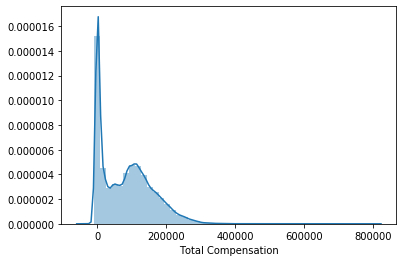

In [250]:
# Check the distribution of certain columns you might find of interest. 
# This can be done by calling the plot_distribution(). 
# Apply some good transformation if required. Call transform_column() to do the same.
x = np.sqrt(train['Total Compensation'])
#x = np.sqrt(x)
sns.distplot(train['Total Compensation'])

In [259]:
df1 = train.copy()

In [260]:
# Before we proceed with the model fitting, we need to get rid of the categorical columns.
# We can use One Hot Encoding or Label Encoding to convert the categorical columns to numeric.
#Call the encode_category() with the list of columns and the method of encoding to do the same.
df1 = pd.concat([pd.get_dummies(train['Department']), df1], axis = 1)
df1 = pd.concat([pd.get_dummies(train['Organization Group']), df1], axis = 1)
df1 = pd.concat([pd.get_dummies(train['Job Family']), df1], axis = 1)
df1 = pd.concat([pd.get_dummies(train['Union']), df1], axis = 1)
df1 = pd.concat([pd.get_dummies(train['Year']), df1], axis = 1)

df1.drop(['Year', 'Organization Group','Department','Union','Job Family'],axis = 1, inplace = True)

In [268]:
# Now since we have encoded all the categorical columns, there shouldn't be any left in the data.
# Check the same by calling num_and_cat_columns()


df1

2013  2014  2015  2016  2017  2018  2019  2020  \
0          0     0     0     0     0     1     0     0   
1          0     1     0     0     0     0     0     0   
2          0     0     0     0     0     1     0     0   
3          0     0     1     0     0     0     0     0   
4          0     1     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   
567098     0     0     0     0     0     1     0     0   
567099     0     1     0     0     0     0     0     0   
567100     0     0     0     0     0     1     0     0   
567101     0     0     0     0     1     0     0     0   
567102     0     0     0     0     0     0     1     0   

        Auto Machinist, Local 1414  Automotive Machinists, Local 1414  ...  \
0                                0                                  0  ...   
1                                0                                  0  ...   
2                                0                                  0  ...   
3                                0                                  0  ...   
4                                0                                  0  ...   
...                            ...                                ...  ...   
567098                           0                                  0  ...   
567099                           0                                  0  ...   
567100                           0                                  0  ...   
567101                           0                                  0  ...   
567102                           0                                  0  ...   

        SHF Sheriff  TTX Treasurer/Tax Collector  WAR War Memorial  \
0                 0                            0                 0   
1                 0                            0                 0   
2                 0                            0                 0   
3                 0                            0                 0   
4                 0                            0                 0   
...             ...                          ...               ...   
567098            0                            0                 0   
567099            0                            0                 0   
567100            0                            0                 0   
567101            0                            0                 0   
567102            0                            0                 0   

        WOM Status Of Women  WTR Water Enterprise  WWE Wastewater Enterprise  \
0                         0                     0                          0   
1                         0                     0                          0   
2                         0                     0                          0   
3                         0                     0                          0   
4                         0                     0                          0   
...                     ...                   ...                        ...   
567098                    0                     0                          0   
567099                    0                     0                          0   
567100                    0                     0                          0   
567101                    0                     0                          0   
567102                    0                     0                          0   

        Retirement  Health and Dental  Other Benefits  Total Compensation  
0             0.00           13527.66            0.00                0.00  
1             0.00            3995.56          875.27            16176.35  
2             0.00               0.00            0.00              248.30  
3         11671.59           10680.55         4400.24            80020.86  
4         14617.66           12464.61         5562.09           101207.38  
...            ...                ...             ...                 ...  
567098     9483.37            8487.84   

### Model building

- Separate the features and target.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. Call the `fit_model()` with respective parameters.



In [276]:
# Code Starts here

X = df1.drop('Total Compensation', axis = 1)
y = df1['Total Compensation']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size = 0.3)

linreg = LinearRegression()
linreg.fit(X_train,y_train)

pred = linreg.predict(X_test)

r2_score(y_test,pred)
# Code ends here

0.9621474704884139

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [284]:
# Code Starts here

test = pd.read_csv('test.csv')

#Drop Employee Identfier and Job Columns
test.drop('Employee Identifier', axis = 1, inplace = True)
test.drop('Job', axis = 1, inplace = True) 

# Covert Numerical Columns from Sting to Float
test['Retirement'] = test['Retirement'].apply(lambda x: float(x[1:]))
test['Health and Dental'] = test['Health and Dental'].apply(lambda x: float(x[1:]))
test['Other Benefits'] = test['Other Benefits'].apply(lambda x: float(x[1:]))

# Save Id column for submission file index.
Id = test['Id']

# Drop Id and Year Type Column
test.drop('Id', axis = 1, inplace = True)
test.drop('Year Type', axis=1, inplace = True)


In [287]:
#Fill Missing Values in Department Column

df_test = test[test.Department.isna()]
lst = []
#i = 182514.85
for i in df['Total Compensation']:
    start_value = 1000000000
    #print(i)
    for item in dept_dict:
        #print(item)
        error = abs(i - dept_dict[item])
        if error < start_value:
            start_value = error
            final_value = item
            #print(final_value)
            
    lst.append(final_value)

df_test['Department'] = lst

ValueError: Length of values does not match length of index

In [ ]:
index_list_test = test[test['Department'].isna()].Department.index.tolist()

for index in index_list_test:
    if str(test.loc[index,'Department']) == 'nan':
        test.loc[index,'Department'] = df.Department[index]
        

In [ ]:
train.dropna(inplace = True) #Union Column

df1_test = test.copy()

df1_test = pd.concat([pd.get_dummies(train['Department']), df1_test], axis = 1)
df1_test = pd.concat([pd.get_dummies(train['Organization Group']), df1_test], axis = 1)
df1_test = pd.concat([pd.get_dummies(train['Job Family']), df1_test], axis = 1)
df1_test = pd.concat([pd.get_dummies(train['Union']), df1_test], axis = 1)
df1_test = pd.concat([pd.get_dummies(train['Year']), df1_test], axis = 1)

df1.drop(['Year', 'Organization Group','Department','Union','Job Family'],axis = 1, inplace = True)
# Code ends here

In [ ]:
df1_test = pd.concat([pd.get_dummies(train['Year']), df1_test], axis = 1)



In [294]:
df1_test.head()

NameError: name 'df1_test' is not defined

In [288]:
test.isna().sum()

Year                      0
Organization Group        0
Department            92525
Union                    95
Job Family                0
Retirement                0
Health and Dental         0
Other Benefits            0
dtype: int64